# Imports

In [2]:
import pandas as pd
import numpy as np
import re
import pyodbc
import matplotlib.pyplot as plt
import sys
sys.path.append('C:\\Users\\christopher.johnson\\Documents\\')
import ctj_tools as ros
import datetime
from dateutil.relativedelta import relativedelta

In [3]:
# file locations
date = '03.11.2025'
fda_inspections_path = "Files\\Downloads\\FDAInspectionDetails."+date+".xlsx"
fda_citations_path = "Files\\Downloads\\InspectionCitations."+date+".xlsx"
fda_warningletters_path = "Files\\Downloads\\WarningLetters."+date+".xlsx"
fda_form483_path = "Files\\Downloads\\FDAForm483."+date+".xlsx"
fda_recalls_path = "Files\\Downloads\\Recalls.03.11.2025.xlsx"

In [8]:
def get_classification(x):
    
    m = re.search(r'\((.*?)\)',x)
    if m:
        return m.group(1)
    else:
        return None

In [9]:
# Inspections
fda_insp_details_df = pd.read_excel(fda_inspections_path)
# make column names not annoying
fda_insp_details_df = ros.fix_columns(fda_insp_details_df)
fda_insp_details_df.columns = ['FEINumber', 'LegalName', 'City', 'State', 'Zip', 'CountryArea',
       'FiscalYear', 'InspectionID', 'PostedCitations', 'InspectionEndDate',
       'Classification', 'ProjectArea', 'ProductType','AdditionalDetails',
       'FMD145Date']
cols_keep = ['FEINumber', 'LegalName', 'City', 'State', 'Zip', 'CountryArea',
       'FiscalYear', 'InspectionID', 'PostedCitations', 'InspectionEndDate',
       'Classification', 'ProjectArea', 'ProductType']
fda_insp_details_df = fda_insp_details_df[cols_keep]
fda_insp_details_df['Classification'] = fda_insp_details_df['Classification'].apply(lambda x: get_classification(x))

In [10]:
# Citations
fda_cit_df = ros.fix_columns(pd.read_excel(fda_citations_path))
fda_cit_df['Act/CFRNumber'] = fda_cit_df['Act/CFRNumber'].fillna(' ')
fda_cit_df.columns = ['InspectionID', 'FEINumber', 'LegalName', 'InspectionEndDate',
       'ProgramArea', 'ActCFRNumber', 'ShortDescription', 'LongDescription']

In [11]:
# Warning Letters
warning_letters_df = pd.read_excel(fda_warningletters_path)
warning_letters_df.columns = ['FEINumber', 'LegalName', 'State', 'CountryArea', 'ProductType',
       'ActionTakenDate', 'ActionType', 'CaseInjunctionID']

In [12]:
# 483s
form_df = ros.fix_columns(pd.read_excel(fda_form483_path))

In [13]:
form_df['FEINumber']

0       3014250111
1       3008565058
2       3015156709
3       3015826782
4       3012039582
           ...    
1819    3004819820
1820    3004956904
1821    3005124189
1822    3005906909
1823    3006370524
Name: FEINumber, Length: 1824, dtype: object

In [14]:
form_df = form_df[~form_df['FEINumber'].isnull()]
form_df = form_df[form_df.FEINumber!= 'Unico Holdings, Inc.']
form_df['FEINumber'] = form_df['FEINumber'].astype('int64')

In [15]:
form_df['RecordDate']  = pd.to_datetime(form_df['RecordDate'])

In [58]:
tmp = form_df.merge(fda_insp_details_df[['FEINumber','InspectionEndDate','Classification','FiscalYear']].drop_duplicates(),how='left',left_on = ['FEINumber','RecordDate'],right_on=['FEINumber','InspectionEndDate'])

In [59]:
len(tmp[~tmp['Classification'].isnull()])

481

<Axes: xlabel='Classification'>

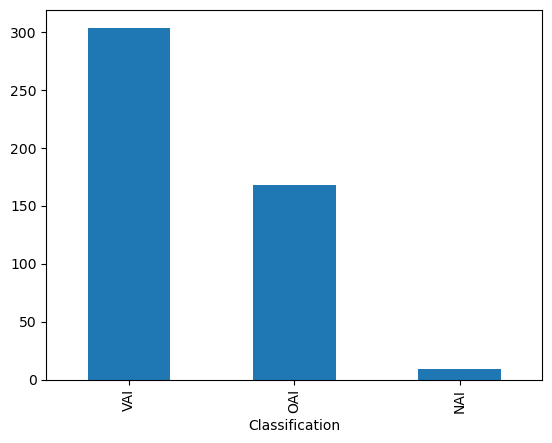

In [57]:
tmp[~tmp['Classification'].isnull()]['Classification'].value_counts().plot(kind='bar')

<Axes: xlabel='FiscalYear'>

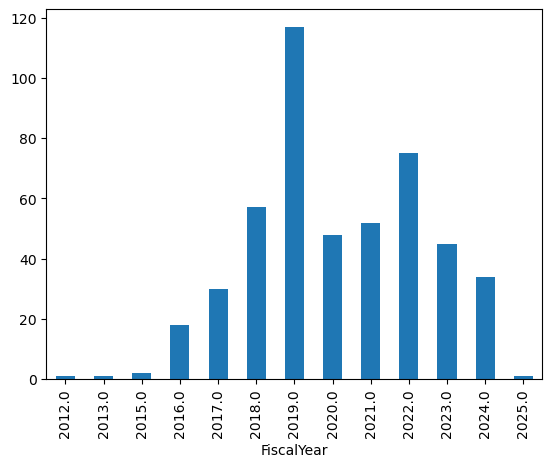

In [60]:
tmp[~tmp['Classification'].isnull()]['FiscalYear'].value_counts().sort_index().plot(kind='bar')

In [55]:
tmp[tmp['Classification'].isnull()].head(50)

RecordDate   FEINumber                                          LegalName  \
0  2024-12-20  3013736415                            SCA Pharmaceuticals LLC   
1  2024-10-28  3012053582                                  QuVa Pharma, Inc.   
6  2024-06-26  3010453141                         Mylan Laboratories Limited   
8  2024-09-27  3011967886                                RC Outsourcing, LLC   
9  2024-10-10  3022483154                               TAILSTORM HEALTH INC   
13 2023-03-14  3011684330      Regeneron Ireland Designated Activity Company   
14 2024-10-25  3014549846                                          OSRX Inc.   
17 2024-07-02  3010680515                      US Specialty Formulations LLC   
18 2024-03-01  3014483112               IntegraDose Compounding Services LLC   
19 2024-10-04  3010810839           Avenue Pharmacy Inc dba Pathway Pharmacy   
20 2024-09-18  3017473850                         Staska Pharmaceuticals Inc   
22 2024-09-25  3011158388             Nephron Sterile Compounding Center LLC   
23 2024-09-06  3024611767                               Mark Cuban Cost Plus   
24 2023-02-28  3001623073        Jubilant HollisterStier General Partnership   
25 2024-03-25  3002807751                                   Novo Nordisk A/S   
26 2024-08-28  3011887629                                   Empower Pharmacy   
28 2023-11-21  3023765884           Nanchang Anobri Pharmaceutical Co., Ltd.   
30 2024-09-27  3011248248                                     Biocon Sdn Bhd   
31 2024-03-19  3011286349                                       Qualgen, LLC   
32 2024-07-03  3011976853                                            BSO LLC   
33 2024-09-06  3020928491                                Annovex Pharma, Inc   
34 2024-06-28  3012104093                        Fagron Compounding Services   
35 2024-08-02  3022250654                                          ProRx LLC   
38 2019-11-24  3004664162              Takeda Pharmaceutical Company Limited   
41 2023-03-10  3012163998                                         Hugel Inc.   
43 2024-08-02  3008790859                                      Mixlab TX LLC   
44 2024-08-16  1000526113                       Belcher Pharmaceuticals, LLC   
45 2024-09-06  3004097901                             Granules India Limited   
46 2024-08-02  3009864167  Gland Pharma Limited, Units I+II Pashamylaram ...   
47 2022-06-27  3010705046              Laboratorios Farmaceuticos Rovi S. A.   
48 2024-09-08     1972829                            Park Avenue Compounding   
50 2024-07-26  3003981475                           Biocon Biologics Limited   
52 2024-08-02  3004094136                        Global Calcium Pvt. Limited   
53 2024-07-31  3021769057                         iRhythm Technologies, Inc.   
54 2024-07-31  3007208829                           iRhythm Technologies Inc   
55 2024-07-26  3010166491                                     Nubratori, Inc   
57 2024-05-29  3009724085                            Olympia Pharmaceuticals   
58 2024-04-03  3013024146                                 Imprimis NJOF, LLC   
60 2024-06-21  3010589333                        Right Value Drug Stores LLC   
61 2024-02-13  3012124170                    Ranier's Compounding Laboratory   
62 2024-06-25  3022897129                          Hikma Injectables USA Inc   
64 2024-06-14  3022125340                           Biocon Biosphere Limited   
66 2021-08-24  3010479596                        Samsung Biologics Co., Ltd.   
67 2022-06-09  3010479596                        Samsung Biologics Co., Ltd.   
68 2024-04-05  3013438582           Denver Solutions, LLC DBA Leiters Health   
69 2017-07-25  3010479596                        Samsung Biologics Co., Ltd.   
70 2024-06-12     2220525                     Hikma Pharmaceuticals USA Inc.   
71 2024-05-10  3011430551         Brookfield Medical/Surgical Supplies, Inc.   
79 2024-04-12  3004034796                                 Delta Pharma, Inc.   
82 

In [12]:
# Recalls
recalls_df = pd.read_excel(fda_recalls_path)

In [13]:
recalls_df.columns = ['FEINumber','FirmName','ProductType','ProductClassification','Status','DistributionPattern','FirmCity','FirmState','FirmCountry','CenterClassificationDate','Reason','Product','EventID','EventClassification','ProductID','Center','RecallDetails']

In [14]:
recalls_df = recalls_df[recalls_df.ProductType == 'Drugs']
recalls_df = recalls_df[recalls_df.FEINumber !='-']

In [15]:
recalls_df['FEINumber'] = recalls_df['FEINumber'].astype('int64')

# Data

In [1649]:
fda_insp_details_df['ProjectArea'].value_counts()

ProjectArea
Foodborne Biological Hazards                              122210
Compliance: Devices                                        25693
Monitoring of Marketed Animal Drugs, Feed, and Devices     24077
Drug Quality Assurance                                     23985
Food Composition, Standards, Labeling and Econ             21821
Bioresearch Monitoring                                     18523
Blood and Blood Products                                   17553
Postmarket Assurance: Devices                              14752
Technical Assistance: Food and Cosmetics                   13250
Human Cellular, Tissue, and Gene Therapies                  8418
Pesticides and Chemical Contaminants                        6256
Food and Color Additives Petition Review                    4885
Vaccines and Allergenic Products                            2329
Colors and Cosmetics Technology                             1482
Radiation Control and Health Safety Act                     1311
Tobacco Post-

In [1646]:
fda_cit_df['ProgramArea'].value_counts()

ProgramArea
Foods                               143209
Devices                              47871
Drugs                                37880
Veterinary Medicine                   9706
Bioresearch Monitoring                7087
Biologics                             4474
Human Tissue for Transplantation      4351
Parts 1240 and 1250                   2624
Radiologic Health                      550
Part 11 Compliance                     224
Name: count, dtype: int64

In [16]:
fda_cit_drugs_df = fda_cit_df[fda_cit_df.ProgramArea=='Drugs']

In [17]:
data_df = fda_cit_drugs_df.merge(fda_insp_details_df[['InspectionID','Classification']].drop_duplicates(),how='left',on='InspectionID')

<Axes: title={'center': 'Classifications (w citations)'}, xlabel='Classification'>

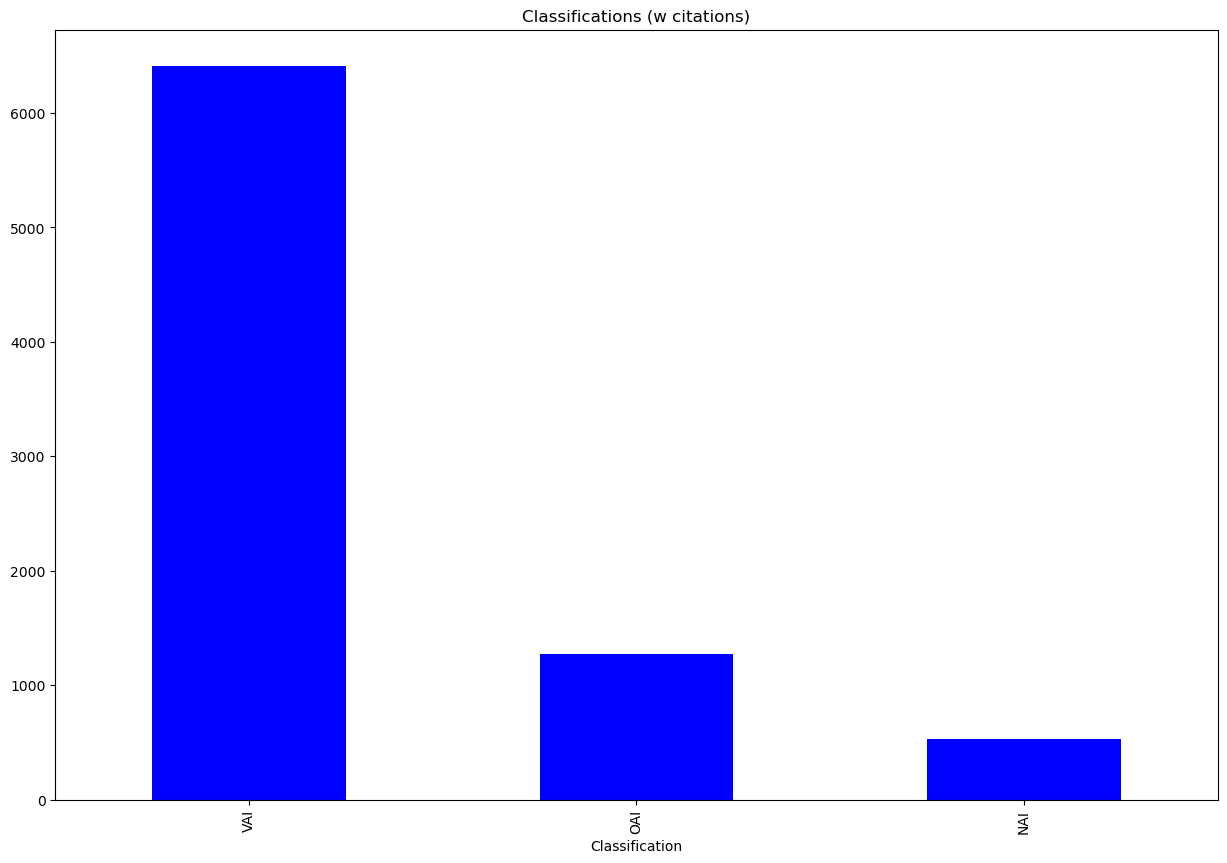

In [1656]:
data_df[['InspectionID','Classification']].drop_duplicates()['Classification'].value_counts().plot(kind='bar',title='Classifications (w citations)',color='blue',figsize=(15,10))

<Axes: xlabel='ActCFRNumber'>

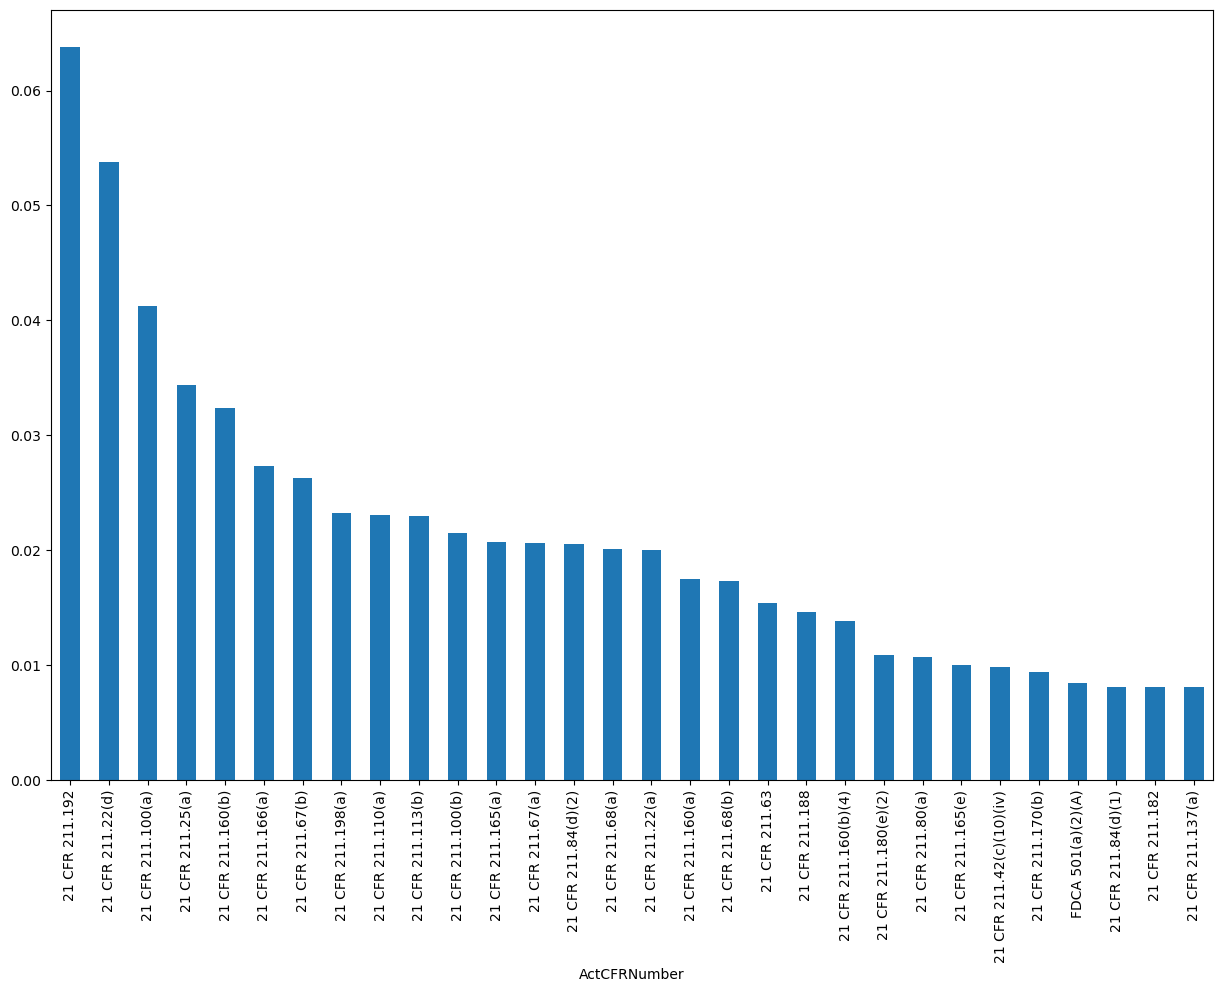

In [20]:
data_df['ActCFRNumber'].value_counts(normalize=True).head(30).plot(kind='bar',figsize=(15,10))

## Num of Citations

In [18]:
data_df['Year'] = data_df['InspectionEndDate'].apply(lambda x: x.year)

In [387]:
counts_df = data_df.groupby(['InspectionID','Classification'])['ActCFRNumber'].nunique().reset_index()

In [514]:
counts_df.groupby('Classification')['ActCFRNumber'].median()

Classification
NAI    3.0
OAI    7.0
VAI    3.0
Name: ActCFRNumber, dtype: float64

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_29608\1480013701.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals],fontsize=15)


Text(0, 0.5, 'Proportion of Classifications')

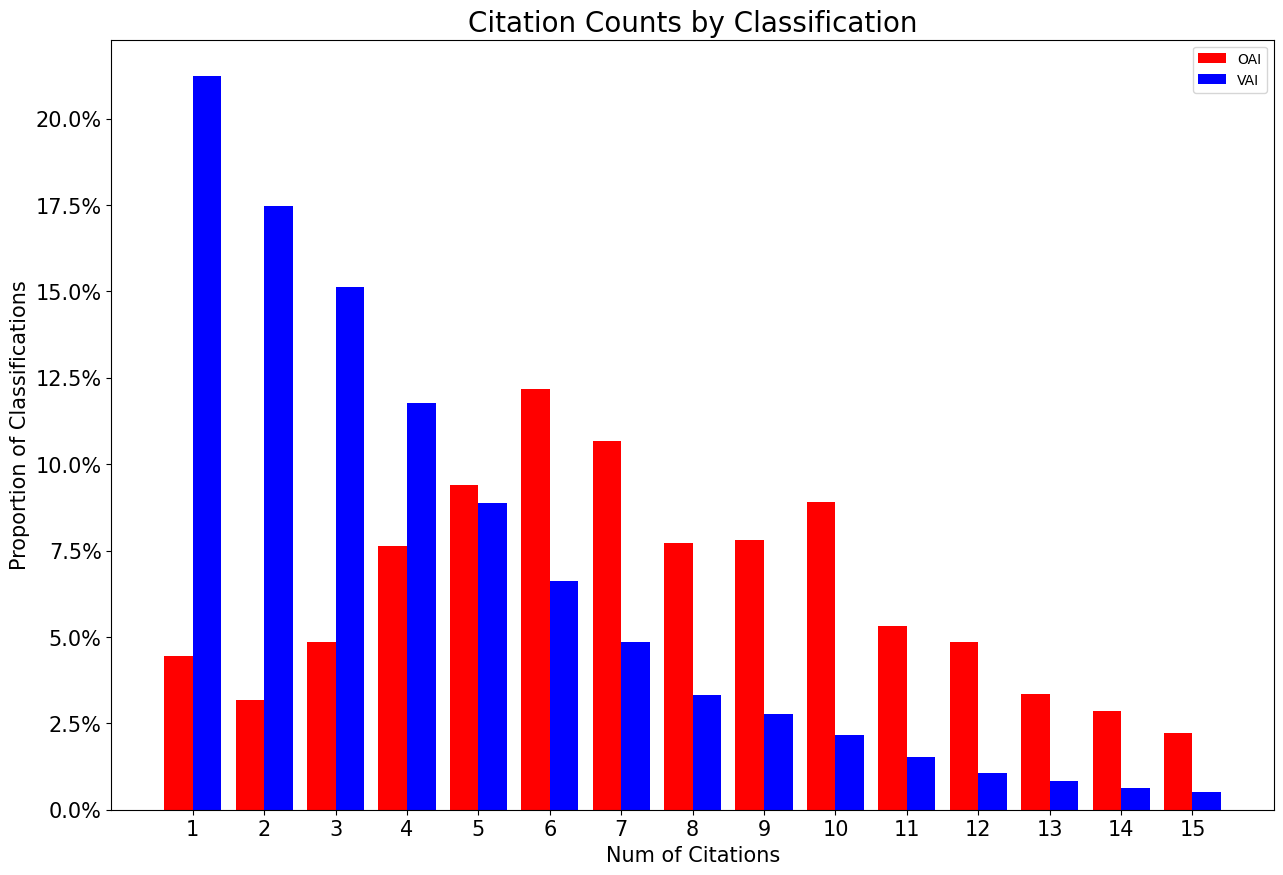

In [38]:
x = np.arange(1,16)
width = 0.2
first = counts_df[counts_df.Classification == 'OAI']['ActCFRNumber'].value_counts(normalize=True).sort_index().head(15)
sec = counts_df[counts_df.Classification == 'VAI']['ActCFRNumber'].value_counts(normalize=True).sort_index().head(15)

fig, ax = plt.subplots(1,figsize=(15,10))
ax.bar(x - width, first.values,width*2 ,label = 'OAI',color = 'red')
ax.bar(x + width, sec.values,width*2 ,label = 'VAI',color = 'blue')

ax.legend(loc = 'upper right')
ax.set_xticks(x)
ax.set_xticklabels(x,fontsize=15)
ax.set_title('Citation Counts by Classification',fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals],fontsize=15)
ax.set_xlabel('Num of Citations',fontsize=15)
ax.set_ylabel('Proportion of Classifications',fontsize=15)


In [65]:
print(counts_df[counts_df.Classification == 'OAI']['ActCFRNumber'].value_counts().sort_index().head(15))

ActCFRNumber
1      56
2      41
3      61
4      98
5     119
6     156
7     136
8      98
9     100
10    112
11     68
12     61
13     42
14     36
15     28
Name: count, dtype: int64


In [64]:
counts_df[counts_df.Classification == 'VAI']['ActCFRNumber'].value_counts().sort_index().head(15)

ActCFRNumber
1     1358
2     1122
3      969
4      757
5      568
6      424
7      313
8      212
9      177
10     137
11      97
12      67
13      53
14      40
15      32
Name: count, dtype: int64

In [67]:
act_df.to_excel('Citations.xlsx')

In [87]:
act_df.sort_values(by='OAI_weighted',ascending=False)['Total'].iloc[:220].sum()/act_df['Total'].sum()

0.7651653449049828

In [88]:
act_df.sort_values(by='OAI_weighted',ascending=False).iloc[220]

Classification
OAI              208.000000
VAI              815.000000
Total           1023.000000
OAI_weighted       0.203324
Name: 21 CFR 211.25(a), dtype: float64

## Significance of Citation

<Axes: xlabel='ActCFRNumber'>

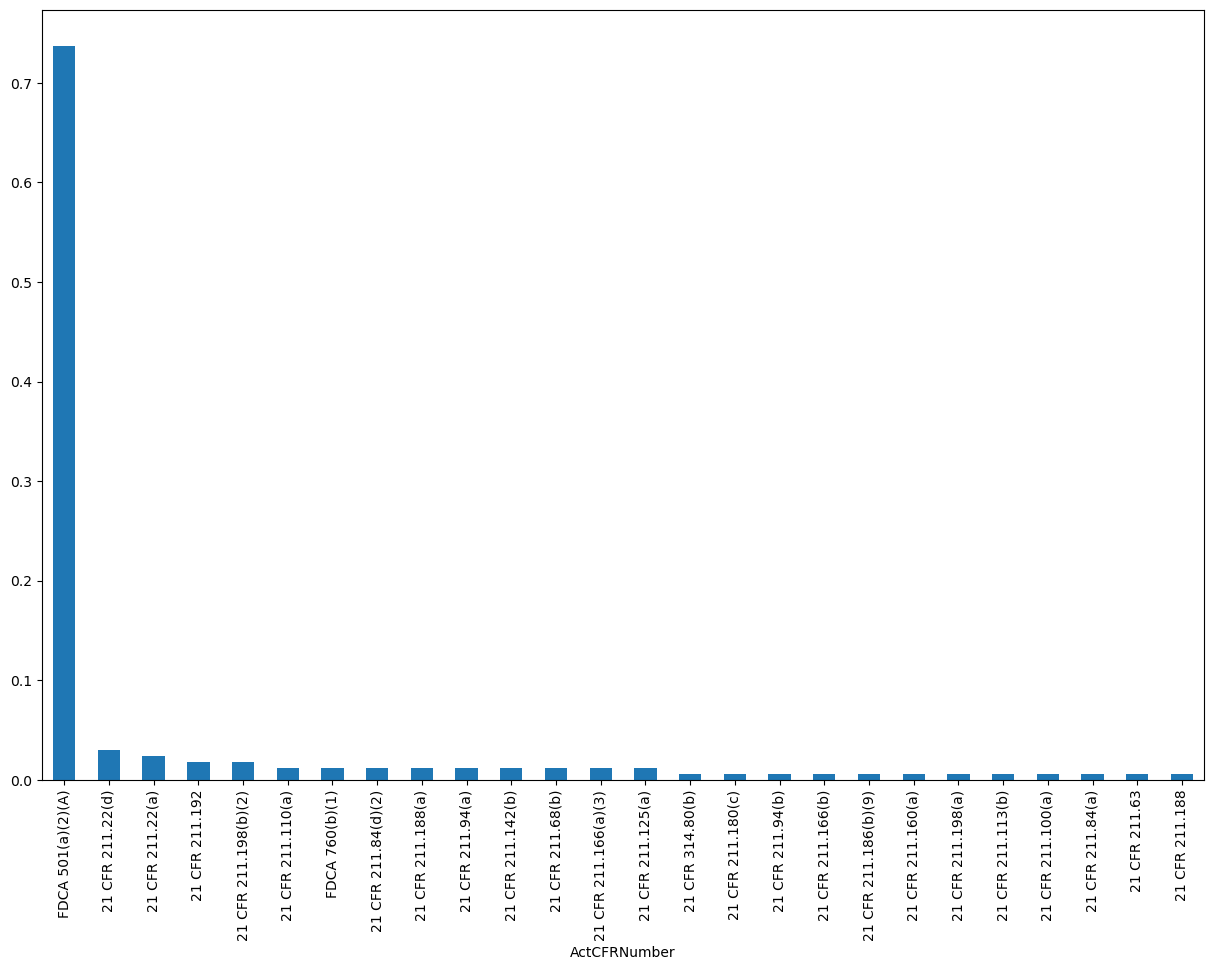

In [40]:
data_df [ data_df['InspectionID'].isin(list(counts_df[(counts_df.Classification== 'OAI') & (counts_df.ActCFRNumber == 1)]['InspectionID'].unique()))]['ActCFRNumber'].value_counts(normalize=True).plot(kind='bar',figsize=(15,10))

In [43]:
cit = 'FDCA 501(a)(2)(A)'
data_df[data_df.ActCFRNumber == cit]['ShortDescription'].unique()

array(['Aseptic processing outside ISO 5 area',
       'Inadequate smoke studies',
       'Lack of/inadequate, environmental monitoring',
       'Media fills, failure',
       'Non-sterile disinfecting agents, ISO 5 area/classified areas',
       'Personnel, blocked or disrupted first air',
       'Facility design, influx of lesser quality air',
       'Failure to clean and disinfect/sterilize equipment, ISO 5 area',
       'Personnel exposure during aseptic manipulations',
       'Hazardous drugs, prevention of cross-contamination',
       'Air flow quality, higher classified area',
       'Sinks, drains in cleanroom of ISO 5 area',
       'Non-microbial contamination, production area',
       'Use of non-pharmaceutical grade components',
       'Actionable microbial contamination, adjacent area',
       'Beta-lactam drugs, inadequate sanitation',
       'Cleanliness, ISO-classified areas',
       'Disinfecting and cleaning agents, ISO 5 area',
       'Disinfecting materials, aseptic 

<Axes: xlabel='Classification'>

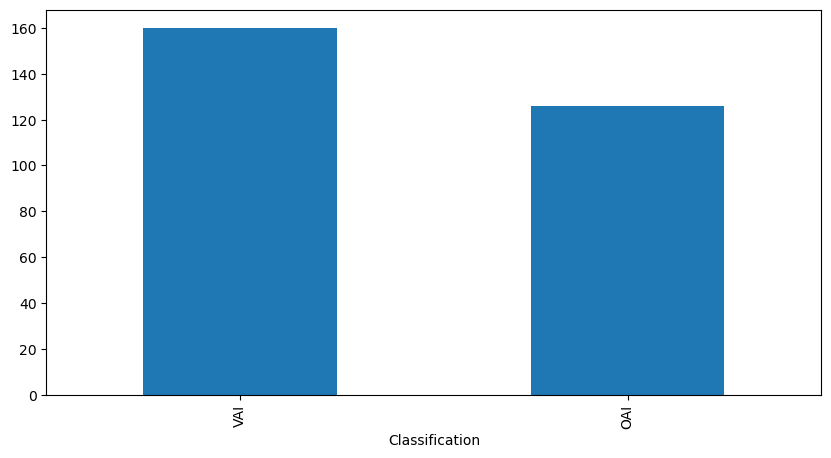

In [50]:
data_df [ (data_df.ActCFRNumber == cit ) & (data_df['InspectionID'].isin(list(counts_df[ (counts_df.ActCFRNumber == 1)]['InspectionID'].unique())) )]['Classification'].value_counts(normalize=False).plot(kind='bar',figsize=(10,5))

<Axes: xlabel='Classification'>

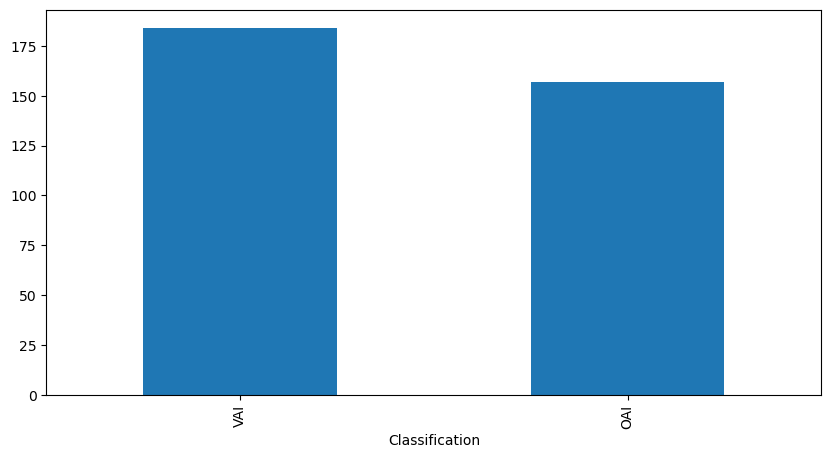

In [47]:
data_df[data_df.ActCFRNumber == cit]['Classification'].value_counts().plot(kind='bar',figsize=(10,5))

In [19]:
act_df = data_df[['InspectionID','ActCFRNumber','Classification']]
act_df['Values'] = len(act_df)*[1]
act_df = act_df.pivot_table(index='Classification',columns='ActCFRNumber',values='Values',aggfunc='sum').fillna(0).T
act_df['Total'] = act_df.T.sum().values
act_df['OAI_weighted'] = act_df['OAI'] / act_df['Total']

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_21572\2102923705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_df['Values'] = len(act_df)*[1]


In [28]:
act_df[act_df.Total>10].sort_values(by='OAI_weighted',ascending=False).head(30)

Classification              NAI    OAI    VAI  Total  OAI_weighted
ActCFRNumber                                                      
21 CFR 211.167(a)           2.0  121.0   35.0  158.0      0.765823
FDCA 503B(a)(10)            0.0   30.0   14.0   44.0      0.681818
21 CFR 211.42(d)            0.0   11.0    6.0   17.0      0.647059
21 CFR 211.42(c)(10)(v)    14.0  185.0   87.0  286.0      0.646853
21 CFR 211.42(c)(10)(vi)    0.0   48.0   27.0   75.0      0.640000
21 CFR 211.42(c)(10)(ii)    0.0    7.0    4.0   11.0      0.636364
21 CFR 211.94(c)            1.0   28.0   15.0   44.0      0.636364
21 CFR 211.42(c)(10)(iii)   1.0   55.0   31.0   87.0      0.632184
21 CFR 211.42(c)(10)        3.0   44.0   23.0   70.0      0.628571
21 CFR 211.42(c)(10)(iv)   14.0  238.0  146.0  398.0      0.597990
21 CFR 211.28(a)            7.0  159.0  107.0  273.0      0.582418
21 CFR 211.94(b)            2.0   20.0   13.0   35.0      0.571429
21 CFR 211.42(c)(10)(i)     0.0   12.0   13.0   25.0      0.480000
21 CFR 211.113(b)          43.0  445.0  446.0  934.0      0.476445
FDCA 501(a)(2)(A)           0.0  157.0  184.0  341.0      0.460411
21 CFR 211.42(c)(5)         0.0   14.0   17.0   31.0      0.451613
21 CFR 211.56(c)            2.0   18.0   25.0   45.0      0.400000
21 CFR 211.110(b)           2.0   29.0   42.0   73.0      0.397260
21 CFR 211.42(b)            4.0   36.0   52.0   92.0      0.391304
21 CFR 211.101(a)           1.0    7.0   10.0   18.0      0.388889
21 CFR 211.165(b)          22.0  100.0  142.0  264.0      0.378788
21 CFR 211.194(a)(1)        2.0   14.0   21.0   37.0      0.378378
21 CFR 211.165(a)          45.0  315.0  478.0  838.0      0.375895
21 CFR 211.134(b)           0.0    6.0   10.0   16.0      0.375000
FDCA 503B(b)(2)(A)          0.0    4.0    7.0   11.0      0.363636
21 CFR 211.170(b)(1)        3.0   19.0   31.0   53.0      0.358491
21 CFR 211.25(c)            4.0   28.0   47.0   79.0      0.354430
21 CFR 211.84(d)(6)         7.0   23.0   35.0   65.0      0.353846
21 CFR 211.137(d)           0.0    6.0   11.0   17.0      0.352941
21 CFR 211.176              2.0    6.0    9.0   17.0      0.352941

In [1674]:
len(data_df[data_df.Classification == 'OAI']['InspectionID'].unique())/len(data_df[data_df.Classification != 'OAI']['InspectionID'].unique())

0.19517442753957276

In [1675]:
len(act_df[act_df.OAI_weighted >= 0.2])

179

In [1662]:
sd_counts_df = data_df.groupby('ActCFRNumber')['ShortDescription'].nunique().reset_index().sort_values(by='ShortDescription',ascending=False)

<Axes: xlabel='ActCFRNumber'>

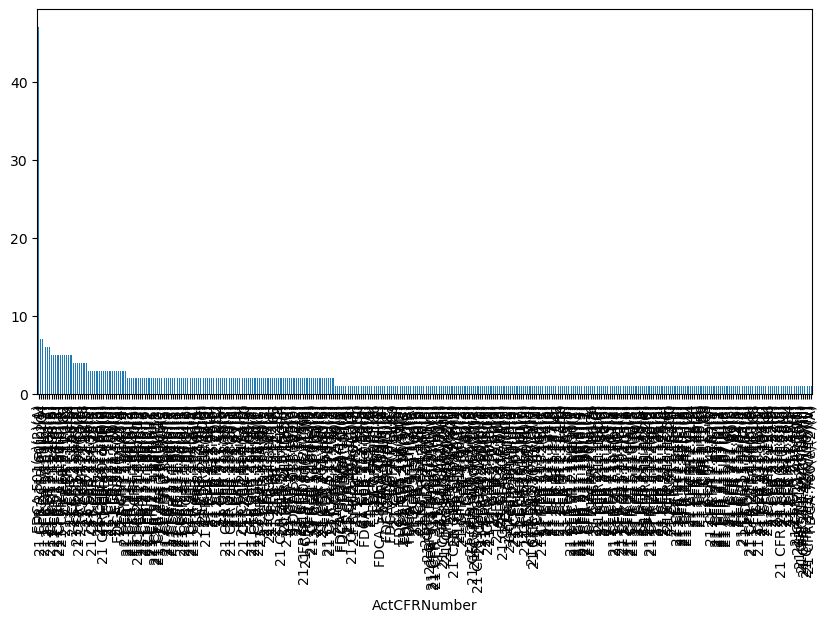

In [1663]:
sd_counts_df.set_index('ActCFRNumber')['ShortDescription'].plot(kind='bar',figsize=(10,5))

In [1664]:
sd_counts_df.head(10)

ActCFRNumber  ShortDescription
338     FDCA 501(a)(2)(A)                47
62   21 CFR 211.160(b)(1)                 7
149        21 CFR 211.204                 7
63   21 CFR 211.160(b)(2)                 6
324    21 CFR 361.1(c)(2)                 6
144     21 CFR 211.198(a)                 6
132  21 CFR 211.194(a)(2)                 5
145     21 CFR 211.198(b)                 5
225   21 CFR 211.84(d)(2)                 5
64   21 CFR 211.160(b)(3)                 5

In [1669]:
act = '21 CFR 211.160(b)(2)'
for desc in data_df[data_df.ActCFRNumber == act]['ShortDescription'].unique():
    tmp = data_df[(data_df.ActCFRNumber == act) & (data_df.ShortDescription == desc)][['InspectionID','Classification']].drop_duplicates()
    cnt = len(tmp)
    oai_cnt = len(tmp[tmp.Classification == 'OAI'])
    print(desc, oai_cnt, cnt, oai_cnt/cnt)

In-process samples representative, identified properly 8 24 0.3333333333333333
In-process sample representation/identification 3 10 0.3
Acceptance of in-process materials 4 8 0.5
Sampling/testing of in-process materials 1 3 0.3333333333333333
In process materials - conformance to written specs 1 10 0.1
In-process materials - sampling, testing procedures 0 5 0.0


In [1672]:
data_df[data_df.Classification == 'OAI']['ActCFRNumber'].value_counts(normalize=True)

ActCFRNumber
21 CFR 211.192                0.061403
21 CFR 211.22(d)              0.043940
21 CFR 211.100(a)             0.042802
21 CFR 211.113(b)             0.042232
21 CFR 211.166(a)             0.036823
                                ...   
21 CFR 314.80(c)(2)(ii)(A)    0.000095
FDCA 582(b)(4)                0.000095
21 CFR 211.42(c)(6)           0.000095
21 CFR 211.122(g)             0.000095
21 CFR 211.84(c)(3)           0.000095
Name: proportion, Length: 262, dtype: float64

In [1673]:
data_df[data_df.Classification == 'VAI']['ActCFRNumber'].value_counts(normalize=True)

ActCFRNumber
21 CFR 211.192             0.064669
21 CFR 211.22(d)           0.058530
21 CFR 211.100(a)          0.040188
21 CFR 211.25(a)           0.037516
21 CFR 211.160(b)          0.033002
                             ...   
21 CFR 211.132(b)(1)       0.000036
21 CFR 212.50(b)(3)        0.000036
21 CFR 212.70(f)(1)(iv)    0.000036
21 CFR 211.122(g)(2)       0.000036
21 CFR 211.170(a)(1)       0.000036
Name: proportion, Length: 348, dtype: float64

In [20]:
data_df['LongDescription_fix'] = data_df['LongDescription'].apply(lambda x: x.replace("  ","").replace(",","").replace(" .",""))

In [21]:
ld_counts_df = data_df.groupby('ActCFRNumber')['LongDescription'].nunique().reset_index().sort_values(by='LongDescription',ascending=False)

In [23]:
ld_counts_df[ld_counts_df.LongDescription !=1]

ActCFRNumber  LongDescription
210      21 CFR 211.80(a)              212
61      21 CFR 211.160(b)              199
60      21 CFR 211.160(a)              162
155      21 CFR 211.25(a)              109
338     FDCA 501(a)(2)(A)              101
..                    ...              ...
283      21 CFR 212.71(a)                2
92      21 CFR 211.180(d)                2
16   21 CFR 211.110(a)(5)                2
220   21 CFR 211.84(c)(3)                2
175   21 CFR 211.42(c)(3)                2

[246 rows x 2 columns]

In [26]:
act_df

Classification          NAI    OAI     VAI   Total  OAI_weighted
ActCFRNumber                                                    
21 CFR 211.100(a)     118.0  408.0  1065.0  1591.0      0.256442
21 CFR 211.100(b)      49.0  136.0   677.0   862.0      0.157773
21 CFR 211.101(a)       1.0    7.0    10.0    18.0      0.388889
21 CFR 211.101(b)       0.0    8.0    24.0    32.0      0.250000
21 CFR 211.101(b)(1)    1.0    0.0     2.0     3.0      0.000000
...                     ...    ...     ...     ...           ...
FDCA 505-1(f)(4)        0.0    0.0     6.0     6.0      0.000000
FDCA 760(b)(1)          0.0    6.0    11.0    17.0      0.352941
FDCA 760(c)(1)          2.0    0.0     6.0     8.0      0.000000
FDCA 760(c)(2)          0.0    0.0     1.0     1.0      0.000000
FDCA 760(e)(2)(A)       0.0    0.0     1.0     1.0      0.000000

[351 rows x 5 columns]

In [22]:
cnt = 0
new_cit_list, desc_map_list = [],[]
for i in range(len(ld_counts_df)):
    act = ld_counts_df['ActCFRNumber'].iloc[i]
    perc = act_df.loc[act]['OAI_weighted']
    total = act_df.loc[act]['Total']

    if total>=10:

        tmp = data_df[(data_df.ActCFRNumber == act) & (data_df.Year < 2024)][['InspectionID','LongDescription_fix','Classification']].drop_duplicates()
        longdesc_list = tmp["LongDescription_fix"].unique()
        split_cnt = 0
        for desc in longdesc_list:
            tmp_desc = data_df[data_df.LongDescription == desc]

            if len(tmp_desc) >=10:

                oai_cnt = len(tmp_desc[tmp_desc.Classification == 'OAI'])
                oai_perc = oai_cnt/ len(tmp_desc)
                delta = abs(oai_perc - perc) 
                
                if delta >= 0.10:
                    
                    print(oai_perc,perc,desc)
                    new_cit = act+"("+str(split_cnt)+")"
                    new_cit_list.append(new_cit)
                    desc_map_list.append(desc)
                    split_cnt+=1
                    cnt+=1

desc_map_df = pd.DataFrame(data = zip(new_cit_list,desc_map_list),columns=['NewCitation','LongDescription_fix'])

0.1 0.20554272517321015 Written procedures are not followed for the approval of components.
0.0 0.2073342736248237 Deviations from written test procedures are not recorded and justified.
0.05 0.2073342736248237 Established test procedures and laboratory control mechanisms are not followed and documented at the time of performance.
0.46153846153846156 0.2073342736248237 Deviations from written specifications are not justified.
0.3333333333333333 0.2073342736248237 Deviations from written test procedures and laboratory mechanisms are not recorded and justified.
0.4 0.2073342736248237 Deviations from written test procedures are not justified.
0.3448275862068966 0.19799139167862267 Employees engaged in the manufacture and processing of a drug product lack the training required to perform their assigned functions.
0.07462686567164178 0.19799139167862267 GMP training is not conducted with sufficient frequency to assure that employees remain familiar with CGMP requirements applicable to them.

In [30]:
desc_map_df

NewCitation  \
0        21 CFR 211.80(a)(0)   
1       21 CFR 211.160(a)(0)   
2       21 CFR 211.160(a)(1)   
3       21 CFR 211.160(a)(2)   
4       21 CFR 211.160(a)(3)   
..                       ...   
102      21 CFR 211.42(c)(1)   
103  21 CFR 211.166(c)(1)(0)   
104     21 CFR 211.142(a)(0)   
105     21 CFR 211.137(d)(0)   
106     21 CFR 211.101(a)(0)   

                                   LongDescription_fix  
0    Written procedures are not followed for the ap...  
1    Deviations from written test procedures are no...  
2    Established test procedures and laboratory con...  
3    Deviations from written specifications are not...  
4    Deviations from written test procedures and la...  
..                                                 ...  
102  The control systems necessary to prevent conta...  
103  There is no written assessment of stability of...  
104  Written procedures for the warehousing of drug...  
105  Drug product expiration dates do not appear on...  
106  Written production and control procedures incl...  

[107 rows x 2 columns]

In [23]:
data_df = data_df.merge(desc_map_df,
                how = 'left',
                on = 'LongDescription_fix')

In [24]:
data_df['NewCitation'] = data_df['NewCitation'].fillna(data_df['ActCFRNumber'])

In [25]:
act_df = data_df[data_df.Year < 2024][['InspectionID','NewCitation','Classification']]
act_df['Values'] = len(act_df)*[1]
act_df = act_df.pivot_table(index='Classification',columns='NewCitation',values='Values',aggfunc='sum').fillna(0).T
act_df['Total'] = act_df.T.sum().values
act_df['OAI_weighted'] = act_df['OAI'] / act_df['Total']

In [397]:
act_df[act_df.Total>10].sort_values(by='OAI_weighted',ascending=False).head(30)

Classification               NAI    OAI    VAI  Total  OAI_weighted
NewCitation                                                        
21 CFR 211.42(c)(10)(v)(1)   0.0   14.0    2.0   16.0      0.875000
21 CFR 211.94(c)(0)          0.0   10.0    2.0   12.0      0.833333
21 CFR 211.28(a)(1)          0.0   28.0    6.0   34.0      0.823529
21 CFR 211.28(a)(2)          0.0   12.0    3.0   15.0      0.800000
21 CFR 211.42(c)(10)(v)(0)   1.0   61.0   17.0   79.0      0.772152
21 CFR 211.167(a)            2.0  121.0   35.0  158.0      0.765823
21 CFR 211.113(b)(2)         3.0   51.0   13.0   67.0      0.761194
FDCA 503B(a)(10)             0.0   30.0   14.0   44.0      0.681818
21 CFR 211.42(c)(10)(vi)     0.0   48.0   26.0   74.0      0.648649
21 CFR 211.28(a)             1.0   59.0   31.0   91.0      0.648352
21 CFR 211.42(d)             0.0   11.0    6.0   17.0      0.647059
21 CFR 211.42(c)(10)(iii)    1.0   55.0   29.0   85.0      0.647059
21 CFR 211.42(c)(10)(ii)     0.0    7.0    4.0   11.0      0.636364
21 CFR 211.42(c)(10)         3.0   42.0   22.0   67.0      0.626866
21 CFR 211.42(c)(10)(iv)    14.0  231.0  137.0  382.0      0.604712
21 CFR 211.94(b)             2.0   20.0   13.0   35.0      0.571429
21 CFR 211.42(c)(10)(v)     13.0  104.0   65.0  182.0      0.571429
21 CFR 211.94(c)             1.0   18.0   13.0   32.0      0.562500
21 CFR 211.110(b)(0)         0.0    8.0    7.0   15.0      0.533333
21 CFR 211.42(c)(10)(i)      0.0   12.0   11.0   23.0      0.521739
21 CFR 211.113(b)           33.0  302.0  255.0  590.0      0.511864
FDCA 501(a)(2)(A)            0.0  150.0  147.0  297.0      0.505051
21 CFR 211.166(a)(3)(0)      1.0    8.0    7.0   16.0      0.500000
21 CFR 211.192(7)            2.0   13.0   12.0   27.0      0.481481
21 CFR 211.160(a)(2)         0.0    6.0    7.0   13.0      0.461538
21 CFR 211.28(a)(3)          1.0    6.0    6.0   13.0      0.461538
21 CFR 211.137(d)(0)         0.0    5.0    6.0   11.0      0.454545
21 CFR 211.46(c)(1)          0.0    9.0   11.0   20.0      0.450000
21 CFR 211.192(0)            1.0   22.0   27.0   50.0      0.440000
21 CFR 211.28(a)(0)          5.0   51.0   60.0  116.0      0.439655

## Proportion of OAIs by Year

<Axes: title={'center': 'Number of Inspections with Citations'}, xlabel='Year'>

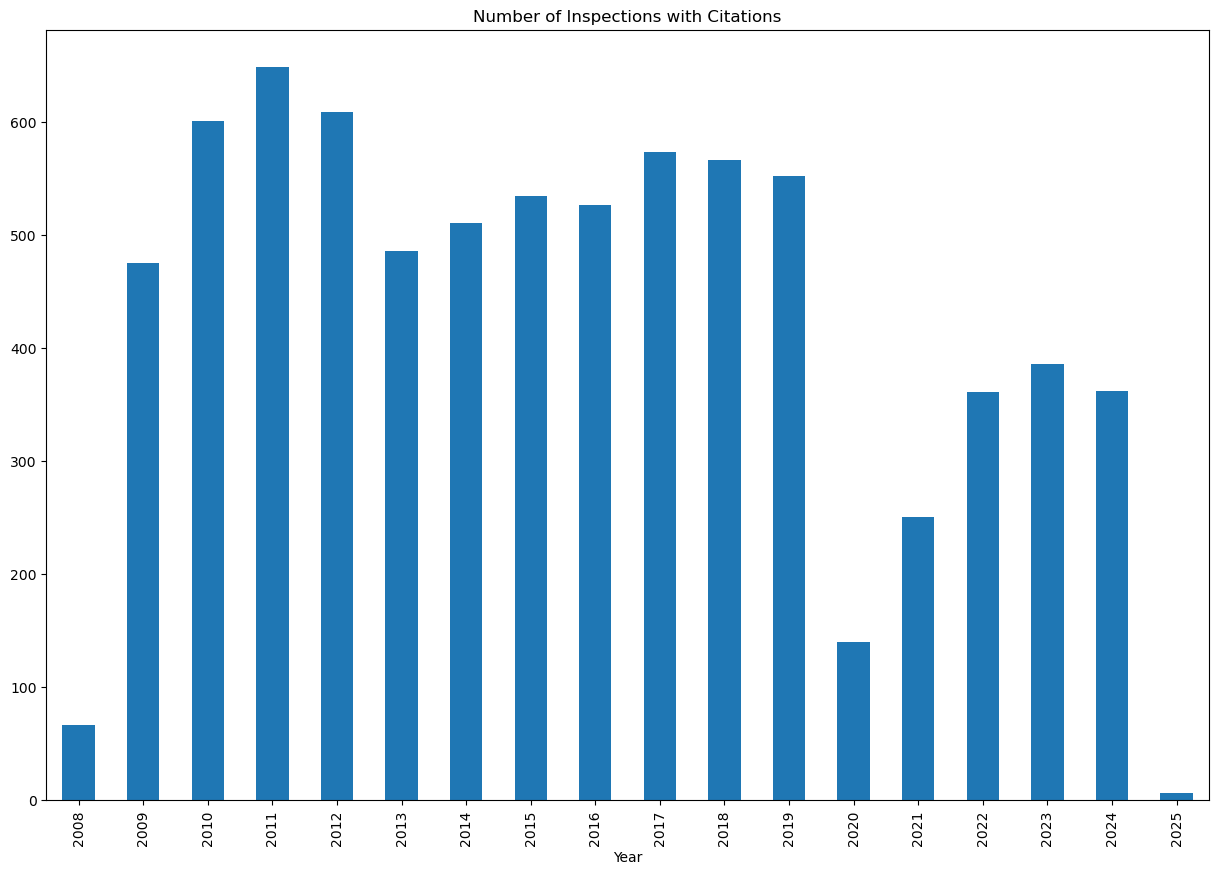

In [35]:
data_df[['InspectionID','Year']].drop_duplicates()['Year'].value_counts(normalize=False).sort_index().plot(kind='bar',figsize=(15,10),title='Number of Inspections with Citations')

<Axes: title={'center': 'OAIs'}, xlabel='Year'>

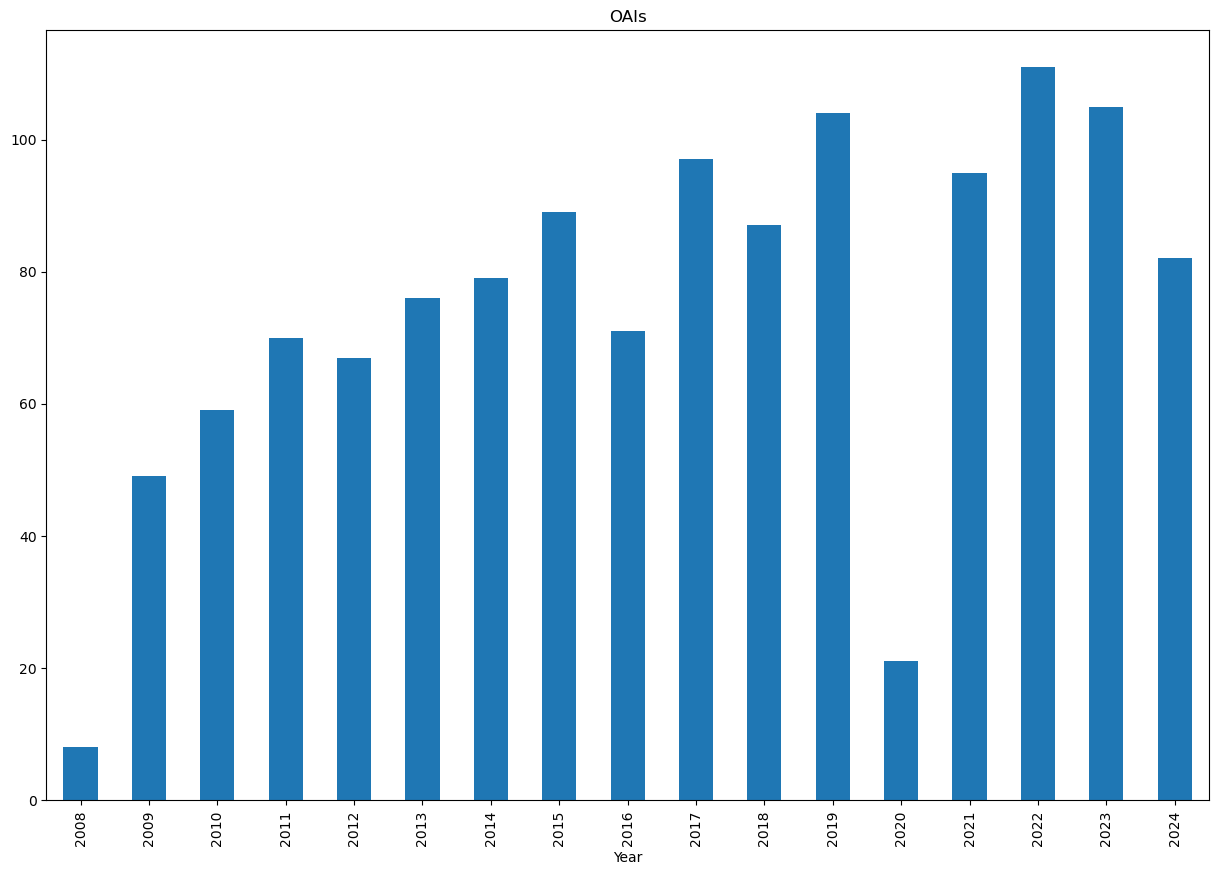

In [36]:
data_df[data_df.Classification == 'OAI'][['InspectionID','Year']].drop_duplicates()['Year'].value_counts(normalize=False).sort_index().plot(kind='bar',figsize=(15,10),title='OAIs')

<Axes: title={'center': 'Proportion of OAIs'}, xlabel='Year'>

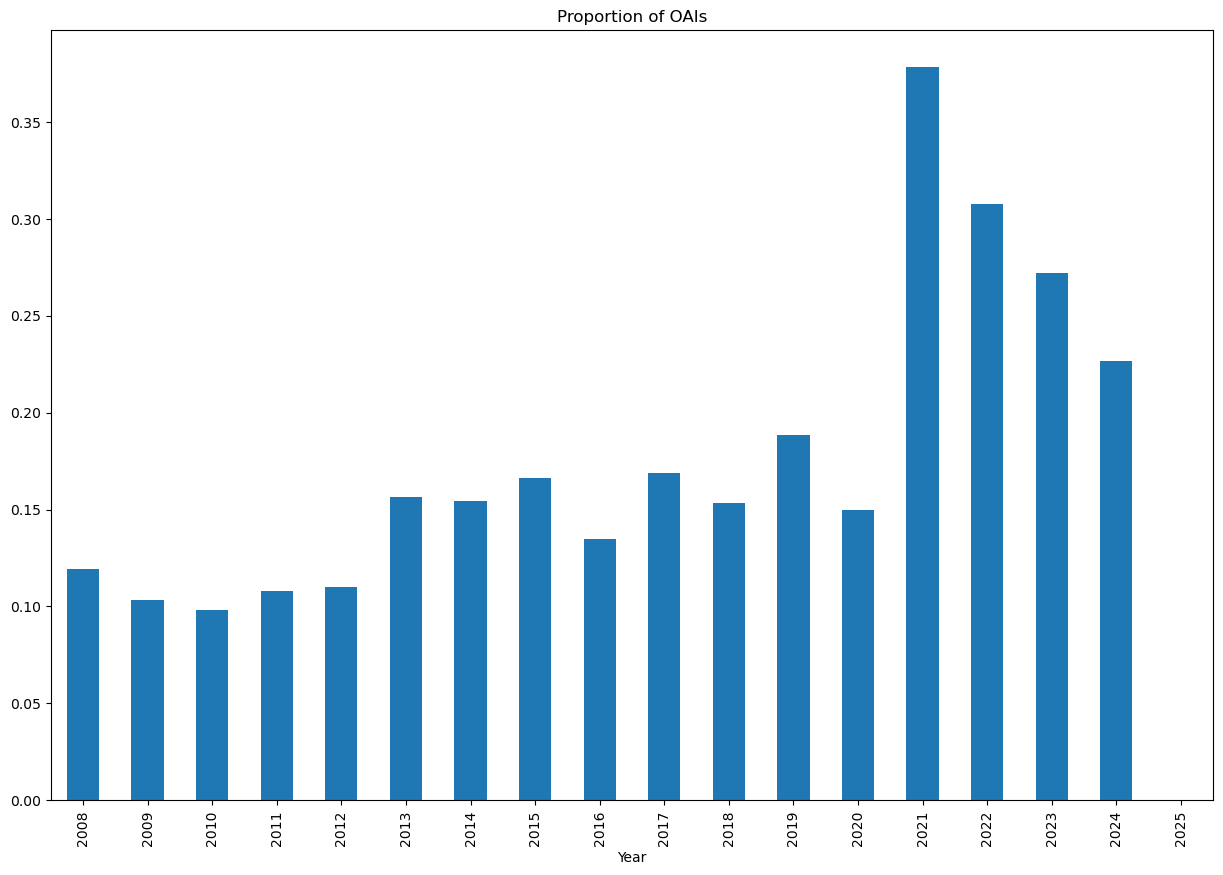

In [37]:
(data_df[data_df.Classification == 'OAI'][['InspectionID','Year']].drop_duplicates()['Year'].value_counts().sort_index()/data_df[['InspectionID','Year']].drop_duplicates()['Year'].value_counts(normalize=False).sort_index()).plot(kind='bar',figsize=(15,10),title='Proportion of OAIs')

In [38]:
(data_df[data_df.Classification == 'OAI'][['InspectionID','Year']].drop_duplicates()['Year'].value_counts().sort_index()/data_df[['InspectionID','Year']].drop_duplicates()['Year'].value_counts(normalize=False).sort_index())

Year
2008    0.119403
2009    0.103158
2010    0.098170
2011    0.107858
2012    0.110016
2013    0.156379
2014    0.154599
2015    0.166355
2016    0.134725
2017    0.168990
2018    0.153439
2019    0.188406
2020    0.150000
2021    0.378486
2022    0.307479
2023    0.272021
2024    0.226519
2025         NaN
Name: count, dtype: float64

## Inspection Gap Length

In [13]:
fda_drugs_details_df = fda_insp_details_df[fda_insp_details_df.ProductType == 'Drugs']

In [26]:
fda_drugs_details_df

FEINumber                                     LegalName  \
227        1047308                            Orlando Health IRB   
259     3014030941                      SOLA Pharmaceuticals LLC   
414     3004570125                             Tergus Pharma LLC   
416     3002806980                           Fermic S.A. de C.V.   
418     3032201947  Smithers Pharmaceutical Development Services   
...            ...                                           ...   
306846  3004668525                          McKesson Corporation   
306850  3001576784              Morehouse School Of Medicine-IRB   
306852     2650031                                      Olay LLC   
306853     2515238                             Eurofins QC, Inc.   
306854     2410924                                 Pfizer,  Inc.   

                    City           State    Zip    CountryArea  FiscalYear  \
227              Orlando         Florida  32806  United States        2025   
259          Baton Rouge       Louisiana  70810  United States        2025   
414               Durham  North Carolina  27703  United States        2025   
416     Ciudad De Mexico               -      -         Mexico        2025   
418         Gaithersburg        Maryland  20878  United States        2025   
...                  ...             ...    ...            ...         ...   
306846           Livonia        Michigan  48150  United States        2009   
306850           Atlanta         Georgia  30310  United States        2009   
306852             Cayey     Puerto Rico  00736  United States        2009   
306853       Southampton    Pennsylvania  18966  United States        2009   
306854          Brooklyn        New York  11206  United States        2009   

        InspectionID PostedCitations InspectionEndDate Classification  \
227          1257474              No        2024-12-19            NAI   
259          1256965             Yes        2024-12-18            NAI   
414          1257890              No        2024-12-13            NAI   
416          1258620              No        2024-12-13            NAI   
418          1258760              No        2024-12-13            NAI   
...              ...             ...               ...            ...   
306846        540709              No        2008-10-01            VAI   
306850        542064              No        2008-10-01            NAI   
306852        542404              No        2008-10-01            OAI   
306853        542811              No        2008-10-01            VAI   
306854        542816              No        2008-10-01            NAI   

                   ProjectArea ProductType  
227     Bioresearch Monitoring       Drugs  
259     Drug Quality Assurance       Drugs  
414     Bioresearch Monitoring       Drugs  
416     Drug Quality Assurance       Drugs  
418     Bioresearch Monitoring       Drugs  
...                        ...         ...  
306846  Drug Quality Assurance       Drugs  
306850  Bioresearch Monitoring       Drugs  
306852  Drug Quality Assurance       Drugs  
306853  Drug Quality Assurance       Drugs  
306854  Drug Quality Assurance       Drugs  

[35931 rows x 13 columns]

<Axes: title={'center': 'Number of Inspections by Factility (Drug QA)'}, xlabel='NumInspections'>

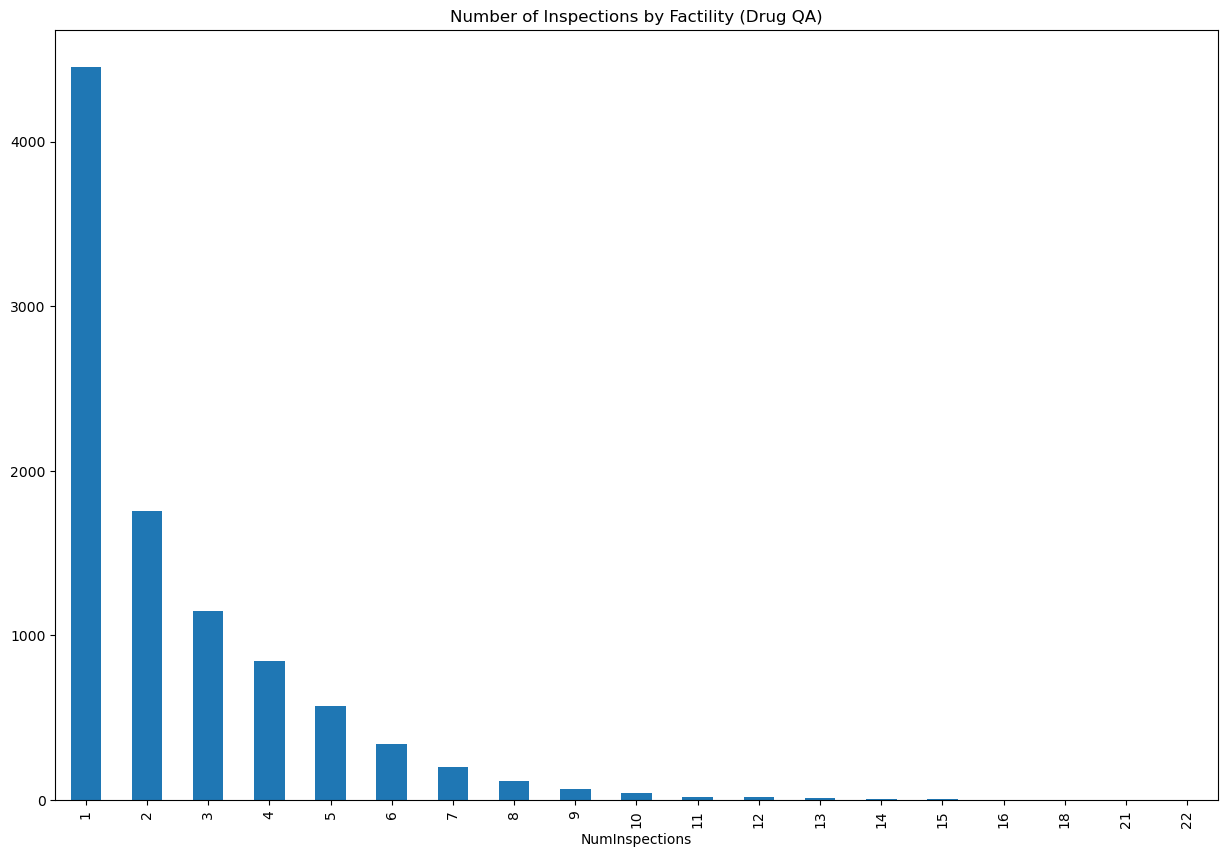

In [27]:
num_insp = fda_drugs_details_df[fda_drugs_details_df.ProjectArea == 'Drug Quality Assurance'].groupby('FEINumber')['InspectionID'].nunique().reset_index()
num_insp.columns = ['FEINumber','NumInspections']
num_insp['NumInspections'].value_counts().sort_index().plot(kind='bar',figsize=(15,10),title='Number of Inspections by Factility (Drug QA)')

<Axes: title={'center': 'Number of Inspections by Factility (Bio)'}, xlabel='NumInspections'>

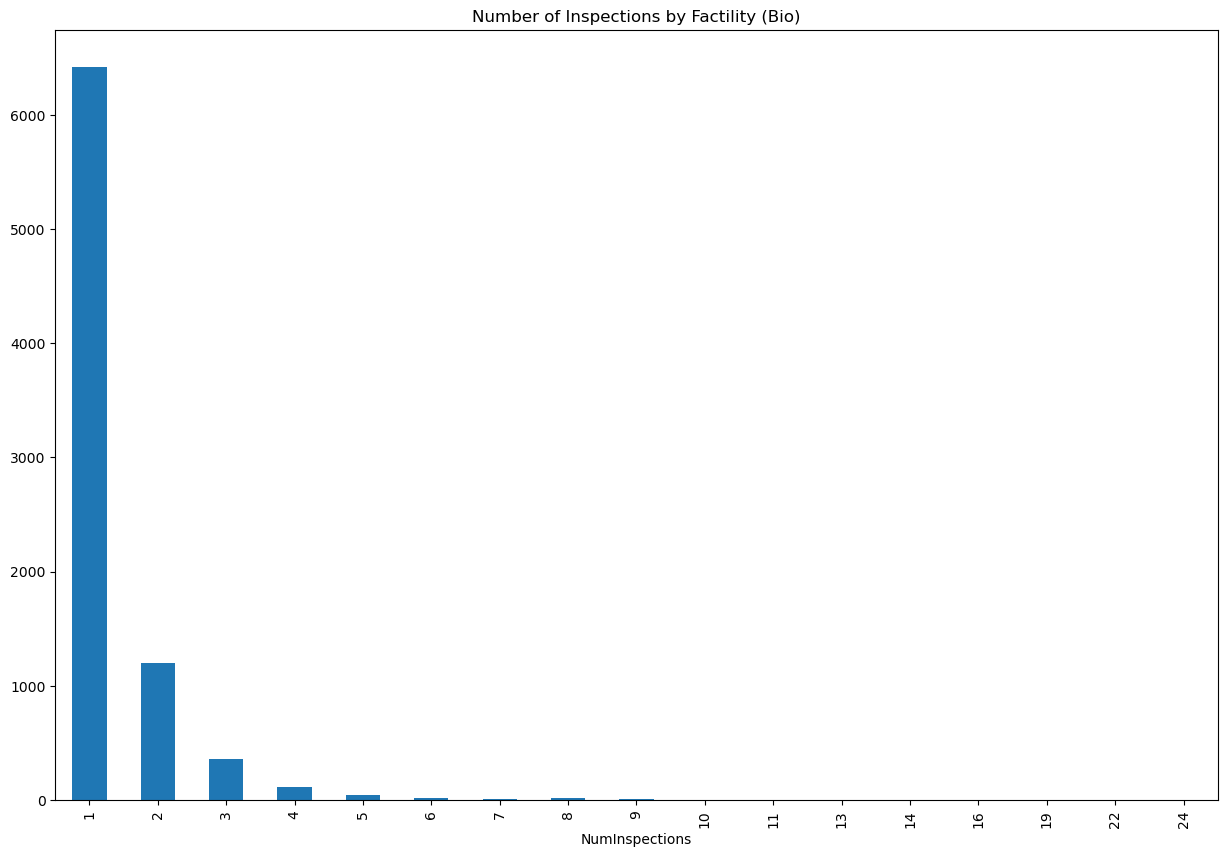

In [79]:
num_insp = fda_drugs_details_df[fda_drugs_details_df.ProjectArea == 'Bioresearch Monitoring'].groupby('FEINumber')['InspectionID'].nunique().reset_index()
num_insp.columns = ['FEINumber','NumInspections']
num_insp['NumInspections'].value_counts().sort_index().plot(kind='bar',figsize=(15,10),title='Number of Inspections by Factility (Bio)')

In [28]:
num_insp = fda_drugs_details_df.groupby('FEINumber')['InspectionID'].nunique().reset_index()
num_insp.columns = ['FEINumber','NumInspections']

In [29]:
last_date_list = []
for i in range(len(fda_drugs_details_df)):
    fei = fda_drugs_details_df['FEINumber'].iloc[i]
    date = fda_drugs_details_df['InspectionEndDate'].iloc[i]
    date_list = list(fda_drugs_details_df[fda_drugs_details_df.FEINumber == fei]['InspectionEndDate'].unique())
    date_list.sort()
    date_id = date_list.index(date)
    if date_id == 0:
        last_date_list.append(None)
    else:
        last_date = date_list[date_id-1]
        last_date_list.append(last_date)
        #print(date_list)
        #print(date,last_date)

In [30]:
fda_drugs_details_df['LastInspectionDate'] = last_date_list

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_2568\1854089250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fda_drugs_details_df['LastInspectionDate'] = last_date_list


In [31]:
fda_drugs_details_df = fda_drugs_details_df.merge(num_insp,how='left',on='FEINumber')

In [32]:
fda_drugs_details_df['InspectionDelta'] = fda_drugs_details_df['InspectionEndDate'] - fda_drugs_details_df['LastInspectionDate']

In [33]:
fda_drugs_details_df['InspectionDelta'] = fda_drugs_details_df['InspectionDelta'].apply(lambda x: str(x).split(' ')[0].replace('NaT','-1'))
fda_drugs_details_df['InspectionDelta'] = fda_drugs_details_df['InspectionDelta'].astype('int')

In [34]:
fda_drugs_details_df['InspectionDeltaCat'] = pd.cut(fda_drugs_details_df['InspectionDelta'],bins=[-1.01,0,365,365*2,365*3,365*4,365*5,365*6,365*7,365*8,1e10],labels=['NoInsp','1yrs','2yrs','3yrs','4yrs','5yrs','6yrs','7yrs','8yrs','>8yrs'])

In [29]:
fda_drugs_details_df['Classification'].value_counts()

Classification
VAI    16752
NAI    16573
OAI     2606
Name: count, dtype: int64

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_31280\2221741025.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals],fontsize=15)


Text(0, 0.5, 'Proportion of Classifications')

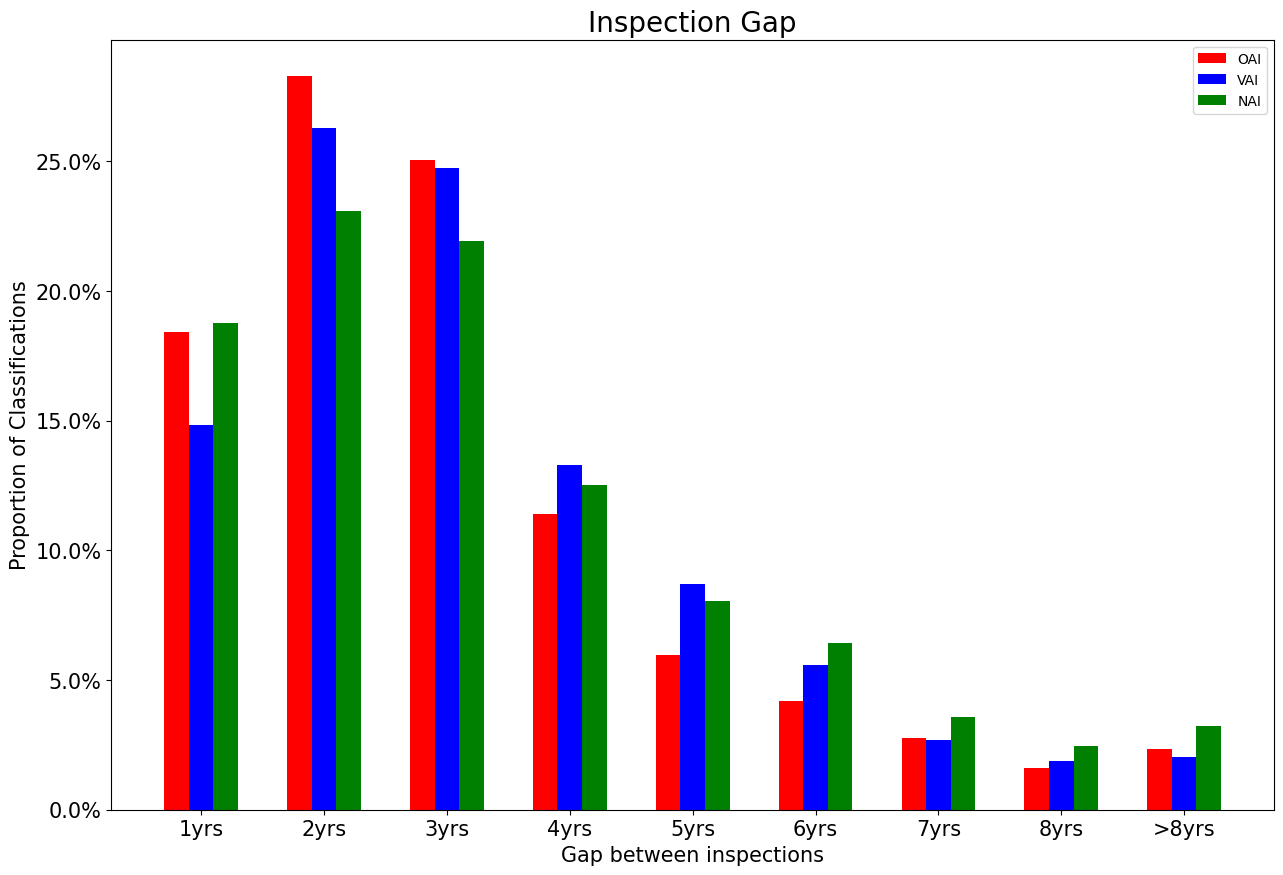

In [32]:
x = np.arange(9)
labels=['1yrs','2yrs','3yrs','4yrs','5yrs','6yrs','7yrs','8yrs','>8yrs']
width = 0.2
first = fda_drugs_details_df[ (fda_drugs_details_df.InspectionDeltaCat !='NoInsp' ) & (fda_drugs_details_df.Classification == 'OAI')]['InspectionDeltaCat'].value_counts(normalize=True).sort_index().iloc[1:]
sec = fda_drugs_details_df[ (fda_drugs_details_df.InspectionDeltaCat !='NoInsp' ) & (fda_drugs_details_df.Classification == 'VAI')]['InspectionDeltaCat'].value_counts(normalize=True).sort_index().iloc[1:]
third = fda_drugs_details_df[ (fda_drugs_details_df.InspectionDeltaCat !='NoInsp' ) & (fda_drugs_details_df.Classification == 'NAI')]['InspectionDeltaCat'].value_counts(normalize=True).sort_index().iloc[1:]


fig, ax = plt.subplots(1,figsize=(15,10))
ax.bar(x - width, first.values,width ,label = 'OAI',color = 'red')
ax.bar(x, sec.values,width,label = 'VAI',color = 'blue')
ax.bar(x + width, third.values,width ,label = 'NAI',color = 'green')


ax.legend(loc = 'upper right')
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=15)
ax.set_title('Inspection Gap',fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals],fontsize=15)
ax.set_xlabel('Gap between inspections',fontsize=15)
ax.set_ylabel('Proportion of Classifications',fontsize=15)

## Citations

In [153]:
tmp = data_df.merge(warning_letters_df,how='left',on='FEINumber')
tmp['ActionDelta'] = tmp['ActionTakenDate'] - tmp['InspectionEndDate']
delta = datetime.timedelta(days=180)
deltamin = datetime.timedelta(days=-10)
tmp = tmp[(tmp.ActionDelta >deltamin) & (tmp.ActionDelta < delta) & (tmp.ActionType=='Warning Letter')]
tmp

InspectionID   FEINumber  \
389         1249754  3005037448   
390         1249754  3005037448   
391         1249754  3005037448   
392         1249754  3005037448   
393         1249754  3005037448   
...             ...         ...   
44459        552659     1930436   
44460        552659     1930436   
44461        552659     1930436   
44465        550070     2650031   
44466        550070     2650031   

                                             LegalName_x InspectionEndDate  \
389    Center for Instrumental Analysis of China Phar...        2024-09-20   
390    Center for Instrumental Analysis of China Phar...        2024-09-20   
391    Center for Instrumental Analysis of China Phar...        2024-09-20   
392    Center for Instrumental Analysis of China Phar...        2024-09-20   
393    Center for Instrumental Analysis of China Phar...        2024-09-20   
...                                                  ...               ...   
44459                           Nostrum Laboratories Inc        2008-11-14   
44460                           Nostrum Laboratories Inc        2008-11-14   
44461                           Nostrum Laboratories Inc        2008-11-14   
44465                                           Olay LLC        2008-11-12   
44466                                           Olay LLC        2008-11-12   

      ProgramArea          ActCFRNumber  \
389         Drugs      21 CFR 211.22(a)   
390         Drugs      21 CFR 211.25(a)   
391         Drugs      21 CFR 211.68(b)   
392         Drugs     21 CFR 211.160(a)   
393         Drugs     21 CFR 211.180(c)   
...           ...                   ...   
44459       Drugs        21 CFR 211.192   
44460       Drugs  21 CFR 211.194(a)(5)   
44461       Drugs  21 CFR 211.194(a)(8)   
44465       Drugs     21 CFR 211.110(a)   
44466       Drugs     21 CFR 211.166(a)   

                                        ShortDescription  \
389                         Lack of quality control unit   
390            Training , Education , Experience overall   
391           Computer control of master formula records   
392          Lab controls established, including changes   
393            Records not made readily available to FDA   
...                                                  ...   
44459          Investigations of discrepancies, failures   
44460          Calculations performed are in the records   
44461                             Second person sign off   
44465  Control procedures to monitor and validate per...   
44466  Results not used for expiration dates, storage...   

                                         LongDescription Classification  Year  \
389                    There is no quality control unit.            OAI  2024   
390    Employees engaged in the processing of a drug ...            OAI  2024   
391    Appropriate controls are not exercised over co...            OAI  2024   
392    The establishment of test procedures and labor...            OAI  2024   
393    Records associated with drug product control a...            OAI  2024   
...                                                  ...            ...   ...   
44459  There is a failure to thoroughly review any un...            OAI  2008   
44460  Laboratory records do not include a record of ...            OAI  2008   
44461  Laboratory records do not include the initials...            OAI  2008   
44465  Control procedures are not established which v...            OAI  2008   
44466  Results of stability testing are not used in d...            OAI  2008   

                                     LongDescription_fix  \
389                    There is no quality control unit.   
390    Employees engaged in the processing of a drug ...   
391    Appropriate controls are not exercised over co...   
392    The establishment of test procedures and labor...   
393    Records associated with drug product control a...   
...                                                  ...   
44459  There is a 

In [172]:
data_trim_df = data_df.copy()
data_trim_df = data_trim_df.drop('Classification',axis=1).drop_duplicates().merge(data_trim_df[['InspectionID','Classification']].drop_duplicates().groupby(['InspectionID'])['Classification'].sum().reset_index(),
                        how = 'left',
                        on = 'InspectionID')
data_trim_df = data_trim_df.drop_duplicates()
data_trim_df.columns = ['InspectionID', 'FEINumber', 'LegalName', 'InspectionEndDate',
       'ProgramArea', 'ActCFRNumber', 'ShortDescription', 'LongDescription','Year','LongDescription_fix','NewCitation',
        'Classification']

In [173]:
data_trim_df = data_trim_df.merge(tmp[['InspectionID','ActionType']].drop_duplicates(),how='left',on='InspectionID')
data_trim_df['ActionType'] = data_trim_df['ActionType'].fillna('')

In [174]:
def fix_classification(x):
    if x.count('OAI') or x.count('Recall') > 0:
        return 'OAI'
    elif x.count('VAI') > 0:
        return 'VAI'
    else:
        return x
        
#data_trim_df['Classification'] = data_trim_df['Classification'].apply(lambda x: fix_classification(x))
data_trim_df = data_trim_df[data_trim_df['Classification'].isin(['OAI','VAI'])]

In [178]:
act_df = data_trim_df[ (data_trim_df.InspectionEndDate >= '2017-01-01') &( data_trim_df.InspectionEndDate < '2024-01-01')][['InspectionID','ActCFRNumber','Classification']]
act_df['Values'] = len(act_df)*[1]

act_df = act_df.pivot_table(index='Classification',columns='ActCFRNumber',values='Values',aggfunc='sum').fillna(0).T
act_df['Total'] = act_df.T.sum().values
act_df['OAI_weighted'] = act_df['OAI'] / act_df['Total']

In [176]:
act_df

Classification          OAI    VAI   Total  OAI_weighted
ActCFRNumber                                            
21 CFR 211.100(a)     351.0  960.0  1311.0      0.267735
21 CFR 211.100(b)     122.0  630.0   752.0      0.162234
21 CFR 211.101(a)       7.0    9.0    16.0      0.437500
21 CFR 211.101(b)       8.0   24.0    32.0      0.250000
21 CFR 211.101(b)(1)    0.0    1.0     1.0      0.000000
...                     ...    ...     ...           ...
FDCA 505-1(f)(4)        0.0    6.0     6.0      0.000000
FDCA 760(b)(1)          5.0   10.0    15.0      0.333333
FDCA 760(c)(1)          0.0    4.0     4.0      0.000000
FDCA 760(c)(2)          0.0    1.0     1.0      0.000000
FDCA 760(e)(2)(A)       0.0    1.0     1.0      0.000000

[347 rows x 4 columns]

In [159]:
act_wl_df = data_trim_df[( data_trim_df.InspectionEndDate < '2024-01-01')][['InspectionID','ActCFRNumber','ActionType']]
act_wl_df['Values'] = len(act_wl_df)*[1]

act_wl_df = act_wl_df.pivot_table(index='ActionType',columns='ActCFRNumber',values='Values',aggfunc='sum').fillna(0).T
act_wl_df['Total'] = act_wl_df.T.sum().values
act_wl_df['WL_weighted'] = act_wl_df['Warning Letter'] / act_wl_df['Total']

In [160]:
act_wl_df

ActionType                    Warning Letter   Total  WL_weighted
ActCFRNumber                                                     
21 CFR 211.100(a)     1251.0            60.0  1311.0     0.045767
21 CFR 211.100(b)      723.0            29.0   752.0     0.038564
21 CFR 211.101(a)       15.0             1.0    16.0     0.062500
21 CFR 211.101(b)       31.0             1.0    32.0     0.031250
21 CFR 211.101(b)(1)     1.0             0.0     1.0     0.000000
...                      ...             ...     ...          ...
FDCA 505-1(f)(4)         6.0             0.0     6.0     0.000000
FDCA 760(b)(1)          14.0             1.0    15.0     0.066667
FDCA 760(c)(1)           4.0             0.0     4.0     0.000000
FDCA 760(c)(2)           1.0             0.0     1.0     0.000000
FDCA 760(e)(2)(A)        1.0             0.0     1.0     0.000000

[347 rows x 4 columns]

In [166]:
act_wl_df['WL_weighted'].mean(),act_wl_df['WL_weighted'].std()

(0.047033625386912976, 0.10485830905018761)

In [168]:
act_wl_df[act_wl_df.Total > 5].sort_values(by='WL_weighted',ascending=False)

ActionType                  Warning Letter  Total  WL_weighted
ActCFRNumber                                                  
21 CFR 211.194(a)(1)  27.0             6.0   33.0     0.181818
21 CFR 211.42(d)      14.0             3.0   17.0     0.176471
21 CFR 211.194(a)(3)   5.0             1.0    6.0     0.166667
21 CFR 211.28(b)      20.0             4.0   24.0     0.166667
21 CFR 211.176        11.0             2.0   13.0     0.153846
...                    ...             ...    ...          ...
21 CFR 211.208         9.0             0.0    9.0     0.000000
21 CFR 211.89         36.0             0.0   36.0     0.000000
21 CFR 211.42(c)(4)    6.0             0.0    6.0     0.000000
21 CFR 211.110(d)     13.0             0.0   13.0     0.000000
21 CFR 211.94(a)      15.0             0.0   15.0     0.000000

[233 rows x 4 columns]

In [171]:
act_wl_df['Warning Letter'].sum()/8

215.5

# Preprocessing

## Adding Recalls

In [1524]:
tmp = data_df.merge(recalls_df,how='left',on='FEINumber')
tmp['RecallDelta'] = tmp['CenterClassificationDate'] - tmp['InspectionEndDate']
delta = datetime.timedelta(days=90)
deltamin = datetime.timedelta(days=-10)
tmp = tmp[(tmp.RecallDelta >deltamin) & (tmp.RecallDelta < delta)]
recall_piece = tmp

In [1525]:
recall_piece['Recall'] = ['Recall']*len(recall_piece)

## Warning Letters

In [86]:
warning_letters_df['FEINumber'] = warning_letters_df['FEINumber'].astype('int64')

In [119]:
tmp = data_df.merge(warning_letters_df,how='left',on='FEINumber')
tmp['ActionDelta'] = tmp['ActionTakenDate'] - tmp['InspectionEndDate']
delta = datetime.timedelta(days=180)
deltamin = datetime.timedelta(days=-10)
#tmp = tmp[(tmp.ActionDelta >deltamin) & (tmp.ActionDelta < delta)]
tmp

InspectionID   FEINumber                         LegalName_x  \
0           1258459     2245909                          Davion Inc   
1           1258459     2245909                          Davion Inc   
2           1259408  3010551507          Microbac Laboratories, Inc   
3           1259408  3010551507          Microbac Laboratories, Inc   
4           1259242  3015200795       Scapa Tapes North America LLC   
...             ...         ...                                 ...   
44684        542388     3021537  AmerisourceBergen Drug Corporation   
44685        542388     3021537  AmerisourceBergen Drug Corporation   
44686        542411  3002037061         Pekana Naturheilmittel GmbH   
44687        542411  3002037061         Pekana Naturheilmittel GmbH   
44688        542411  3002037061         Pekana Naturheilmittel GmbH   

      InspectionEndDate ProgramArea          ActCFRNumber  \
0            2025-01-24       Drugs      21 CFR 211.22(d)   
1            2025-01-24       Drugs         21 CFR 211.58   
2            2025-01-24       Drugs      21 CFR 211.22(d)   
3            2025-01-24       Drugs        21 CFR 211.192   
4            2025-01-23       Drugs      21 CFR 211.22(d)   
...                 ...         ...                   ...   
44684        2008-10-07       Drugs     21 CFR 211.142(b)   
44685        2008-10-07       Drugs        21 CFR 211.204   
44686        2008-10-02       Drugs      21 CFR 211.22(d)   
44687        2008-10-02       Drugs        21 CFR 211.130   
44688        2008-10-02       Drugs  21 CFR 211.188(b)(8)   

                                        ShortDescription  \
0             Procedures not  in writing, fully followed   
1       Buildings not maintained in good state of repair   
2             Procedures not  in writing, fully followed   
3             Written record of investigation incomplete   
4             Procedures not  in writing, fully followed   
...                                                  ...   
44684               Storage under appropriate conditions   
44685  Returned drug products with doubt cast as to s...   
44686         Procedures not  in writing, fully followed   
44687               Procedures are written, and followed   
44688  Labeling control records including specimens o...   

                                         LongDescription Classification  Year  \
0      The responsibilities and procedures applicable...            VAI  2025   
1      Buildings used in the of a drug product are no...            VAI  2025   
2      The responsibilities and procedures applicable...            VAI  2025   
3      Written records of investigations into unexpla...            VAI  2025   
4      The responsibilities and procedures applicable...            VAI  2025   
...                                                  ...            ...   ...   
44684  Drug products are not stored under appropriate...            VAI  2008   
44685  Returned drug products held, stored or shipped...            VAI  2008   
44686  The responsibilities and procedures applicable...            VAI  2008   
44687  Procedures designed to assure that correct lab...            VAI  2008   
44688  Batch production and control records do not in...            VAI  2008   

                                     LongDescription_fix  \
0      The responsibilities and procedures applicable...   
1      Buildings used in the of a drug product are no...   
2      The responsibilities and procedures applicable...   
3      Written records of investigations into unexpla...   
4      The responsibilities and procedures applicable...   
...                                                  ...   
44684  Drug products are not stored under appropriate...   
44685  Returned drug products held stored or shipped ...   
44686  The responsibilities and procedures applicable...   
44687  Procedures designed to assure that correct lab...   
44688  Batch production and control records do not in...   

      

In [35]:
data_df.head(100)

InspectionID   FEINumber                     LegalName InspectionEndDate  \
0        1256965  3014030941      SOLA Pharmaceuticals LLC        2024-12-18   
1        1256965  3014030941      SOLA Pharmaceuticals LLC        2024-12-18   
2        1236864  3004991673  Bristol-Myers Squibb Company        2024-12-06   
3        1236864  3004991673  Bristol-Myers Squibb Company        2024-12-06   
4        1236864  3004991673  Bristol-Myers Squibb Company        2024-12-06   
..           ...         ...                           ...               ...   
95       1251315  3001611969           Leading Pharma, LLC        2024-10-21   
96       1251315  3001611969           Leading Pharma, LLC        2024-10-21   
97       1251315  3001611969           Leading Pharma, LLC        2024-10-21   
98       1250196  3014171792       INDUCTION THERAPIES LLC        2024-10-18   
99       1250196  3014171792       INDUCTION THERAPIES LLC        2024-10-18   

   ProgramArea         ActCFRNumber  \
0        Drugs     21 CFR 211.22(a)   
1        Drugs     21 CFR 211.22(d)   
2        Drugs  FDCA 505-1(f)(3)(A)   
3        Drugs  FDCA 505-1(f)(3)(B)   
4        Drugs  FDCA 505-1(f)(3)(E)   
..         ...                  ...   
95       Drugs    21 CFR 211.110(c)   
96       Drugs    21 CFR 211.165(e)   
97       Drugs       21 CFR 211.192   
98       Drugs     21 CFR 211.22(a)   
99       Drugs     21 CFR 211.22(d)   

                                     ShortDescription  \
0                        Lack of quality control unit   
1          Procedures not  in writing, fully followed   
2   Failure to comply with REMS Elements to Assure...   
3   Failure to comply with REMS Elements to Assure...   
4   Failure to comply with REMS Elements to Assure...   
..                                                ...   
95       In-process materials characteristics testing   
96                                       Test methods   
97          Investigations of discrepancies, failures   
98     Contract drug products--lack of responsibility   
99         Procedures not  in writing, fully followed   

                                      LongDescription Classification  Year  
0                   There is no quality control unit.            NAI  2024  
1   The responsibilities and procedures applicable...            NAI  2024  
2   An application holder did not make training av...            VAI  2024  
3   An application holder did not ensure mechanism...            VAI  2024  
4   An application holder did not instruct healthc...            VAI  2024  
..                                                ...            ...   ...  
95  In-process materials are not tested for qualit...            VAI  2024  
96  The accuracy, sensitivity, specificity and rep...            VAI  2024  
97  There is a failure to thoroughly review any un...            VAI  2024  
98  The quality control unit lacks responsibility ...            VAI  2024  
99  The responsibilities and procedures applicable...            VAI  2024  

[100 rows x 10 columns]

In [26]:
from sklearn.preprocessing import StandardScaler

In [86]:
data_trim_df = data_df.copy()

In [87]:
data_trim_df = data_trim_df.drop('Classification',axis=1).drop_duplicates().merge(data_trim_df[['InspectionID','Classification']].drop_duplicates().groupby(['InspectionID'])['Classification'].sum().reset_index(),
                        how = 'left',
                        on = 'InspectionID')
data_trim_df = data_trim_df.drop_duplicates()
data_trim_df

InspectionID   FEINumber                           LegalName  \
0           1258459     2245909                          Davion Inc   
1           1258459     2245909                          Davion Inc   
2           1259408  3010551507          Microbac Laboratories, Inc   
3           1259408  3010551507          Microbac Laboratories, Inc   
4           1259242  3015200795       Scapa Tapes North America LLC   
...             ...         ...                                 ...   
37875        542388     3021537  AmerisourceBergen Drug Corporation   
37876        542388     3021537  AmerisourceBergen Drug Corporation   
37877        542411  3002037061         Pekana Naturheilmittel GmbH   
37878        542411  3002037061         Pekana Naturheilmittel GmbH   
37879        542411  3002037061         Pekana Naturheilmittel GmbH   

      InspectionEndDate ProgramArea          ActCFRNumber  \
0            2025-01-24       Drugs      21 CFR 211.22(d)   
1            2025-01-24       Drugs         21 CFR 211.58   
2            2025-01-24       Drugs      21 CFR 211.22(d)   
3            2025-01-24       Drugs        21 CFR 211.192   
4            2025-01-23       Drugs      21 CFR 211.22(d)   
...                 ...         ...                   ...   
37875        2008-10-07       Drugs     21 CFR 211.142(b)   
37876        2008-10-07       Drugs        21 CFR 211.204   
37877        2008-10-02       Drugs      21 CFR 211.22(d)   
37878        2008-10-02       Drugs        21 CFR 211.130   
37879        2008-10-02       Drugs  21 CFR 211.188(b)(8)   

                                        ShortDescription  \
0             Procedures not  in writing, fully followed   
1       Buildings not maintained in good state of repair   
2             Procedures not  in writing, fully followed   
3             Written record of investigation incomplete   
4             Procedures not  in writing, fully followed   
...                                                  ...   
37875               Storage under appropriate conditions   
37876  Returned drug products with doubt cast as to s...   
37877         Procedures not  in writing, fully followed   
37878               Procedures are written, and followed   
37879  Labeling control records including specimens o...   

                                         LongDescription  Year  \
0      The responsibilities and procedures applicable...  2025   
1      Buildings used in the of a drug product are no...  2025   
2      The responsibilities and procedures applicable...  2025   
3      Written records of investigations into unexpla...  2025   
4      The responsibilities and procedures applicable...  2025   
...                                                  ...   ...   
37875  Drug products are not stored under appropriate...  2008   
37876  Returned drug products held, stored or shipped...  2008   
37877  The responsibilities and procedures applicable...  2008   
37878  Procedures designed to assure that correct lab...  2008   
37879  Batch production and control records do not in...  2008   

                                     LongDescription_fix  \
0      The responsibilities and procedures applicable...   
1      Buildings used in the of a drug product are no...   
2      The responsibilities and procedures applicable...   
3      Written records of investigations into unexpla...   
4      The responsibilities and procedures applicable...   
...                                                  ...   
37875  Drug products are not stored under appropriate...   
37876  Returned drug products held stored or shipped ...   
37877  The responsibilities and procedures applicable...   
37878  Procedures designed to assure that correct lab...   
37879  Batch production and control records do not in...   

                NewCitation Classification  
0          21 CFR 211.22(d)            VAI  
1             21 CFR 211.58            VAI  
2          21 CFR 211.22(d)            VAI  
3     

In [88]:
data_trim_df.columns = ['InspectionID', 'FEINumber', 'LegalName', 'InspectionEndDate',
       'ProgramArea', 'ActCFRNumber', 'ShortDescription', 'LongDescription','Year','LongDescription_fix','NewCitation',
        'Classification']

In [1779]:
#data_trim_df = data_trim_df.merge(recall_piece[['InspectionID','Recall']].drop_duplicates(),
#                    how = 'left',
#                    on = ['InspectionID'])
#data_trim_df['Recall'] = data_trim_df['Recall'].fillna('')
#data_trim_df['Classification'] = data_trim_df['Classification']+data_trim_df['Recall']

In [402]:
data_trim_df['Classification'].value_counts()

Classification
VAI          25363
OAI           9579
NAIVAI        1148
VAINAI         654
VAIOAI         323
NAIOAI         268
NAI            178
OAINAI         160
OAIVAI         154
VAIOAINAI       38
OAINAIVAI        8
OAIVAINAI        7
Name: count, dtype: int64

In [89]:
def fix_classification(x):
    if x.count('OAI') or x.count('Recall') > 0:
        return 'OAI'
    elif x.count('VAI') > 0:
        return 'VAI'
    else:
        return x
        
#data_trim_df['Classification'] = data_trim_df['Classification'].apply(lambda x: fix_classification(x))
data_trim_df = data_trim_df[data_trim_df['Classification'].isin(['OAI','VAI'])]

In [90]:
data_trim_df = data_trim_df.merge(fda_insp_details_df[['FEINumber','CountryArea']].drop_duplicates(),
                                    how = 'left',
                                    on = 'FEINumber')

In [114]:
act_df = data_trim_df[( data_trim_df.InspectionEndDate < '2024-01-01')][['InspectionID','NewCitation','Classification']]
act_df['Values'] = len(act_df)*[1]

act_df = act_df.pivot_table(index='Classification',columns='NewCitation',values='Values',aggfunc='sum').fillna(0).T
act_df['Total'] = act_df.T.sum().values
act_df['OAI_weighted'] = act_df['OAI'] / act_df['Total']
#act_df['OAI_weighted'] = [1]*len(act_df)

In [92]:
data_trim_df = data_trim_df.merge(act_df,how='left',on='NewCitation')
data_trim_df['OAI_weighted'].isnull().sum()

8

In [93]:
data_trim_df

InspectionID   FEINumber                           LegalName  \
0           1258459     2245909                          Davion Inc   
1           1258459     2245909                          Davion Inc   
2           1259408  3010551507          Microbac Laboratories, Inc   
3           1259408  3010551507          Microbac Laboratories, Inc   
4           1259242  3015200795       Scapa Tapes North America LLC   
...             ...         ...                                 ...   
34937        542388     3021537  AmerisourceBergen Drug Corporation   
34938        542388     3021537  AmerisourceBergen Drug Corporation   
34939        542411  3002037061         Pekana Naturheilmittel GmbH   
34940        542411  3002037061         Pekana Naturheilmittel GmbH   
34941        542411  3002037061         Pekana Naturheilmittel GmbH   

      InspectionEndDate ProgramArea          ActCFRNumber  \
0            2025-01-24       Drugs      21 CFR 211.22(d)   
1            2025-01-24       Drugs         21 CFR 211.58   
2            2025-01-24       Drugs      21 CFR 211.22(d)   
3            2025-01-24       Drugs        21 CFR 211.192   
4            2025-01-23       Drugs      21 CFR 211.22(d)   
...                 ...         ...                   ...   
34937        2008-10-07       Drugs     21 CFR 211.142(b)   
34938        2008-10-07       Drugs        21 CFR 211.204   
34939        2008-10-02       Drugs      21 CFR 211.22(d)   
34940        2008-10-02       Drugs        21 CFR 211.130   
34941        2008-10-02       Drugs  21 CFR 211.188(b)(8)   

                                        ShortDescription  \
0             Procedures not  in writing, fully followed   
1       Buildings not maintained in good state of repair   
2             Procedures not  in writing, fully followed   
3             Written record of investigation incomplete   
4             Procedures not  in writing, fully followed   
...                                                  ...   
34937               Storage under appropriate conditions   
34938  Returned drug products with doubt cast as to s...   
34939         Procedures not  in writing, fully followed   
34940               Procedures are written, and followed   
34941  Labeling control records including specimens o...   

                                         LongDescription  Year  \
0      The responsibilities and procedures applicable...  2025   
1      Buildings used in the of a drug product are no...  2025   
2      The responsibilities and procedures applicable...  2025   
3      Written records of investigations into unexpla...  2025   
4      The responsibilities and procedures applicable...  2025   
...                                                  ...   ...   
34937  Drug products are not stored under appropriate...  2008   
34938  Returned drug products held, stored or shipped...  2008   
34939  The responsibilities and procedures applicable...  2008   
34940  Procedures designed to assure that correct lab...  2008   
34941  Batch production and control records do not in...  2008   

                                     LongDescription_fix  \
0      The responsibilities and procedures applicable...   
1      Buildings used in the of a drug product are no...   
2      The responsibilities and procedures applicable...   
3      Written records of investigations into unexpla...   
4      The responsibilities and procedures applicable...   
...                                                  ...   
34937  Drug products are not stored under appropriate...   
34938  Returned drug products held stored or shipped ...   
34939  The responsibilities and procedures applicable...   
34940  Procedures designed to assure that correct lab...   
34941  Batch production and control records do not in...   

                NewCitation Classification    CountryArea    OAI     VAI  \
0          21 CFR 211.22(d)            VAI  United States  386.0  1406.0   
1             21 CFR 211.58       

In [94]:
input_df = data_trim_df.pivot_table(index='InspectionID',columns='NewCitation',values='OAI_weighted').fillna(0)

In [95]:
input_df['CitationScore'] = input_df.T.sum().values
ss = StandardScaler()
ss.fit(input_df[['CitationScore']])
#input_df['CitationCount'] = ss.transform(input_df[['CitationCount']])

StandardScaler()

In [96]:
def encode_country(x):
    if x == "United States":
        return 1
    elif x == 'India':
        return -1
    else:
        return 0

input_df = input_df.merge(data_trim_df[['InspectionID','CountryArea']].drop_duplicates(),how='left',on='InspectionID')
input_df['CountryArea'] = input_df['CountryArea'].apply(lambda x: encode_country(x))

In [97]:
input_df = input_df.merge(data_trim_df[['InspectionID','Year']].drop_duplicates(),
                            how = 'left',
                            on = 'InspectionID')
input_df['Year'] = input_df['Year'].apply(lambda x: 1 if x > 2020 else 0)

In [98]:
input_df = input_df.merge(data_trim_df[['InspectionID','Classification']].drop_duplicates(),
                            how = 'left',
                            on = 'InspectionID')
input_df['Classification'] = input_df['Classification'].apply(lambda x: 1 if x == 'OAI' else 0)
input_df = input_df.set_index('InspectionID')
input_df

21 CFR 211.100(a)  21 CFR 211.100(a)(0)  21 CFR 211.100(b)  \
InspectionID                                                               
541807                 0.000000                   0.0           0.000000   
542388                 0.000000                   0.0           0.000000   
542411                 0.000000                   0.0           0.000000   
543628                 0.000000                   0.0           0.000000   
544056                 0.000000                   0.0           0.000000   
...                         ...                   ...                ...   
1258228                0.000000                   0.0           0.000000   
1258326                0.000000                   0.0           0.162234   
1258459                0.000000                   0.0           0.000000   
1259242                0.274557                   0.0           0.000000   
1259408                0.000000                   0.0           0.000000   

              21 CFR 211.101(a)  21 CFR 211.101(a)(0)  21 CFR 211.101(b)  \
InspectionID                                                               
541807                      0.0                   0.0               0.00   
542388                      0.0                   0.0               0.00   
542411                      0.0                   0.0               0.00   
543628                      0.0                   0.0               0.00   
544056                      0.0                   0.0               0.25   
...                         ...                   ...                ...   
1258228                     0.0                   0.0               0.00   
1258326                     0.0                   0.0               0.00   
1258459                     0.0                   0.0               0.00   
1259242                     0.0                   0.0               0.00   
1259408                     0.0                   0.0               0.00   

              21 CFR 211.101(b)(1)  21 CFR 211.101(b)(4)  21 CFR 211.101(c)  \
InspectionID                                                                  
541807                         0.0                   0.0                0.0   
542388                         0.0                   0.0                0.0   
542411                         0.0                   0.0                0.0   
543628                         0.0                   0.0                0.0   
544056                         0.0                   0.0                0.0   
...                            ...                   ...                ...   
1258228                        0.0                   0.0                0.0   
1258326                        0.0                   0.0                0.0   
1258459                        0.0                   0.0                0.0   
1259242                        0.0                   0.0                0.0   
1259408                        0.0                   0.0                0.0   

              21 CFR 211.101(c)(1)  ...  FDCA 505-1(f)(3)(F)  \
InspectionID                        ...                        
541807                         0.0  ...                  0.0   
542388                         0.0  ...                  0.0   
542411                         0.0  ...                  0.0   
543628                         0.0  ...                  0.0   
544056                         0.0  ...                  0.0   
...                            ...  ...                  ...   
1258228                        0.0  ...                  0.0   
1258326                        0.0  ...                  0.0   
1258459                        0.0  ...                  0.0   
1259242                        0.0  ...                  0.0   
1259408                        0.0  ...                  0.0   

              FDCA 505-1(f)(4)  FDCA 760(b)(1)  FDCA 760(c)(1)  \
InspectionID                                                     
541807                     0.0             

In [99]:
citation_score = input_df[input_df.Year == 1][['Classification','CitationScore']]

In [100]:
input_df = input_df.merge(data_df.groupby('InspectionID')['ActCFRNumber'].nunique(),how='left',on='InspectionID')
ss_act = StandardScaler()
ss_act.fit(input_df[['ActCFRNumber']])
#input_df['ActCFRNumber'] = ss_act.transform(input_df[['ActCFRNumber']])

StandardScaler()

In [101]:
input_df['CitationScore_mean'] = input_df['CitationScore']/input_df['ActCFRNumber']
#input_df=  input_df.drop('ActCFRNumber',axis=1)

In [43]:
input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 0)]['CitationScore'].mean(),input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 0)]['CitationScore'].std()

(1.2592520588374925, 0.3234222903866665)

In [536]:
input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 1)]['CitationScore'].mean(),input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 1)]['CitationScore'].std()

(1.5274110978316087, 0.44291212932737606)

<Axes: >

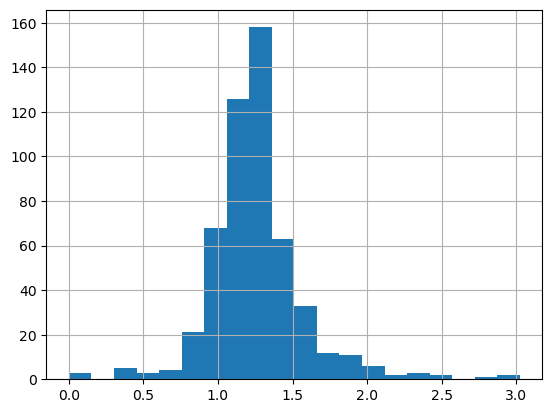

In [544]:
input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 0)]['CitationScore'].hist(bins=20)

<Axes: >

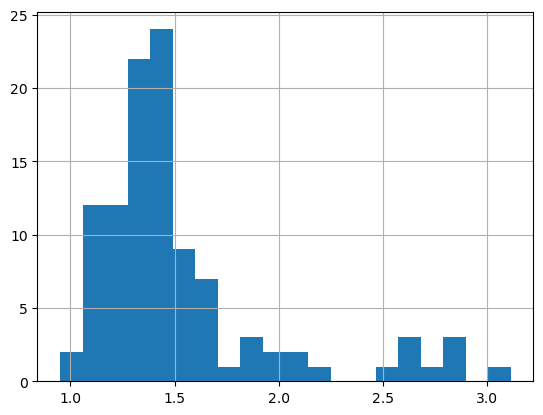

In [545]:
input_df[(input_df.ActCFRNumber == 5) & (input_df.Classification == 1)]['CitationScore'].hist(bins=20)

Classification
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: CitationScore, dtype: object

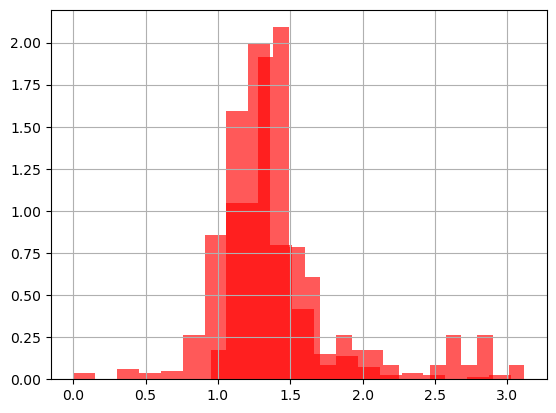

In [556]:
input_df[(input_df.ActCFRNumber == 5)].groupby('Classification')['CitationScore'].hist(bins=20,density=True,alpha=0.65,color = ['red'])

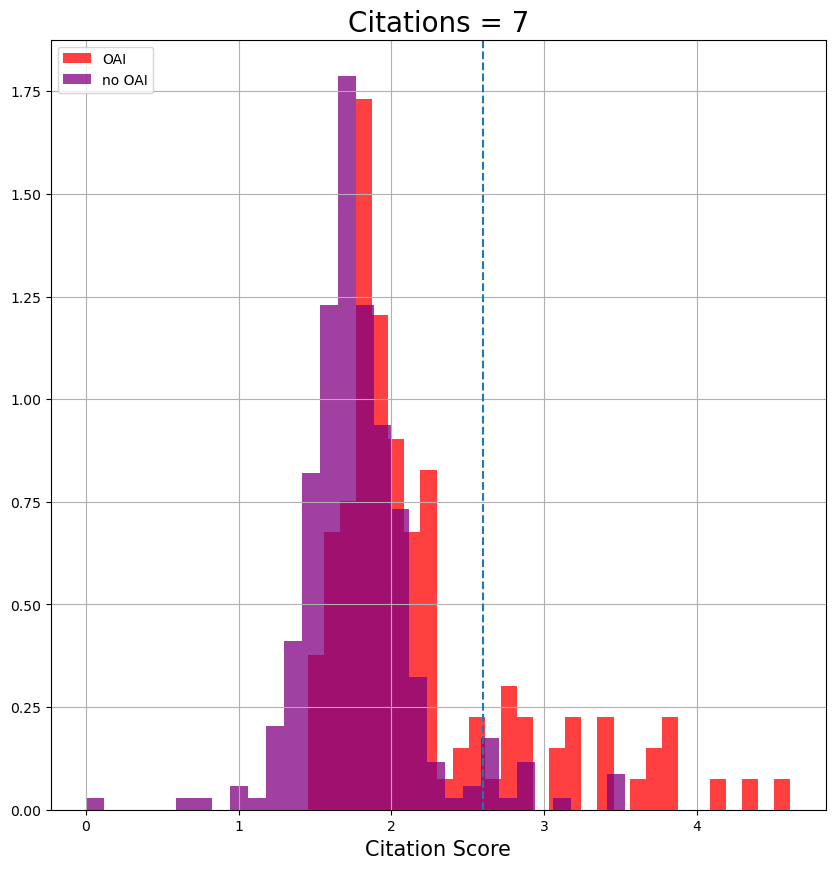

In [111]:
f, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Citations = 7',fontsize=20)
input_df[(input_df.ActCFRNumber == 7) & (input_df.Classification == 1) ]['CitationScore'].hist(bins=30,color='red',stacked=True, density=True,alpha = 0.75,label = 'OAI')
input_df[(input_df.ActCFRNumber == 7) & (input_df.Classification == 0)]['CitationScore'].hist(bins=30,color='purple',density=True,alpha=0.75,label='no OAI',stacked=True)
ax1.axvline(x=2.6,linestyle='dashed')
ax1.set_xlabel('Citation Score',fontsize=15)
ax1.legend(loc = 'upper left')

In [ ]:
len(input_df)

In [ ]:
input_df[(input_df.ActCFRNumber == 7) & (input_df.CitationScore >= 2.6) ]['Classification'].value_counts()

Classification
0    290
1    126
Name: count, dtype: int64

In [106]:
input_df[input_df.ActCFRNumber == 7]['Classification'].value_counts(normalize=True)

Classification
0    0.697115
1    0.302885
Name: proportion, dtype: float64

In [44]:
ss_ccw = StandardScaler()
ss_ccw.fit(input_df[['CitationScore_mean']])
input_df['ActCFRNumber'] = ss_act.transform(input_df[['ActCFRNumber']])
input_df['CitationScore'] = ss.transform(input_df[['CitationScore']])
input_df['CitationScore_mean'] = ss_ccw.transform(input_df[['CitationScore_mean']])

### Corrs

In [45]:
abs(input_df.corr()['Classification']).sort_values(ascending=False).head(151)

Classification              1.000000
CitationScore               0.477960
ActCFRNumber                0.362557
CitationScore_mean          0.327905
21 CFR 211.42(c)(10)(iv)    0.287145
                              ...   
21 CFR 211.170(a)(1)        0.026973
21 CFR 211.110(c)           0.026806
21 CFR 314.80(c)(2)         0.026700
21 CFR 211.186(b)(9)        0.025848
21 CFR 211.130              0.025766
Name: Classification, Length: 151, dtype: float64

In [47]:
top_200_features = list(set(abs(input_df.corr()['Classification']).sort_values(ascending=False).head(201).index) - set(['Classification']))
top_200_features

['21 CFR 211.22(d)',
 '21 CFR 211.101(a)',
 '21 CFR 211.134(c)',
 '21 CFR 211.84(e)',
 '21 CFR 211.198(b)(2)(2)',
 '21 CFR 211.22(c)',
 '21 CFR 211.130',
 '21 CFR 314.81(b)(2)(0)',
 '21 CFR 211.196',
 '21 CFR 211.84(d)(1)',
 '21 CFR 211.42(c)(10)(v)(1)',
 '21 CFR 211.68(a)',
 '21 CFR 211.194(a)(8)(1)',
 'FDCA 760(b)(1)',
 '21 CFR 211.84(d)(5)',
 '21 CFR 211.180(d)',
 '21 CFR 211.142',
 '21 CFR 211.113(b)(0)',
 '21 CFR 211.110(a)(5)',
 '21 CFR 211.188',
 '21 CFR 211.160(b)(2)',
 '21 CFR 211.130(e)(0)',
 '21 CFR 211.42(c)(10)',
 '21 CFR 211.192(7)',
 '21 CFR 211.87',
 '21 CFR 211.84(c)(3)',
 '21 CFR 314.80(b)',
 '21 CFR 211.42(c)(1)',
 '21 CFR 211.46(b)',
 '21 CFR 211.192',
 '21 CFR 211.160(b)(3)',
 '21 CFR 211.110(a)(1)',
 '21 CFR 211.42(c)(10)(v)',
 '21 CFR 211.42(c)(10)(vi)',
 'FDCA 503B(a)(10)',
 'FDCA 501(a)',
 '21 CFR 314.81(b)(2)',
 '21 CFR 211.194(a)(8)',
 '21 CFR 211.28(a)(2)',
 '21 CFR 211.28(b)',
 '21 CFR 211.194(a)(2)',
 '21 CFR 211.105(b)',
 '21 CFR 211.150(b)',
 'ActCFRNumb

<Axes: title={'center': 'Class Imbalance'}, xlabel='Classification'>

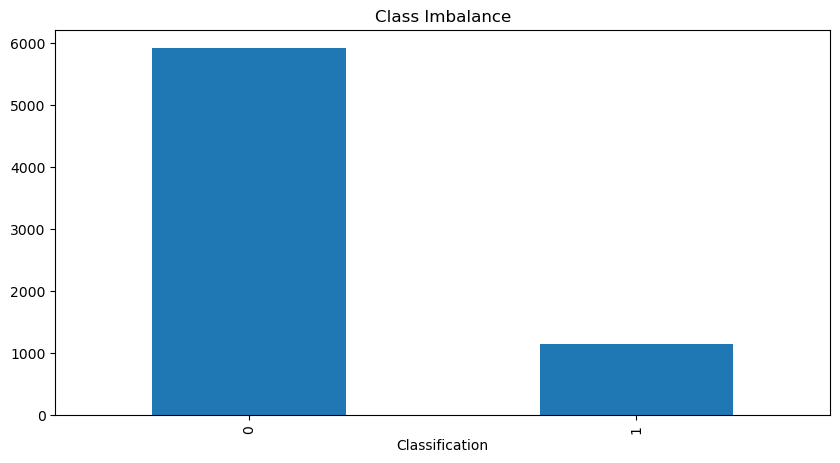

In [60]:
input_df['Classification'].value_counts().plot(kind='bar',figsize=(10,5),title='Class Imbalance')

In [61]:
input_df

21 CFR 211.100(a)  21 CFR 211.100(a)(0)  21 CFR 211.100(b)  \
InspectionID                                                               
541807                 0.000000                   0.0           0.000000   
542388                 0.000000                   0.0           0.000000   
542411                 0.000000                   0.0           0.000000   
543628                 0.000000                   0.0           0.000000   
544056                 0.000000                   0.0           0.000000   
...                         ...                   ...                ...   
1258228                0.000000                   0.0           0.000000   
1258326                0.000000                   0.0           0.162234   
1258459                0.000000                   0.0           0.000000   
1259242                0.274557                   0.0           0.000000   
1259408                0.000000                   0.0           0.000000   

              21 CFR 211.101(a)  21 CFR 211.101(a)(0)  21 CFR 211.101(b)  \
InspectionID                                                               
541807                      0.0                   0.0               0.00   
542388                      0.0                   0.0               0.00   
542411                      0.0                   0.0               0.00   
543628                      0.0                   0.0               0.00   
544056                      0.0                   0.0               0.25   
...                         ...                   ...                ...   
1258228                     0.0                   0.0               0.00   
1258326                     0.0                   0.0               0.00   
1258459                     0.0                   0.0               0.00   
1259242                     0.0                   0.0               0.00   
1259408                     0.0                   0.0               0.00   

              21 CFR 211.101(b)(1)  21 CFR 211.101(b)(4)  21 CFR 211.101(c)  \
InspectionID                                                                  
541807                         0.0                   0.0                0.0   
542388                         0.0                   0.0                0.0   
542411                         0.0                   0.0                0.0   
543628                         0.0                   0.0                0.0   
544056                         0.0                   0.0                0.0   
...                            ...                   ...                ...   
1258228                        0.0                   0.0                0.0   
1258326                        0.0                   0.0                0.0   
1258459                        0.0                   0.0                0.0   
1259242                        0.0                   0.0                0.0   
1259408                        0.0                   0.0                0.0   

              21 CFR 211.101(c)(1)  ...  FDCA 760(b)(1)  FDCA 760(c)(1)  \
InspectionID                        ...                                   
541807                         0.0  ...             0.0             0.0   
542388                         0.0  ...             0.0             0.0   
542411                         0.0  ...             0.0             0.0   
543628                         0.0  ...             0.0             0.0   
544056                         0.0  ...             0.0             0.0   
...                            ...  ...             ...             ...   
1258228                        0.0  ...             0.0             0.0   
1258326                        0.0  ...             0.0             0.0   
1258459                        0.0  ...             0.0             0.0   
1259242                        0.0  ...             0.0             0.0   
1259408                        0.0  ...             0.0             0.0   

              FDCA 760(c)(2)  FD

# Citation Score

In [507]:
citation_score['ScoreBins'] = pd.cut(citation_score['CitationScore'],bins=[0,1,2,3,4,5,100])

<Axes: xlabel='ScoreBins'>

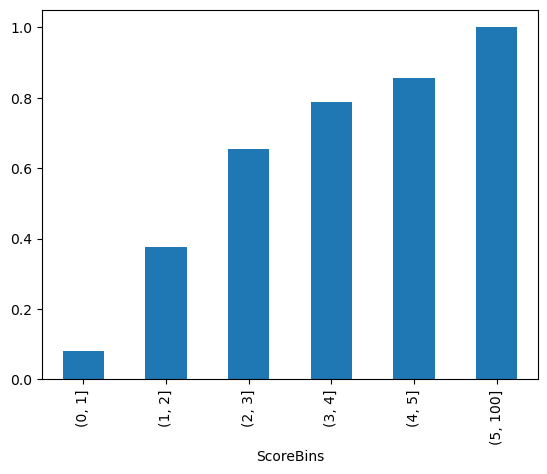

In [508]:
 ((citation_score[citation_score.Classification == 1]['ScoreBins'].value_counts().sort_index() )/(citation_score['ScoreBins'].value_counts().sort_index() ) ).plot(kind='bar')

In [506]:
citation_score['CitationScore'].mean(),citation_score['CitationScore'].std()

(1.197523849398294, 0.9714847609031306)

In [494]:
citation_score[citation_score.Classification == 1]['CitationScore'].mean(),citation_score[citation_score.Classification == 0]['CitationScore'].mean()

(2.0597638771117928, 0.8635192912945389)

In [495]:
citation_score[citation_score.Classification == 1]['CitationScore'].std(),citation_score[citation_score.Classification == 0]['CitationScore'].std()

(1.0717312374865913, 0.6823447699495722)

In [496]:
citation_score[citation_score.Classification == 1]['CitationScore'].median(),citation_score[citation_score.Classification == 0]['CitationScore'].median()

(1.8510890014709331, 0.6941541211982475)

<Axes: xlabel='ScoreBins'>

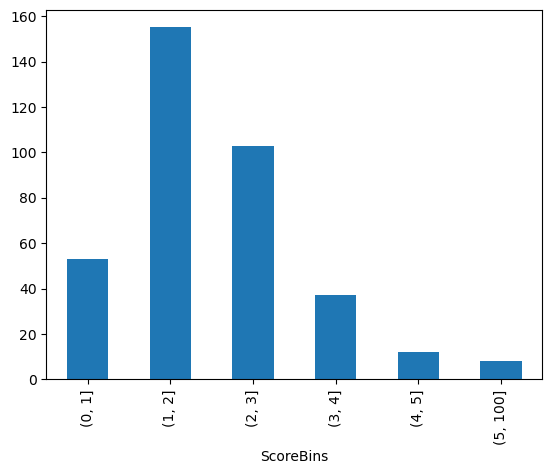

In [509]:
 (citation_score[citation_score.Classification == 1]['ScoreBins'].value_counts().sort_index() ).plot(kind='bar')

In [510]:
citation_score.groupby('Classification')['ScoreBins'].value_counts().sort_index().reset_index()

Classification ScoreBins  count
0                0    (0, 1]    610
1                0    (1, 2]    257
2                0    (2, 3]     54
3                0    (3, 4]     10
4                0    (4, 5]      2
5                0  (5, 100]      0
6                1    (0, 1]     53
7                1    (1, 2]    155
8                1    (2, 3]    103
9                1    (3, 4]     37
10               1    (4, 5]     12
11               1  (5, 100]      8

<Axes: xlabel='ScoreBins'>

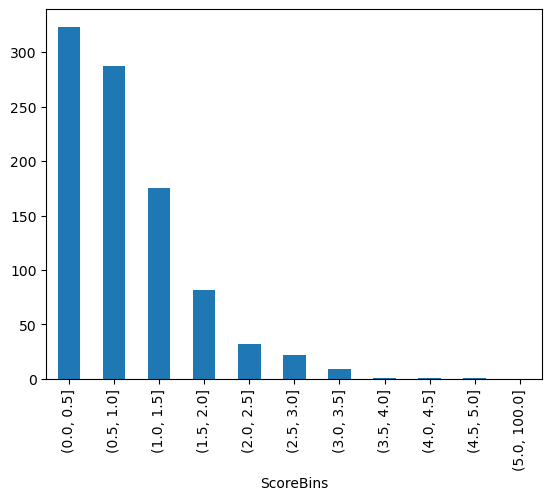

In [503]:
 (citation_score[citation_score.Classification == 0]['ScoreBins'].value_counts().sort_index() ).plot(kind='bar')

## Train/Test

In [48]:
id_test = list(set(data_trim_df[data_trim_df.InspectionEndDate > pd.to_datetime('2024-01-01')]['InspectionID'].unique()) - set([1238442]))
id_train =  list(data_trim_df[(data_trim_df.InspectionEndDate <= pd.to_datetime('2024-01-01')) & (data_trim_df.InspectionEndDate >= pd.to_datetime('2017-01-01'))]['InspectionID'].unique())
input_trim_df = input_df.loc[id_train+id_test]

<Axes: xlabel='Classification'>

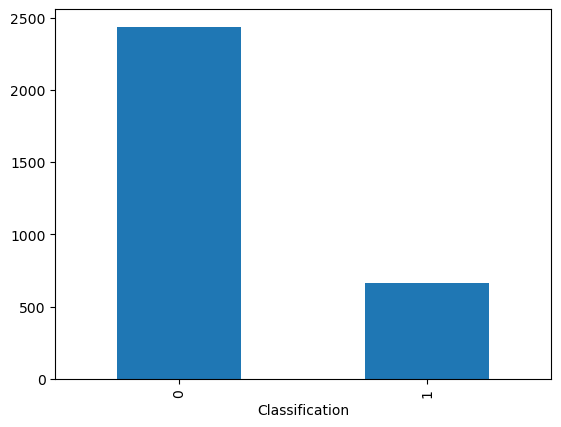

In [49]:
input_trim_df['Classification'].value_counts().plot(kind='bar')

### Downsampled

In [50]:
input_trim_df = input_trim_df[['Classification']+top_200_features]

In [51]:
X_train, X_test, y_train, y_test = input_trim_df.drop('Classification',axis=1).loc[id_train],input_trim_df.drop('Classification',axis=1).loc[id_test], input_trim_df[['Classification']].loc[id_train], input_trim_df[['Classification']].loc[id_test]

In [52]:
num_oais = len(y_train[y_train.Classification == 1])
non_oais_df = X_train.loc[y_train[y_train.Classification == 0].index]
non_oais_list = list(non_oais_df.sample(n =int(np.ceil(1* num_oais)), random_state = 1).index)
oais_list = list(y_train[y_train.Classification == 1].index)
X_ds_train, y_ds_train = X_train.loc[oais_list+non_oais_list], y_train.loc[oais_list+non_oais_list]

In [ ]:
#id_s_train, id_s_test = list(set(id_train).intersection(set(input_sample_df.index))), list(set(id_test).intersection(set(input_sample_df.index)))
#X_train, X_test, y_train, y_test = input_sample_df.drop('Classification',axis=1).loc[id_s_train],input_sample_df.drop('Classification',axis=1).loc[id_s_test], input_sample_df['Classification'].loc[id_s_train], input_sample_df['Classification'].loc[id_s_test]

In [ ]:
#rest_list = list(set(input_trim_df.index) - set(oais_list+non_oais_list))
#X_rest, y_rest = input_trim_df.drop('Classification',axis=1).loc[rest_list], input_trim_df['Classification'].loc[rest_list]

In [440]:
X_test[X_test.CitationScore > 0]

FDCA 501(a)(2)(A)  21 CFR 211.170(a)  21 CFR 211.198(b)(2)  \
InspectionID                                                               
1245209                     0.0                0.0                   0.0   
1228830                     0.0                0.0                   0.0   
1240100                     0.0                0.0                   0.0   
1255462                     0.0                0.0                   0.0   
1249319                     0.0                0.0                   0.0   
...                         ...                ...                   ...   
1256416                     0.0                0.0                   0.0   
1247201                     0.0                0.0                   0.0   
1230818                     0.0                0.0                   0.0   
1249263                     0.0                0.0                   0.0   
1251315                     0.0                0.0                   0.0   

              21 CFR 211.46(d)  21 CFR 211.180(b)  21 CFR 211.94(c)  \
InspectionID                                                          
1245209                    0.0                0.0               0.0   
1228830                    0.0                0.0               0.0   
1240100                    0.0                0.0               0.0   
1255462                    0.0                0.0               0.0   
1249319                    0.0                0.0               0.0   
...                        ...                ...               ...   
1256416                    0.0                0.0               0.0   
1247201                    0.0                0.0               0.0   
1230818                    0.0                0.0               0.0   
1249263                    0.0                0.0               0.0   
1251315                    0.0                0.0               0.0   

              21 CFR 211.150(b)  21 CFR 211.134(a)  21 CFR 211.180(e)(2)  \
InspectionID                                                               
1245209                     0.0                0.0                   0.0   
1228830                     0.0                0.0                   0.0   
1240100                     0.0                0.0                   0.0   
1255462                     0.0                0.0                   0.0   
1249319                     0.0                0.0                   0.0   
...                         ...                ...                   ...   
1256416                     0.0                0.0                   0.0   
1247201                     0.0                0.0                   0.0   
1230818                     0.0                0.0                   0.0   
1249263                     0.0                0.0                   0.0   
1251315                     0.0                0.0                   0.0   

              21 CFR 211.142  ...  21 CFR 211.188(0)  21 CFR 211.68(a)(1)  \
InspectionID                  ...                                           
1245209                  0.0  ...                0.0                  0.0   
1228830                  0.0  ...                0.0                  0.0   
1240100                  0.0  ...                0.0                  0.0   
1255462                  0.0  ...                0.0                  0.0   
1249319                  0.0  ...                0.0                  0.0   
...                      ...  ...                ...                  ...   
1256416                  0.0  ...                0.0                  0.0   
1247201                  0.0  ...                0.0                  0.0   
1230818                  0.0  ...                0.0                  0.0   
1249263                  0.0  ...                0.0                  0.0   
1251315                  0.0  ...                0.0                  0.0   

              21 CFR 211.28(a)  21 CFR 211.130(d)(0)  21 CFR 211.166(a)  \
InspectionID                       

# Models

In [53]:
acc_list, f1_list, rec_list, prec_list, false_pos_list, model_name_list = [],[],[],[],[],[]

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, precision_score, recall_score, accuracy_score, f1_score

In [55]:
def make_results(y, y_pred):
    conf_mat = confusion_matrix(y,y_pred)
    fig, ax = plt.subplots(figsize=(15, 5))
    disp = ConfusionMatrixDisplay(conf_mat, display_labels = ['VAI','OAI'])
    disp.plot(cmap=plt.cm.BuPu,ax=ax)
    prec, rec, acc, f1 = precision_score(y,y_pred), recall_score(y,y_pred), accuracy_score(y,y_pred), f1_score(y,y_pred)
    print('Accuracy:',acc)
    print('F1:',f1)
    print('Recall:',rec)
    print('Precision:',prec)
    return acc, f1, rec, prec


## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#logreg = LogisticRegression(penalty='elasticnet',max_iter=10000,solver='saga', l1_ratio = 0.9)
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_ds_train,y_ds_train)
y_train_pred = logreg.predict(X_ds_train)
y_test_pred = logreg.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7951807228915663
F1: 0.7934027777777778
Recall: 0.7865748709122203
Precision: 0.8003502626970228


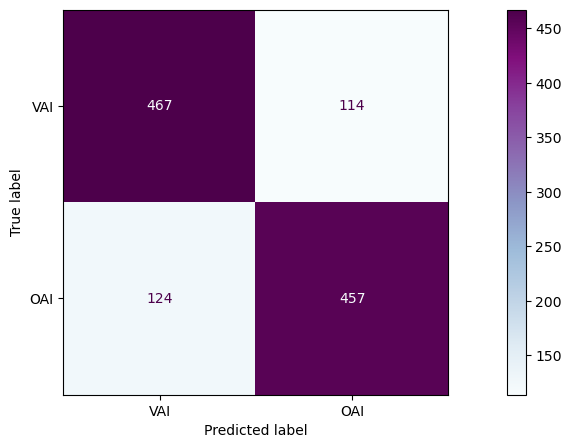

In [58]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7569060773480663
F1: 0.6140350877192983
Recall: 0.8860759493670886
Precision: 0.4697986577181208


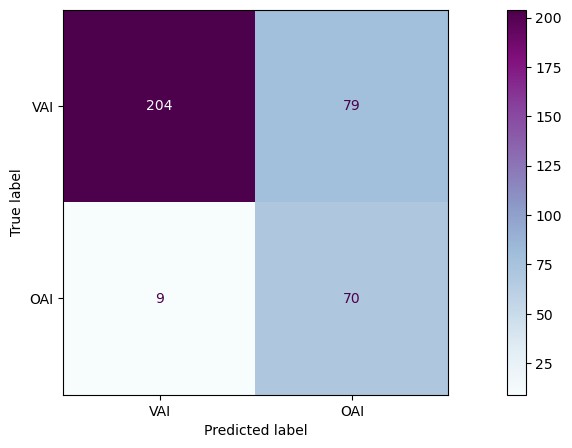

In [59]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('LogReg')

(0.0, 1.0)

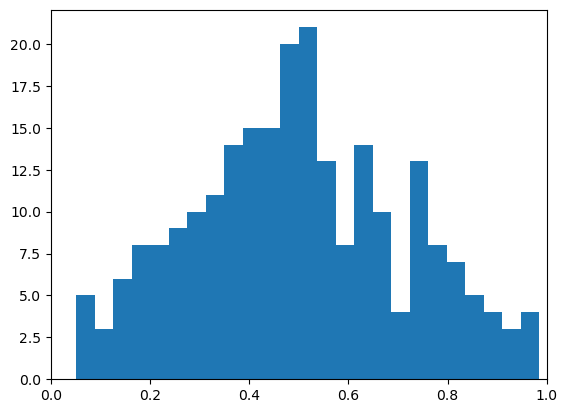

In [60]:
logreg_df = pd.DataFrame(data = zip(y_ds_train['Classification'].values,y_train_pred),columns = ['Y','YPred'])
logreg_df[['VAIProb','OAIProb']] = logreg.predict_proba(X_ds_train)
logreg_miss_df = logreg_df[logreg_df.Y!=logreg_df.YPred]['OAIProb']
plt.hist(logreg_miss_df,bins=25)
plt.xlim([0,1])

## RFC

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [1232]:
parameters ={ 'max_depth':[None,10,20,50,100],
              'bootstrap':[True,False],
              'criterion' : ['gini','entropy'],
              'max_features' : ['sqrt','log2',None]}

In [1817]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
grid_search.fit(X_ds_train,y_ds_train)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['log2', 5, 20, None]})

In [1818]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'log2'}

In [65]:
rfc = RandomForestClassifier(n_estimators=500,
                                bootstrap=True,
                                criterion='gini',
                                max_depth=10,
                                max_features = 'log2',
                                class_weight={0:1,1:1.})
rfc.fit(X_ds_train,y_ds_train)
y_train_pred = rfc.predict(X_ds_train)
y_test_pred = rfc.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8330464716006885
F1: 0.8310104529616724
Recall: 0.8209982788296041
Precision: 0.8412698412698413


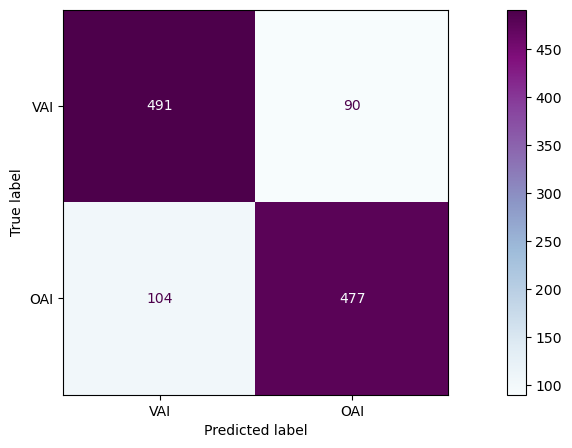

In [66]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.8121546961325967
F1: 0.6730769230769231
Recall: 0.8860759493670886
Precision: 0.5426356589147286


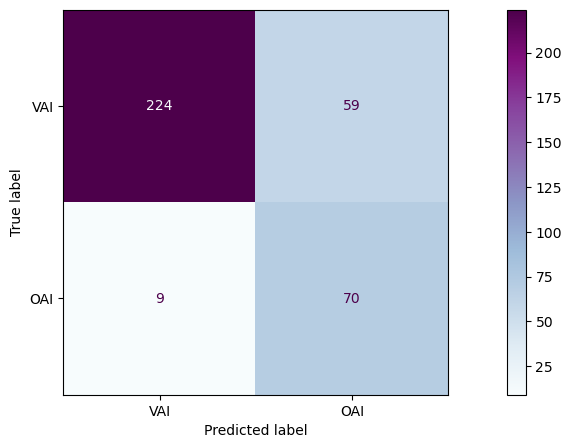

In [67]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('RFC')

In [580]:
222/(222+61)

0.784452296819788

In [158]:
from xgboost import XGBClassifier

In [159]:
xgb =XGBClassifier(max_depth = 10, reg_lambda = 500)
xgb.fit(X_ds_train,y_ds_train)
y_train_pred = xgb.predict(X_ds_train)
y_test_pred = xgb.predict(X_test)

Accuracy: 0.8287435456110155
F1: 0.8348547717842324
Recall: 0.8657487091222031
Precision: 0.8060897435897436


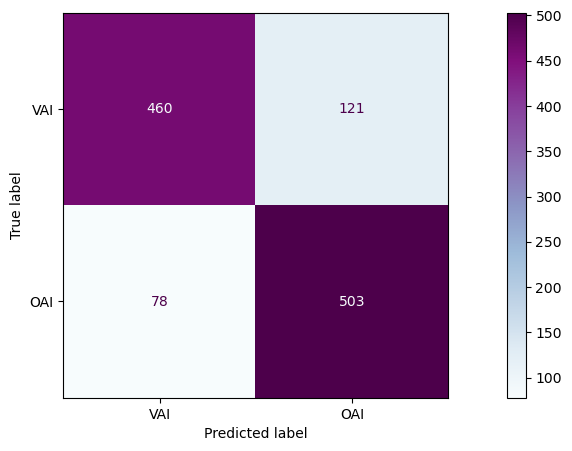

In [160]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7596685082872928
F1: 0.6167400881057269
Recall: 0.8860759493670886
Precision: 0.47297297297297297


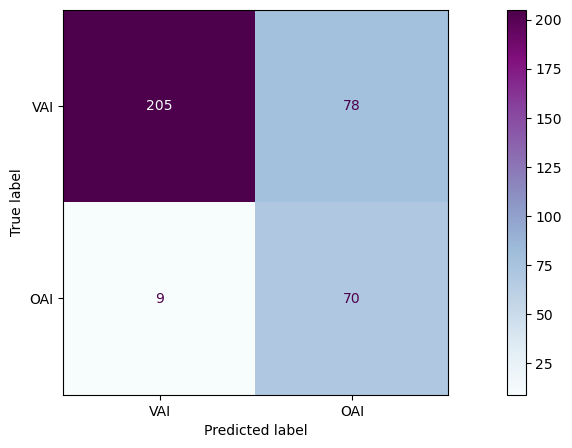

In [161]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('XGB')

## SVC

In [162]:
from sklearn.svm import SVC

In [2279]:
parameters ={ 'C':[1e-4,1e-3,1e-2,1e-1,1,10],
              'shrinking':[True,False],
              'tol': [1e-5,1e-4,1e-3,1e-2,1e-1],
              'kernel':['sigmoid']}
grid_search = GridSearchCV(SVC(),parameters,cv=5)
grid_search.fit(X_ds_train,y_ds_train)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['sigmoid'], 'shrinking': [True, False],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [2280]:
grid_search.best_params_

{'C': 0.01, 'kernel': 'sigmoid', 'shrinking': True, 'tol': 0.01}

In [316]:
svc = SVC(kernel='sigmoid',
          C=0.01,
          shrinking=True,
          tol = 1e-2,
          probability=True)
svc.fit(X_ds_train,y_ds_train)
y_train_pred = svc.predict(X_ds_train)
y_test_pred = svc.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7555938037865749
F1: 0.7432188065099458
Recall: 0.7074010327022375
Precision: 0.7828571428571428


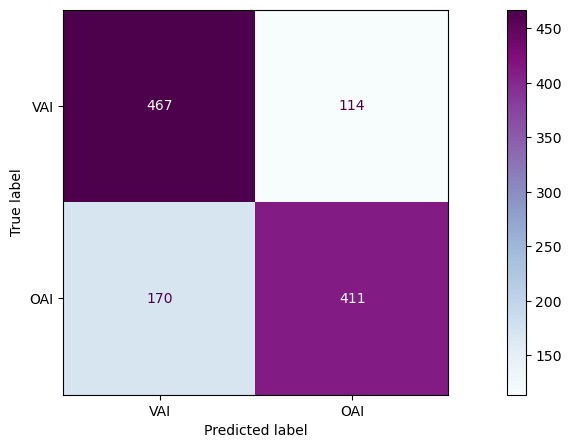

In [317]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.8232044198895028
F1: 0.6666666666666666
Recall: 0.810126582278481
Precision: 0.5663716814159292


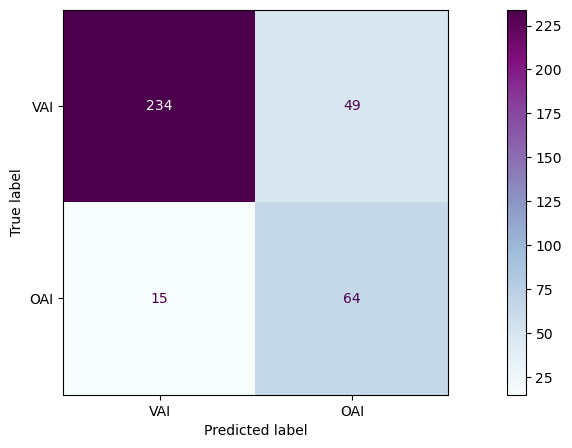

In [318]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('SVC')

## KNeighbors

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [2194]:
acc_knn_list = []
for n in range(2,100,2):
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(X_ds_train,y_ds_train)
    y_train_pred = kn.predict(X_ds_train)
    y_test_pred = kn.predict(X_test)
    acc_knn_list.append(accuracy_score(y_ds_train,y_train_pred))

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarnin

([<matplotlib.axis.XTick at 0x1ffd3c69990>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24'),
  Text(26, 0, '26'),
  Text(28, 0, '28'),
  Text(30, 0, '30'),
  Text(32, 0, '32'),
  Text(34, 0, '34'),
  Text(36, 0, '36'),
  Text(38, 0, '38'),
  Text(40, 0, '40'),
  Text(42, 0, '42'),
  Text(44, 0, '44'),
  Text(46, 0, '46'),
  Text(48, 0, '48'),
  Text(50, 0, '50'),
  Text(52, 0, '52'),
  Text(54, 0, '54'),
  Text(56, 0, '56'),
  Text(58, 0, '58'),
  Text(60, 0, '60'),
  Text(62, 0, '62'),
  Text(64, 0, '64'),
  Text(66, 0, '66'),
  Text(68, 0, '68'),
  Text(70, 0, '70'),
  Text(72, 0, '72'),
  Text(74, 0, '74'),
  Text(76, 0, '76'),
  Text(78, 0, '78'),
  Text(80, 0, '80'),
  Text(82, 0, '82'),
  Text(84, 0, '84'),
  Text(86, 0, '86'),
  Text(88, 0, '88'),
  Text(90, 0, '90'),
  Text(92, 0, '92')

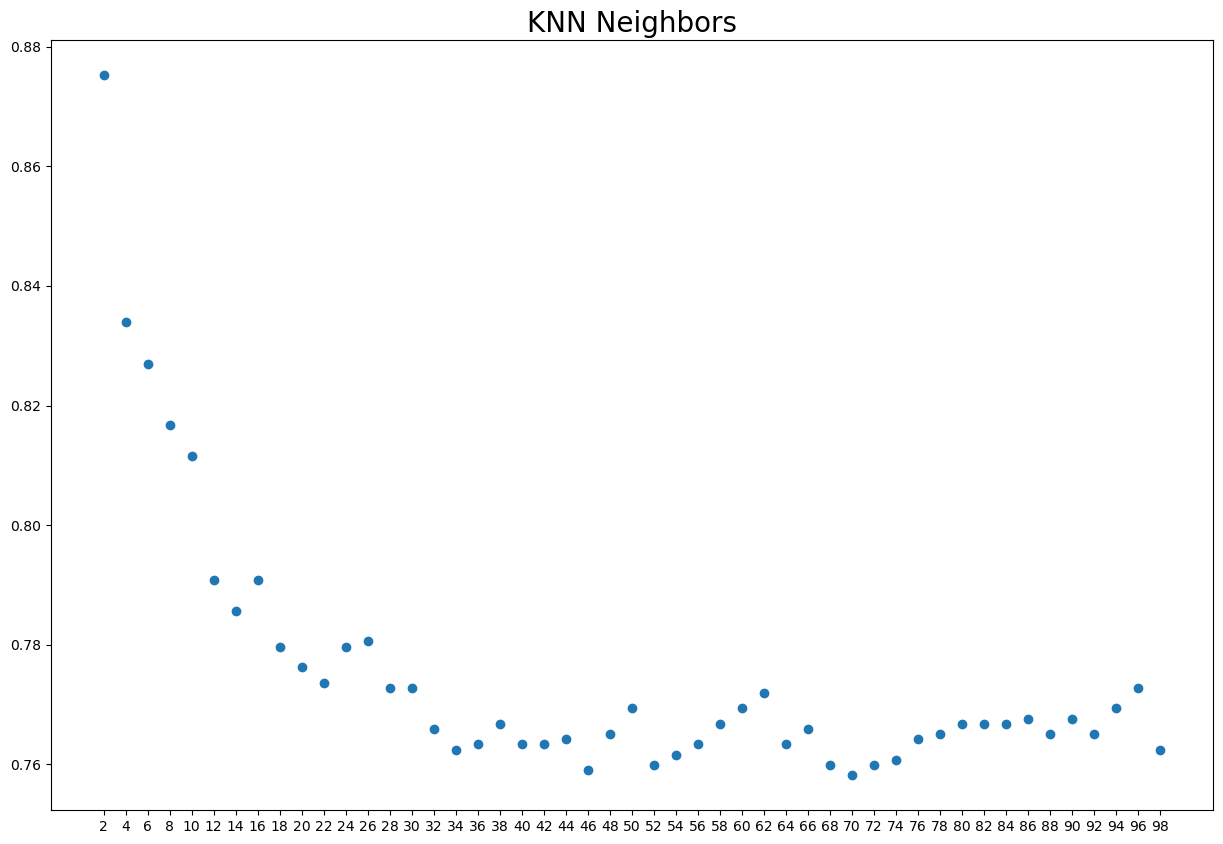

In [2195]:
plt.figure(figsize=(15,10))
plt.title('KNN Neighbors',fontsize=20)
plt.scatter(x=range(2,100,2),y=acc_knn_list)
plt.xticks(ticks=range(2,100,2))

In [313]:
kn = KNeighborsClassifier(n_neighbors=22)
kn.fit(X_ds_train,y_ds_train)
y_train_pred = kn.predict(X_ds_train)
y_test_pred = kn.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7736660929432013
F1: 0.7730802415875755
Recall: 0.7710843373493976
Precision: 0.7750865051903114


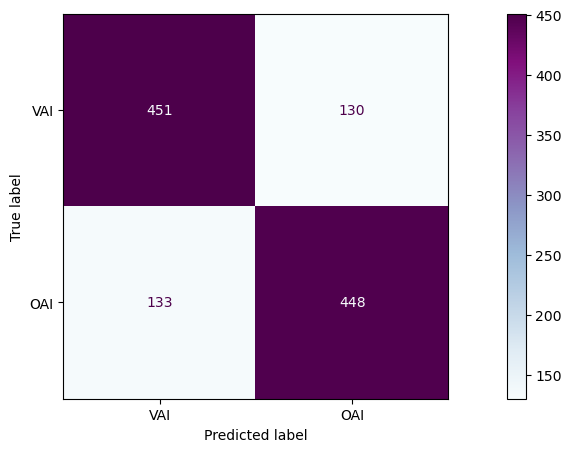

In [314]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7707182320441989
F1: 0.6175115207373272
Recall: 0.8481012658227848
Precision: 0.4855072463768116


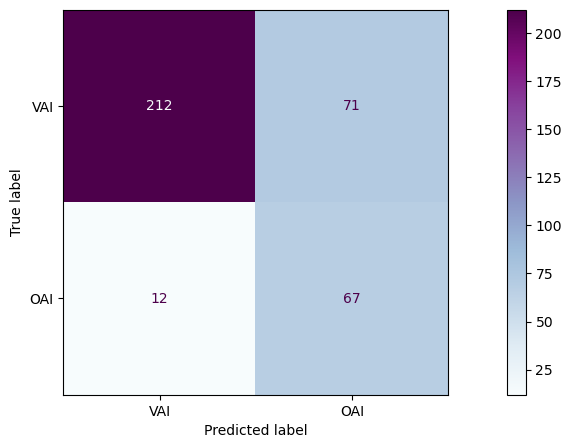

In [315]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('KNN')

## NB

In [170]:
from sklearn.naive_bayes import GaussianNB

In [2199]:
gnb = GaussianNB()
gnb.fit(X_ds_train,y_ds_train)
y_train_pred = gnb.predict(X_ds_train)
y_test_pred = gnb.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6333907056798623
F1: 0.4481865284974093
Recall: 0.2977624784853701
Precision: 0.9057591623036649


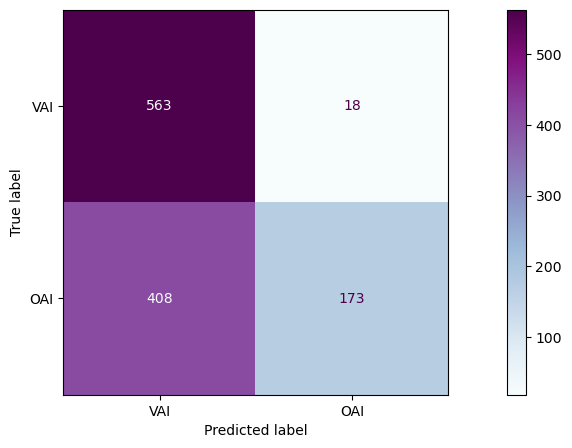

In [2200]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7928176795580111
F1: 0.5098039215686274
Recall: 0.4936708860759494
Precision: 0.527027027027027


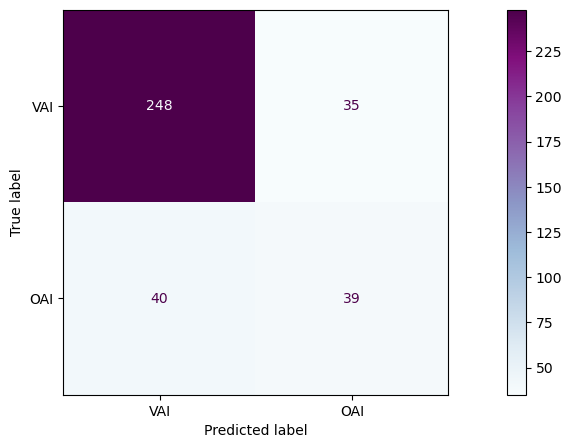

In [1866]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('NB')

## Stack

In [171]:
from sklearn.ensemble import StackingClassifier

In [172]:
estimators = [
    ('rf', rfc),
    ('knn', kn),
    ('log',logreg)
]
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [173]:
clf.fit(X_ds_train,y_ds_train)
y_train_pred = clf.predict(X_ds_train)
y_test_pred = clf.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.8184165232358004
F1: 0.8240200166805671
Recall: 0.8502581755593803
Precision: 0.7993527508090615


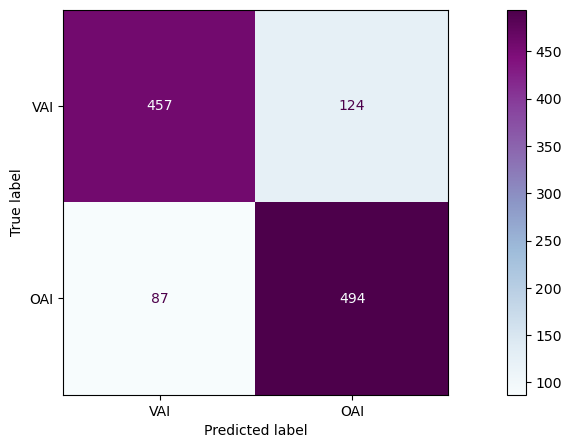

In [174]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7790055248618785
F1: 0.6396396396396397
Recall: 0.8987341772151899
Precision: 0.4965034965034965


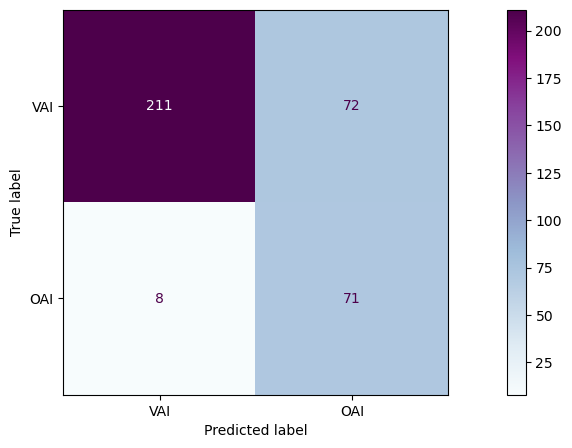

In [175]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('Stack')

## Vote

In [176]:
from sklearn.ensemble import VotingClassifier

### Hard

In [177]:
vote = VotingClassifier(estimators=estimators,voting='hard')
vote.fit(X_ds_train,y_ds_train)
y_train_pred = vote.predict(X_ds_train)
y_test_pred = vote.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.8080895008605852
F1: 0.8089117395029991
Recall: 0.8123924268502581
Precision: 0.8054607508532423


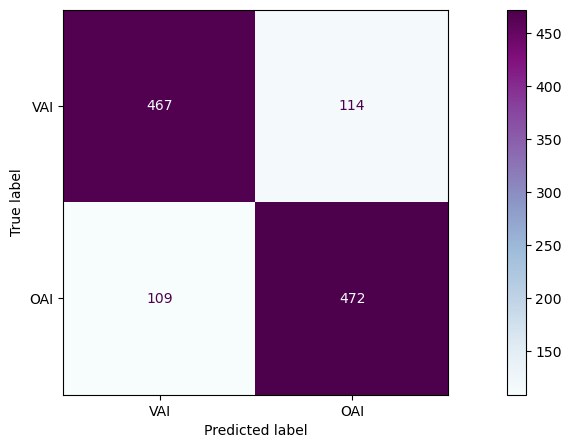

In [178]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7845303867403315
F1: 0.6388888888888888
Recall: 0.8734177215189873
Precision: 0.5036496350364964


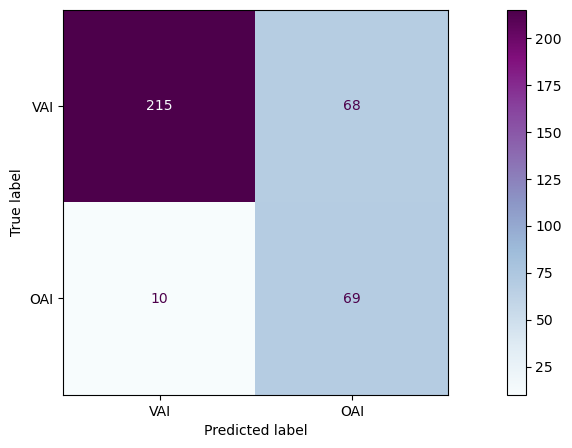

In [179]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('VoteHard')

### Soft

In [180]:
vote = VotingClassifier(estimators=estimators,voting='soft')
vote.fit(X_ds_train,y_ds_train)
y_train_pred = vote.predict(X_ds_train)
y_test_pred = vote.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.8072289156626506
F1: 0.8091993185689949
Recall: 0.8175559380378657
Precision: 0.8010118043844857


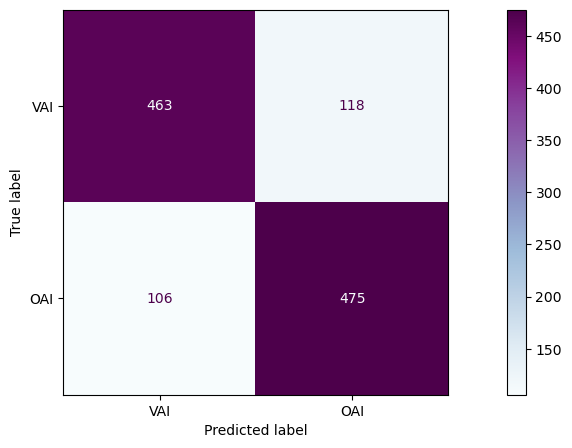

In [181]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7845303867403315
F1: 0.6422018348623854
Recall: 0.8860759493670886
Precision: 0.5035971223021583


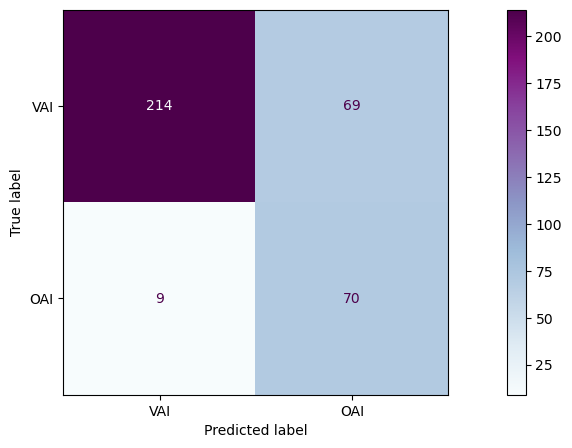

In [182]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('VoteSoft')

(0.0, 1.0)

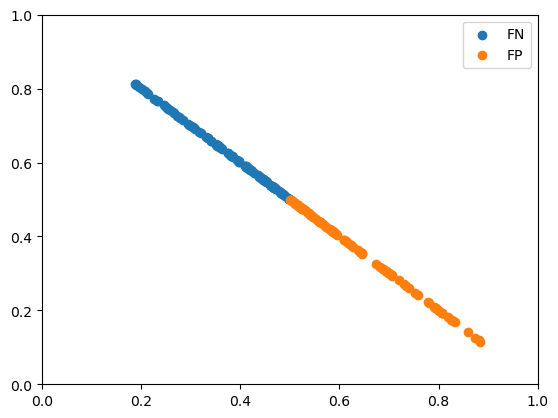

In [2310]:
vote_df = pd.DataFrame(data = zip(y_ds_train['Classification'].values,y_train_pred),columns = ['Y','YPred'])
vote_df[['VAIProb','OAIProb']] = vote.predict_proba(X_ds_train)
fn = vote_df[(vote_df.Y < vote_df.YPred )]
plt.scatter(fn['VAIProb'], fn['OAIProb'],label = 'FN')

fp = vote_df[(vote_df.Y > vote_df.YPred )]
plt.scatter(fp['VAIProb'], fp['OAIProb'],label='FP')

plt.legend(loc = 'upper right')

plt.ylim([0,1])
plt.xlim([0,1])

## NN

In [183]:
import keras
from keras import layers

In [184]:
X_nn_train = X_ds_train

In [185]:
nn = keras.Sequential([layers.Flatten(input_shape = (X_nn_train.shape[1],)),
                        layers.Dense(X_train.shape[1],activation='relu'),
                        #layers.Dropout(0.2),
                        layers.Dense(50,activation='relu'),
                        layers.Dropout(0.1),
                        layers.Dense(10,activation='relu'),
                       layers.Dense(1,activation='sigmoid')])

In [186]:
nn.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

In [187]:
history = nn.fit(X_nn_train, y_ds_train, epochs=50, batch_size=10,validation_split=0.1,class_weight = {0: 1,1: 1.})

Epoch 1/50
105/105 [==============================] - 2s 6ms/step - loss: 0.6759 - accuracy: 0.6536 - val_loss: 0.6293 - val_accuracy: 0.7265
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7560 - val_loss: 0.5725 - val_accuracy: 0.7009
Epoch 3/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5557 - accuracy: 0.7569 - val_loss: 0.5257 - val_accuracy: 0.6923
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7656 - val_loss: 0.5222 - val_accuracy: 0.6923
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.7684 - val_loss: 0.5189 - val_accuracy: 0.6923
Epoch 6/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7656 - val_loss: 0.5378 - val_accuracy: 0.6838
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7742 - val_loss: 0.5100 - val_accuracy: 0.6838
Epoch 

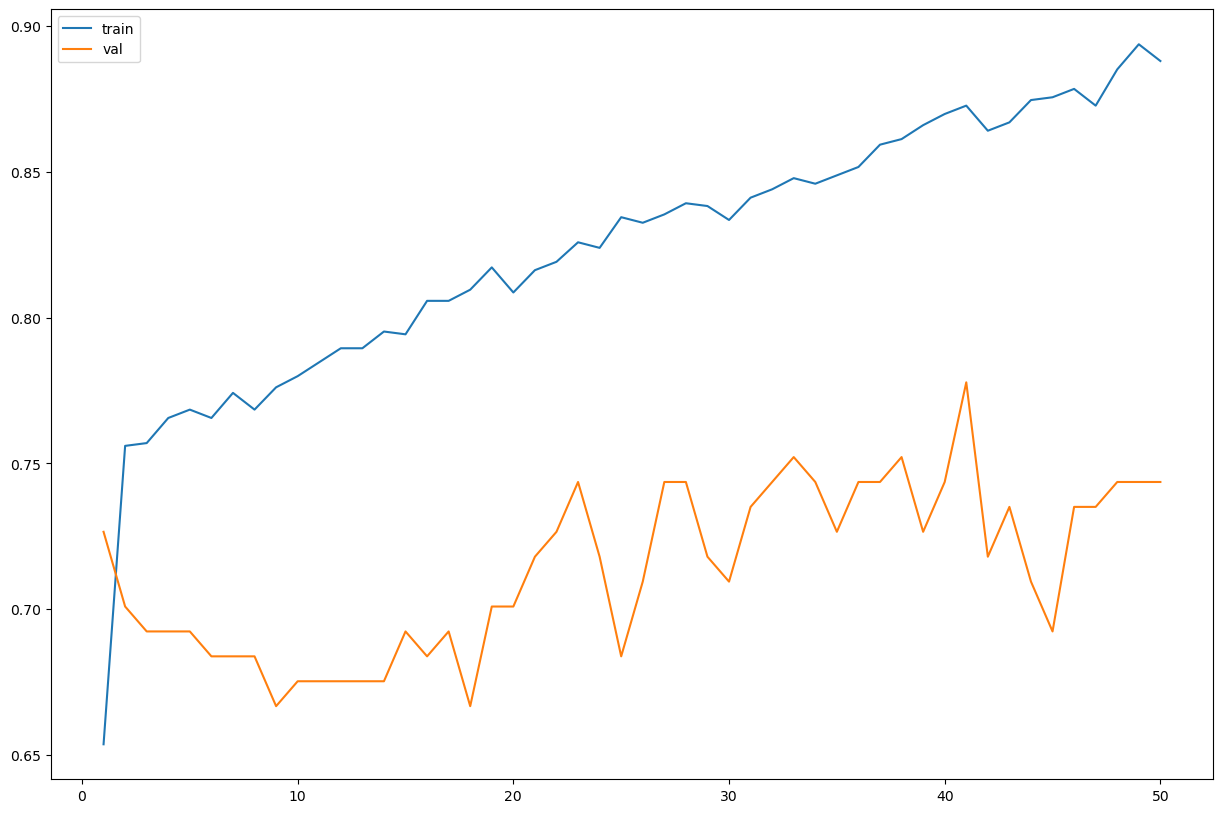

In [188]:
plt.figure(figsize=(15,10))
plt.plot(range(1,51),history.history['accuracy'],label='train')
plt.plot(range(1,51),history.history['val_accuracy'],label='val')
plt.legend(loc= 'upper left')

In [189]:
y_test_pred = []
y_test_prob = nn.predict(X_nn_train)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

37/37 [==============================] - 0s 800us/step


Accuracy: 0.8760757314974182
F1: 0.8801996672212978
Recall: 0.9104991394148021
Precision: 0.8518518518518519


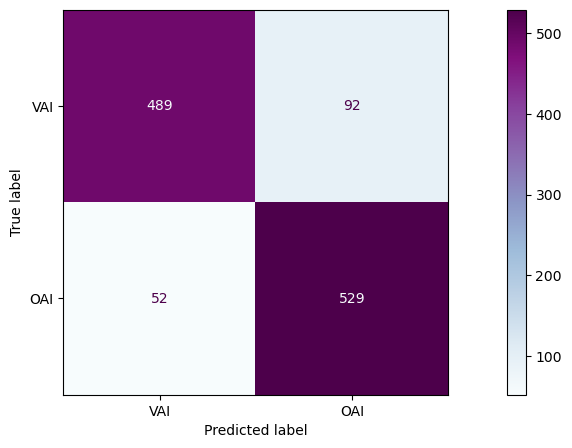

In [190]:
acc, f1, rec, prec = make_results(y_ds_train,y_test_pred)

In [191]:
y_test_pred = []
y_test_prob = nn.predict(X_test)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

12/12 [==============================] - 0s 815us/step


Accuracy: 0.7265193370165746
F1: 0.5857740585774058
Recall: 0.8860759493670886
Precision: 0.4375


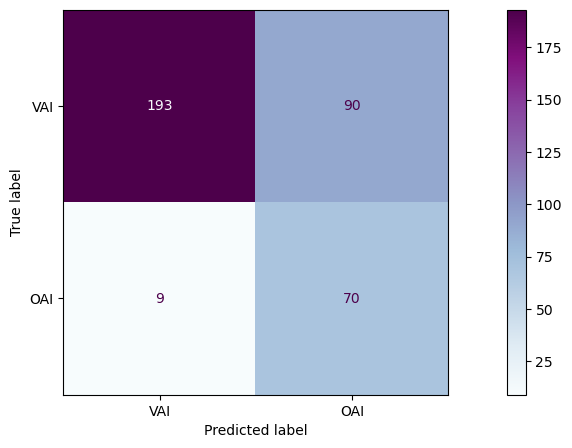

In [192]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)
acc_list.append(acc); f1_list.append(f1); rec_list.append(rec); prec_list.append(prec); model_name_list.append('NN')

## Hybrid

In [ ]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
      #  self.y_columns = None  # store column names from fit method

    def fit(self, X_1, X_2, y):
        self.model_1.fit(X_1, y)#X_1 is the trend col & y in our example are the family sales col
        y_fit = self.model_1.predict_proba(X_1)[:,1]
        print(y_fit.shape)

        #compute residuals
        y_resid = y - y_fit #difference between Trend(X_1) & Actual Y(family sales)
        y_resid = y_resid

        #fit model_2 on residuals 
        self.model_2.fit(X_2, y_resid) #X_2 on-promotion col

        # Save column names for predict method
       # self.y_columns = y.columns

    def predict(self, X_1, X_2):
        y_pred = self.model_1.predict(X_1)
        y_pred = y_pred

        #model_2 predictions to y_pred
        y_pred += self.model_2.predict(X_2)
        return y_pred

## Summary

In [193]:
results_df = pd.DataFrame(data = zip(acc_list, f1_list, rec_list, prec_list),
                          columns = ['Accuracy','F1','Recall','Precision'],
                          index = model_name_list)

In [194]:
results_df.sort_values(by='F1',ascending=False)

Accuracy        F1    Recall  Precision
SVC       0.823204  0.666667  0.810127   0.566372
RFC       0.803867  0.663507  0.886076   0.530303
VoteSoft  0.784530  0.642202  0.886076   0.503597
Stack     0.779006  0.639640  0.898734   0.496503
VoteHard  0.784530  0.638889  0.873418   0.503650
KNN       0.770718  0.617512  0.848101   0.485507
XGB       0.759669  0.616740  0.886076   0.472973
LogReg    0.756906  0.614035  0.886076   0.469799
NN        0.726519  0.585774  0.886076   0.437500

In [195]:
lr_coefs = pd.DataFrame(data = abs(logreg.coef_.T), 
             index = X_train.columns, 
             columns = ['Abs'])/np.sum(abs(logreg.coef_))
lr_coefs.sort_values(by='Abs',ascending=False).head(20)

Abs
CitationScore              0.039984
21 CFR 211.42(c)(10)(iii)  0.024774
21 CFR 211.22(a)           0.022849
21 CFR 211.192             0.021805
21 CFR 211.42(c)(10)(v)    0.021603
21 CFR 211.113(b)          0.019071
21 CFR 211.67(b)           0.018192
21 CFR 211.22(d)           0.017902
21 CFR 211.94(c)           0.017858
Year                       0.017470
21 CFR 211.113(b)(1)       0.016874
21 CFR 211.182             0.016537
21 CFR 211.198(a)          0.015648
21 CFR 211.100(a)          0.015447
21 CFR 211.194(a)          0.015162
FDCA 501(a)(2)(A)          0.014273
21 CFR 211.194(a)(2)       0.013867
ActCFRNumber               0.013742
21 CFR 211.22(c)           0.012482
21 CFR 211.80(b)           0.012474

In [196]:
rfc_coefs = pd.DataFrame(data = abs(rfc.feature_importances_.T), 
             index = X_train.columns, 
             columns = ['Abs'])
rfc_coefs.sort_values(by='Abs',ascending=False).head(20)

Abs
CitationScore             0.172337
CitationScore_mean        0.127199
ActCFRNumber              0.123163
21 CFR 211.165(a)         0.030525
Year                      0.027582
21 CFR 211.192            0.027258
21 CFR 211.166(a)         0.025591
21 CFR 211.100(a)         0.023951
21 CFR 211.42(c)(10)(iv)  0.022598
21 CFR 211.113(b)         0.019829
21 CFR 211.22(d)          0.017498
21 CFR 211.22(a)          0.015919
21 CFR 211.160(b)         0.015522
21 CFR 211.84(d)(2)       0.013471
21 CFR 211.137(a)         0.012846
21 CFR 211.63             0.011479
FDCA 501(a)(2)(A)         0.010795
21 CFR 211.194(a)         0.010537
21 CFR 211.84(d)(1)       0.010354
21 CFR 211.42(c)(10)(v)   0.010300

### ROS Performance

In [74]:
fei_ros = fei_ros_df['FEINumber'].unique()
ros_id = fda_cit_drugs_df[fda_cit_drugs_df['FEINumber'].isin(fei_ros)]['InspectionID'].unique()
ros_test_id = list(set(ros_id).intersection(id_test))
print(len(ros_test_id))

33


In [75]:
X_ros ,y_ros =  input_df[top_200_features].loc[ros_test_id], input_df['Classification'].loc[ros_test_id]
y_ros_pred = rfc.predict(X_ros)

Accuracy: 0.8125
F1: 0.25
Recall: 1.0
Precision: 0.14285714285714285


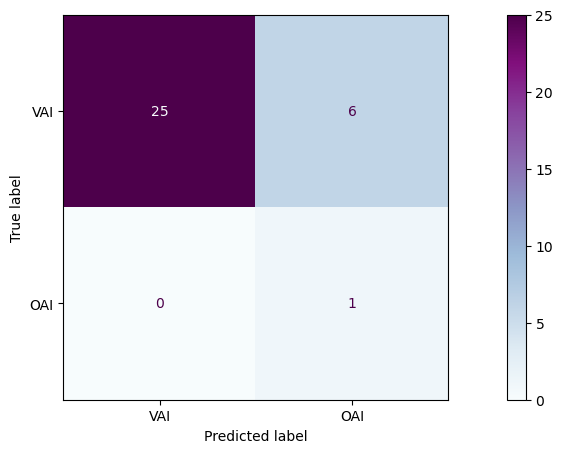

In [200]:
acc, f1, rec, prec = make_results(y_ros,y_ros_pred)

In [2380]:
ros_df = pd.DataFrame(data = zip(y_ros,y_ros_pred), columns = ['Y','YPred'],index=ros_test_id)

In [2381]:
ros_df[ros_df.Y!=ros_df.YPred]

Y  YPred
1243288  0      1
1250459  0      1
1230144  0      1
1230058  0      1
1240813  0      1
1251315  0      1

In [2385]:
X_ros.loc[1251315]

21 CFR 211.122(f)             0.000000
21 CFR 211.68(b)              0.242160
FDCA 503B(b)(2)(A)            0.000000
21 CFR 211.198(b)(2)(0)       0.000000
21 CFR 211.192(7)             0.000000
                                ...   
21 CFR 211.110(c)             0.270833
21 CFR 211.80(a)              0.000000
21 CFR 211.180(c)             0.000000
21 CFR 314.81(b)(2)(iv)(b)    0.000000
21 CFR 211.134(a)             0.000000
Name: 1251315, Length: 200, dtype: float64

## No Resampling

In [201]:
def add_thresh(y_pred,thresh):
    new = []
    for i in range(len(y_pred)):
        if y_pred[i] < thresh:
            new.append(0)
        else:
            new.append(1)
    return np.array(new)

In [202]:
from sklearn.metrics import roc_curve

### Logistic Regression

In [2399]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train,y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2405]:
fp, tp, thresh = roc_curve(y_train,logreg.predict_proba(X_train)[:,1])

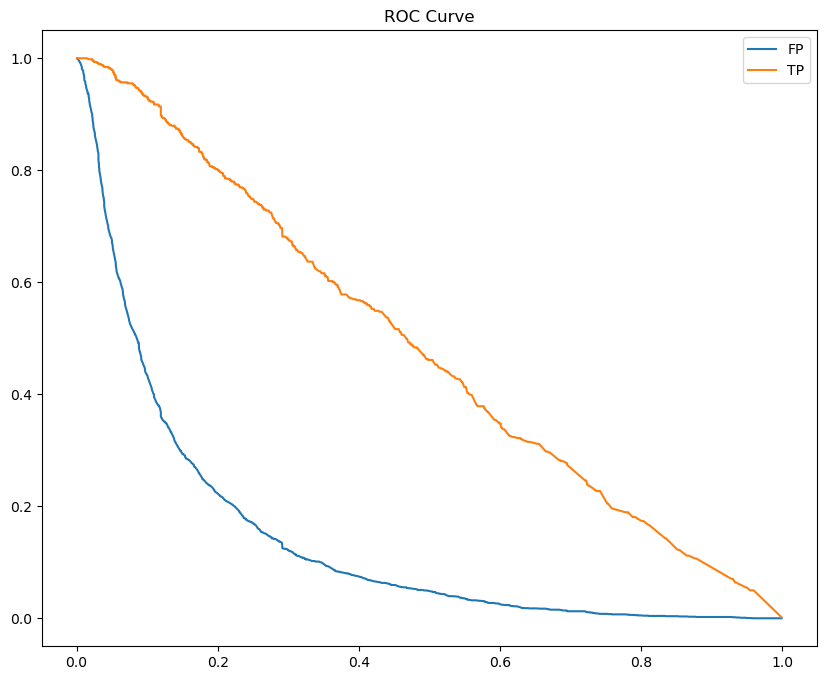

In [2406]:
plt.figure(figsize= (10,8))
plt.plot(thresh,fp,label='FP')
plt.plot(thresh,tp,label = 'TP')
plt.title('ROC Curve')
plt.legend(loc = 'upper right')

Accuracy: 0.7827359180687637
F1: 0.610236220472441
Recall: 0.8003442340791739
Precision: 0.4931071049840933


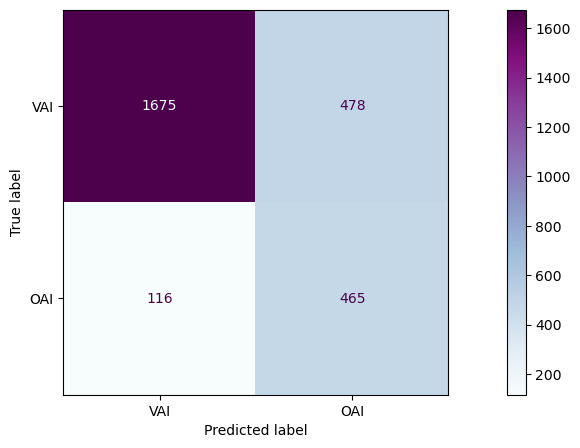

In [2408]:
acc, f1, rec, prec = make_results(y_train,add_thresh( logreg.predict_proba(X_train)[:,1],0.2))

Accuracy: 0.712707182320442
F1: 0.584
Recall: 0.9240506329113924
Precision: 0.4269005847953216


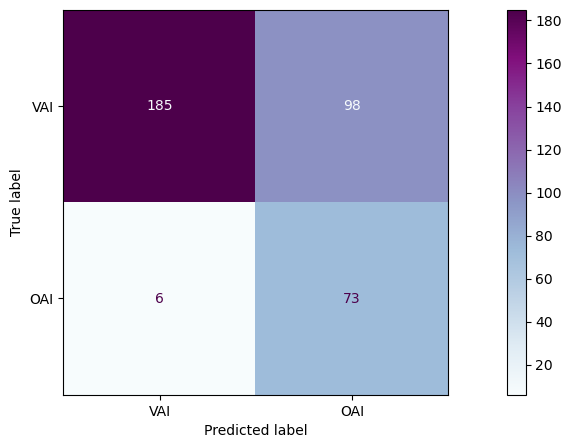

In [2409]:
acc, f1, rec, prec = make_results(y_test,add_thresh( logreg.predict_proba(X_test)[:,1],0.2))

In [2392]:
from sklearn.metrics import precision_recall_curve

In [2394]:
prec, rec, thresh = precision_recall_curve(y_train,logreg.predict_proba(X_train)[:,1])

In [2395]:
thresh = list(thresh)+[1]

Text(0.5, 1.0, 'Precision Recall Curve')

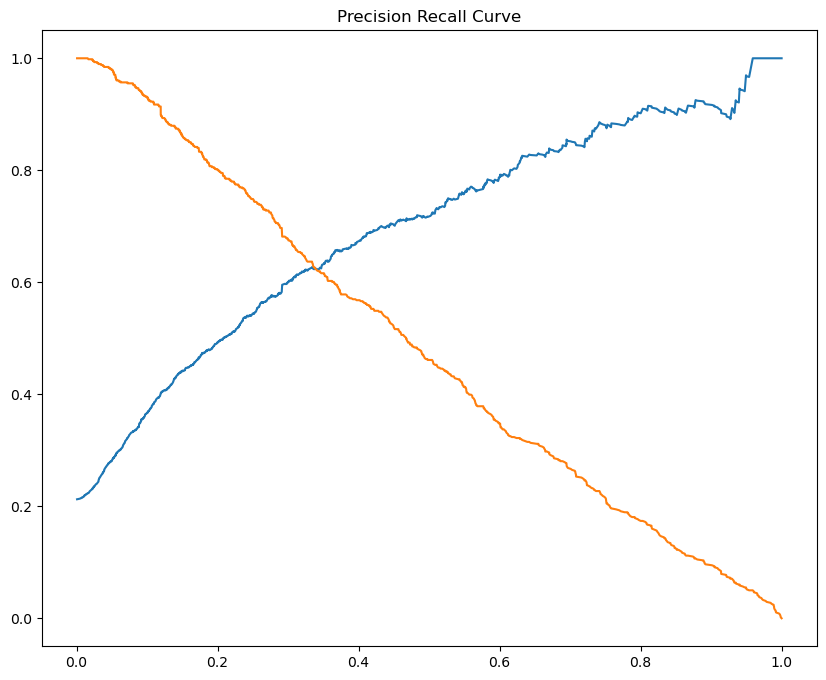

In [2396]:
plt.figure(figsize= (10,8))
plt.plot(thresh,prec)
plt.plot(thresh,rec)
plt.title('Precision Recall Curve')

In [691]:
len(thresh), len(prec)

(2416, 2417)

### XGB

In [2414]:
xgb = XGBClassifier(scale_pos_weight = 3.7,learning_rate = 0.2,max_depth = 10, reg_lambda = 500)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

Accuracy: 0.832114118507681
F1: 0.6929765886287625
Recall: 0.891566265060241
Precision: 0.5667396061269147


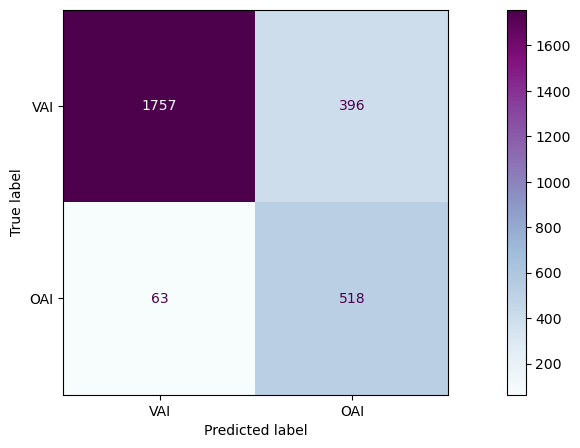

In [2415]:
acc, f1, rec, prec = make_results(y_train,xgb.predict(X_train))

Accuracy: 0.7651933701657458
F1: 0.6188340807174888
Recall: 0.8734177215189873
Precision: 0.4791666666666667


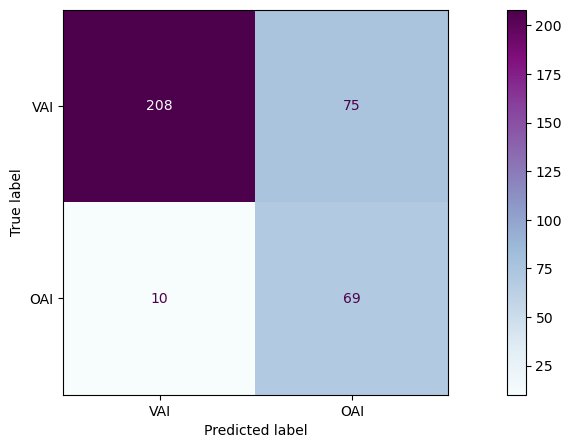

In [2416]:
acc, f1, rec, prec = make_results(y_test,xgb.predict(X_test))

In [2413]:
len(y_train[y_train.Classification == 0])/len(y_train[y_train.Classification == 1])

3.7056798623063685

## SMOTE

In [371]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [454]:
sm = SMOTE(random_state=42,sampling_strategy=1,k_neighbors=10)

In [455]:
X_res, y_res = sm.fit_resample(X_train,y_train)

In [2419]:
len(y_res[y_res.Classification == 1]),len(y_train[y_train.Classification == 1])

(2153, 581)

### LR

In [2420]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_res,y_res)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8130515559684162
F1: 0.8114312485359569
Recall: 0.8044588945657223
Precision: 0.8185255198487713


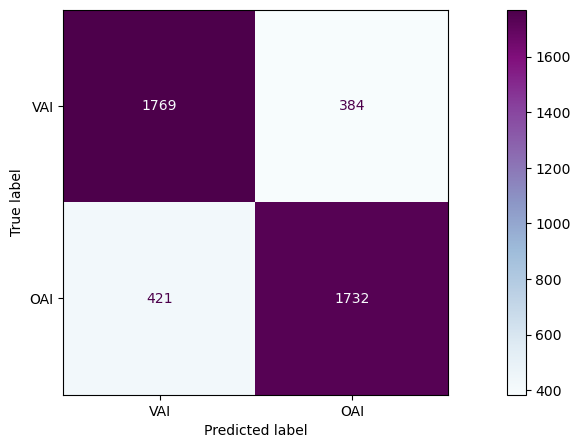

In [2421]:
acc, f1, rec, prec = make_results(y_res,add_thresh( logreg.predict_proba(X_res)[:,1],0.5))

Accuracy: 0.7790055248618785
F1: 0.6363636363636364
Recall: 0.8860759493670886
Precision: 0.49645390070921985


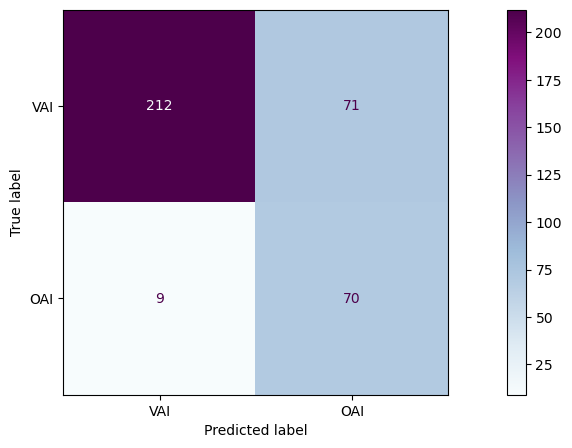

In [2422]:
acc, f1, rec, prec = make_results(y_test,add_thresh( logreg.predict_proba(X_test)[:,1],0.5))

#### Opt

In [452]:
acc_list, f1_list, rec_list = [],[],[]
for k in range(2,11):
    sm = SMOTE(random_state=42,sampling_strategy=1,k_neighbors=k)
    X_res, y_res = sm.fit_resample(X_train,y_train)
    logreg = LogisticRegression(max_iter=10000)

    logreg.fit(X_res,y_res)
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)

    acc = accuracy_score(y_train,y_train_pred)
    f1 = f1_score(y_train,y_train_pred)
    rec = recall_score(y_train,y_train_pred)

    acc_list.append(acc); f1_list.append(f1); rec_list.append(rec)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A 

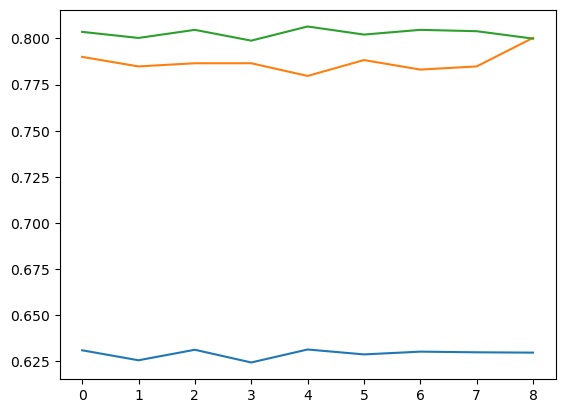

In [453]:
plt.plot(f1_list)
plt.plot(rec_list)
plt.plot(acc_list)

### RFC

In [1369]:
parameters ={ 'max_depth':[None,10,20,50,100],
              'bootstrap':[True,False],
              'criterion' : ['gini','entropy'],
              'max_features' : ['log2',5,20,None]}

In [1370]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
grid_search.fit(X_res,y_res)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['log2', 5, 20, None]})

In [1371]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 5}

In [456]:
rfc = RandomForestClassifier(n_estimators=500,
                                bootstrap=True,
                                criterion='gini',
                                max_depth=8,
                                max_features = 10,
                                class_weight={0:1,1:1.1})
rfc.fit(X_res,y_res)
y_train_pred = rfc.predict(X_res)
y_test_pred = rfc.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8576405016256387
F1: 0.859371415462262
Recall: 0.8699489084997678
Precision: 0.8490480507706256


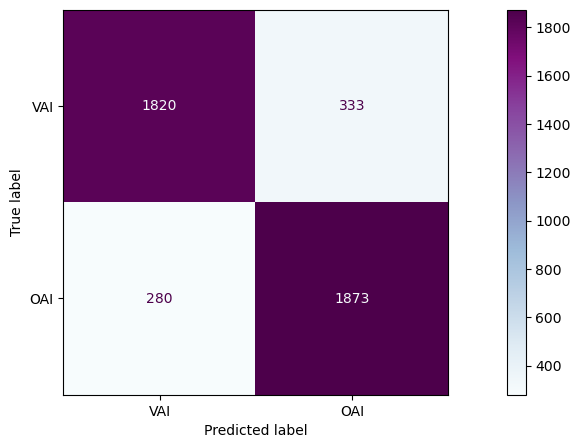

In [457]:
acc, f1, rec, prec = make_results(y_res,y_train_pred)

Accuracy: 0.8425414364640884
F1: 0.6951871657754011
Recall: 0.8227848101265823
Precision: 0.6018518518518519


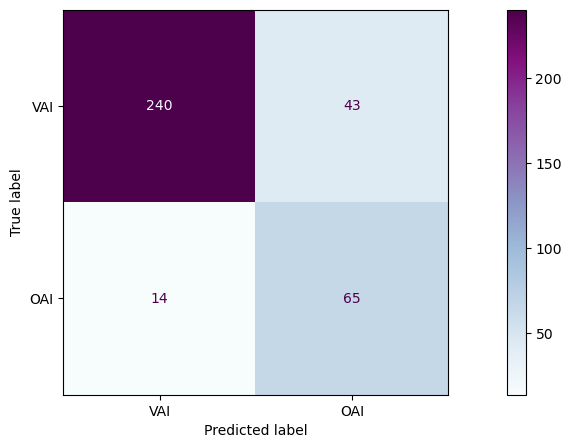

In [458]:
acc, f1, rec, prec = make_results(y_test,rfc.predict(X_test))

(0.0, 1.0)

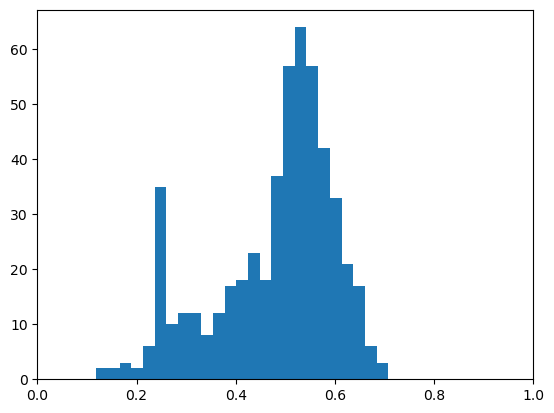

In [2494]:
rfc_df = pd.DataFrame(data = zip(y_res['Classification'].values,y_train_pred),columns = ['Y','YPred'])
rfc_df[['VAIProb','OAIProb']] = rfc.predict_proba(X_res)
rfc_miss_df = rfc_df[rfc_df.Y!=rfc_df.YPred]['OAIProb']
plt.hist(rfc_miss_df,bins=25)
plt.xlim([0,1])

(0.0, 1.0)

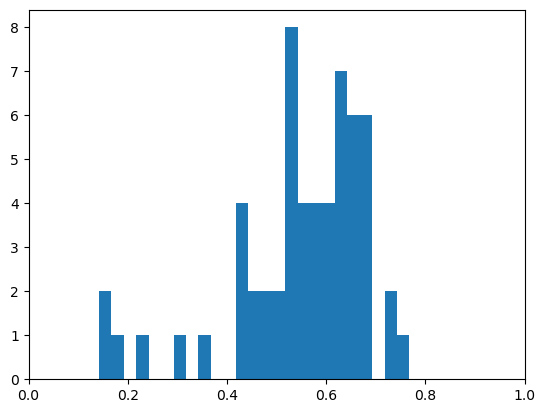

In [2495]:
rfc_df = pd.DataFrame(data = zip(y_test['Classification'].values,y_test_pred),columns = ['Y','YPred'])
rfc_df[['VAIProb','OAIProb']] = rfc.predict_proba(X_test)
rfc_miss_df = rfc_df[rfc_df.Y!=rfc_df.YPred]['OAIProb']
plt.hist(rfc_miss_df,bins=25)
plt.xlim([0,1])

### SVC

In [2512]:
svc = SVC(kernel='sigmoid',
          C=1e-1,
          shrinking=True,
          tol = 1e-3,
          probability=True)
svc.fit(X_res,y_res)
y_train_pred = svc.predict(X_res)
y_test_pred = svc.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.688341848583372
F1: 0.6877617496510005
Recall: 0.6864839758476544
Precision: 0.689044289044289


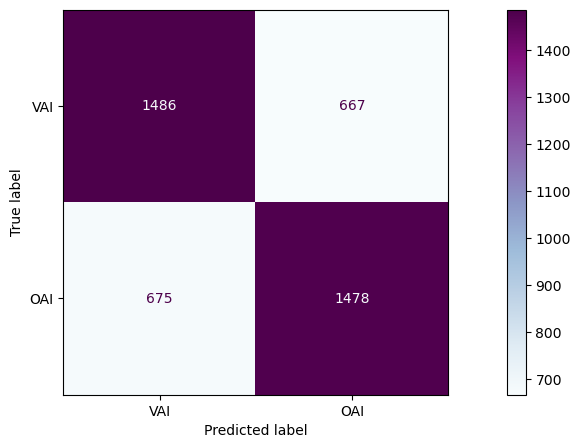

In [2513]:
acc, f1, rec, prec = make_results(y_res,y_train_pred)

(0.0, 1.0)

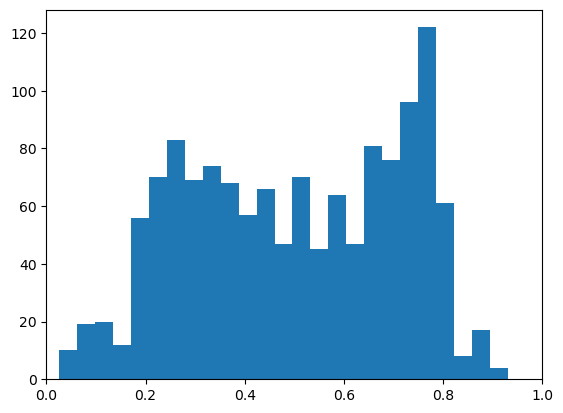

In [2514]:
rfc_df = pd.DataFrame(data = zip(y_res['Classification'].values,y_train_pred),columns = ['Y','YPred'])
rfc_df[['VAIProb','OAIProb']] = svc.predict_proba(X_res)
rfc_miss_df = rfc_df[rfc_df.Y!=rfc_df.YPred]['OAIProb']
plt.hist(rfc_miss_df,bins=25)
plt.xlim([0,1])

### KNN

In [2515]:
acc_knn_list = []
for n in range(1,50,5):
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(X_res,y_res)
    y_train_pred = kn.predict(X_res)

    acc_knn_list.append(accuracy_score(y_res,y_train_pred))

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarnin

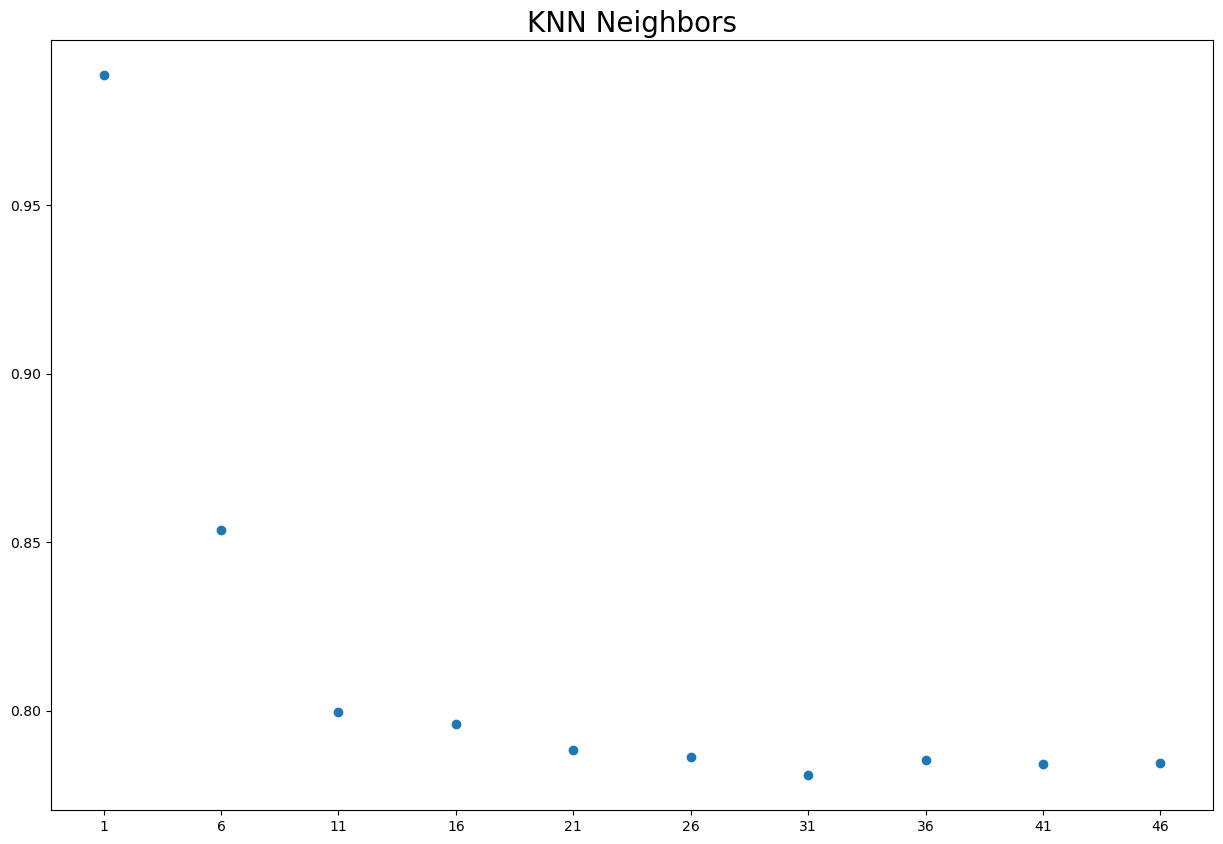

In [2518]:
plt.figure(figsize=(15,10))
plt.title('KNN Neighbors',fontsize=20)
plt.scatter(x=range(1,50,5),y=acc_knn_list)
plt.xticks(ticks=range(1,50,5))
plt.show()

In [2531]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_res,y_res)
y_train_pred = kn.predict(X_res)
y_test_pred = kn.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8181607059916396
F1: 0.8385899814471243
Recall: 0.9447282861124013
Precision: 0.7538917716827279


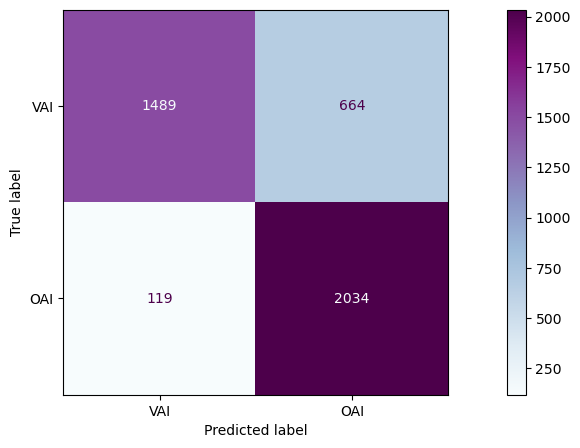

In [2532]:
acc, f1, rec, prec = make_results(y_res,y_train_pred)

Accuracy: 0.7154696132596685
F1: 0.5863453815261044
Recall: 0.9240506329113924
Precision: 0.4294117647058823


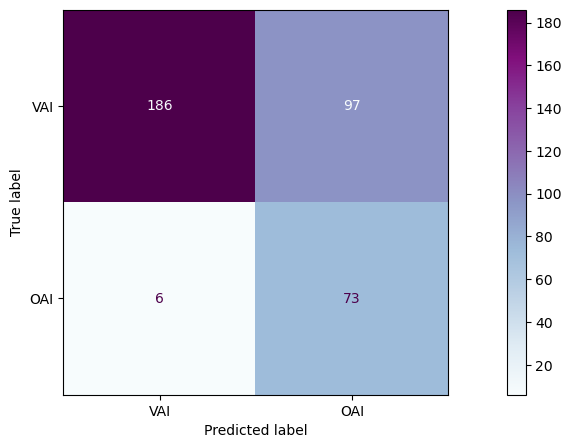

In [2533]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)

##  NN Full

In [286]:
id_test = list(set(data_trim_df[data_trim_df.InspectionEndDate > pd.to_datetime('2024-01-01')]['InspectionID'].unique()) - set([1238442]))
id_train =  list(data_trim_df[(data_trim_df.InspectionEndDate <= pd.to_datetime('2024-01-01')) & (data_trim_df.InspectionEndDate >= pd.to_datetime('2017-01-01'))]['InspectionID'].unique())

In [301]:
X_nn_train, X_nn_test, y_train, y_test = input_trim_df.drop('Classification',axis=1).loc[id_train],input_trim_df.drop('Classification',axis=1).loc[id_test], input_trim_df[['Classification']].loc[id_train], input_trim_df[['Classification']].loc[id_test]

In [302]:
np.sqrt(X_nn_train.shape[1])

14.142135623730951

In [303]:
nn = keras.Sequential([layers.Flatten(input_shape = (X_nn_train.shape[1],)),
                        layers.Dense(X_nn_train.shape[1],activation='relu'),
                        #layers.Dropout(0.2),
                        layers.Dense(20,activation='relu'),
                      #  layers.Dropout(0.1),
                       layers.Dense(1,activation='sigmoid')])

In [304]:
nn.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

In [305]:
history = nn.fit(X_nn_train, y_train, epochs=50, batch_size=10,validation_split=0.1,class_weight = {0: 1,1: 4})

Epoch 1/50
246/246 [==============================] - 2s 5ms/step - loss: 0.9952 - accuracy: 0.6520 - val_loss: 0.6456 - val_accuracy: 0.6861
Epoch 2/50
246/246 [==============================] - 1s 5ms/step - loss: 0.8795 - accuracy: 0.7049 - val_loss: 0.5745 - val_accuracy: 0.7226
Epoch 3/50
246/246 [==============================] - 1s 5ms/step - loss: 0.8254 - accuracy: 0.7268 - val_loss: 0.5276 - val_accuracy: 0.7336
Epoch 4/50
246/246 [==============================] - 1s 4ms/step - loss: 0.7958 - accuracy: 0.7325 - val_loss: 0.4920 - val_accuracy: 0.7409
Epoch 5/50
246/246 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.7297 - val_loss: 0.4563 - val_accuracy: 0.7555
Epoch 6/50
246/246 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.7402 - val_loss: 0.4406 - val_accuracy: 0.7628
Epoch 7/50
246/246 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.7553 - val_loss: 0.4387 - val_accuracy: 0.7409
Epoch 

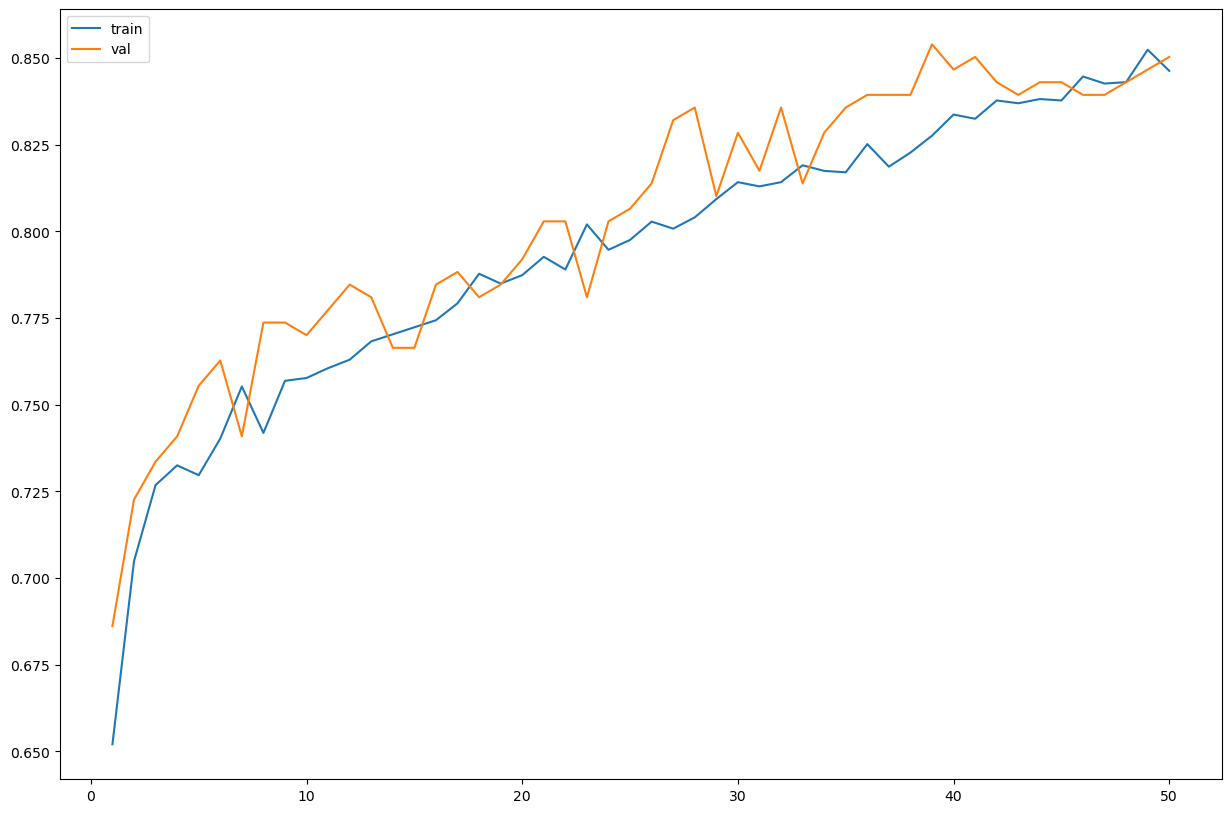

In [306]:
plt.figure(figsize=(15,10))
plt.plot(range(1,len(history.history['accuracy'])+1),history.history['accuracy'],label='train')
plt.plot(range(1,len(history.history['accuracy'])+1),history.history['val_accuracy'],label='val')
plt.legend(loc= 'upper left')

In [307]:
y_test_pred = []
y_test_prob = nn.predict(X_nn_train)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

86/86 [==============================] - 0s 936us/step


Accuracy: 0.8540599853694221
F1: 0.7238754325259515
Recall: 0.9001721170395869
Precision: 0.6053240740740741


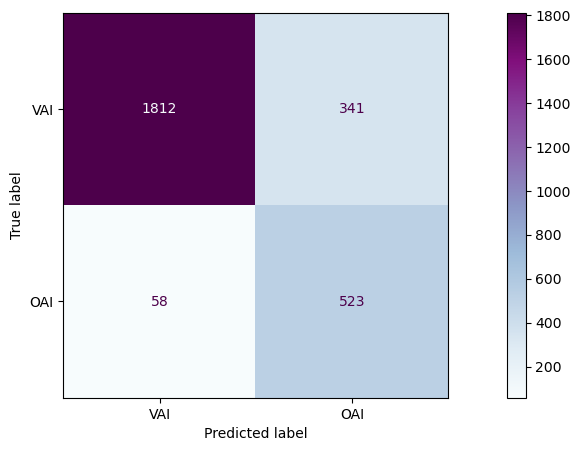

In [308]:
acc, f1, rec, prec = make_results(y_train,y_test_pred)

In [309]:
y_test_pred = []
y_test_prob = nn.predict(X_nn_test)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

12/12 [==============================] - 0s 959us/step


Accuracy: 0.7624309392265194
F1: 0.6090909090909091
Recall: 0.8481012658227848
Precision: 0.475177304964539


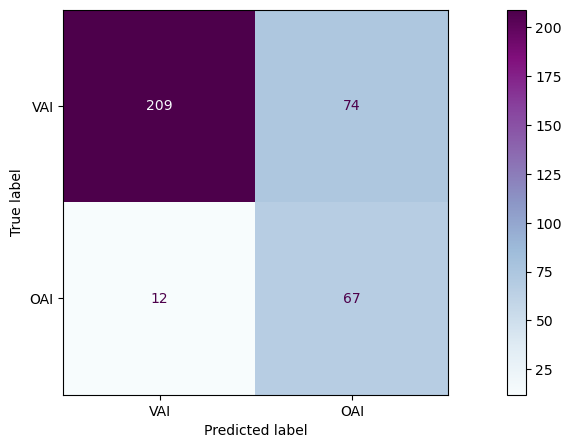

In [310]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)

In [2799]:
X_ros ,y_ros =  input_df.drop('Classification',axis=1).loc[ros_test_id], input_df['Classification'].loc[ros_test_id]

In [2800]:
y_test_pred = []
y_test_prob = nn.predict(X_ros)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

1/1 [==============================] - 0s 22ms/step


Accuracy: 0.84375
F1: 0.2857142857142857
Recall: 1.0
Precision: 0.16666666666666666


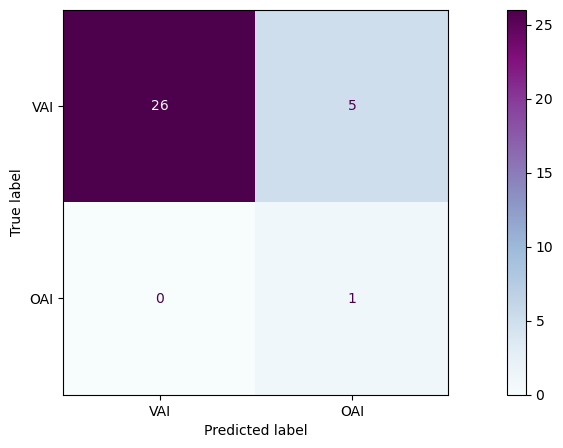

In [2801]:
acc, f1, rec, prec = make_results(y_ros,y_test_pred)

## Sparse

In [358]:
input_sparse_df = input_df.drop(['CitationScore','ActCFRNumber','CitationScore_mean'],axis=1)

In [359]:
X_train, X_test, y_train, y_test = input_sparse_df.drop('Classification',axis=1).loc[id_train],input_sparse_df.drop('Classification',axis=1).loc[id_test], input_sparse_df[['Classification']].loc[id_train], input_sparse_df[['Classification']].loc[id_test]

In [360]:
num_oais = len(y_train[y_train.Classification == 1])
non_oais_df = X_train.loc[y_train[y_train.Classification == 0].index]
non_oais_list = list(non_oais_df.sample(n =int(np.ceil(1* num_oais)), random_state = 1).index)
oais_list = list(y_train[y_train.Classification == 1].index)
X_ds_train, y_ds_train = X_train.loc[oais_list+non_oais_list], y_train.loc[oais_list+non_oais_list]

In [397]:
X_res, y_res = sm.fit_resample(X_train,y_train)

### LR

In [398]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_res,y_res)
y_train_pred = logreg.predict(X_res)
y_test_pred = logreg.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7935438922433813
F1: 0.7942605878268919
Recall: 0.7970274036228518
Precision: 0.7915129151291513


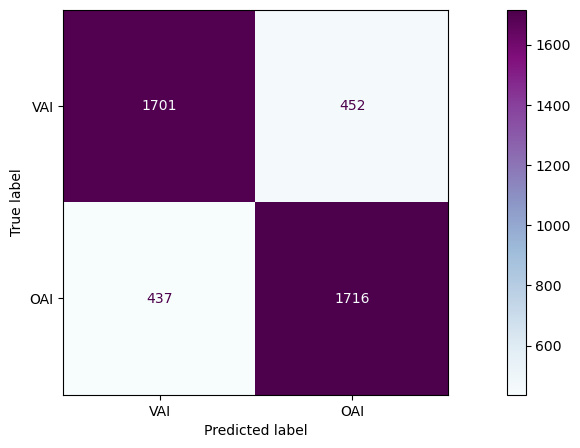

In [400]:
acc, f1, rec, prec = make_results(y_res,y_train_pred)

Accuracy: 0.7348066298342542
F1: 0.5966386554621849
Recall: 0.8987341772151899
Precision: 0.44654088050314467


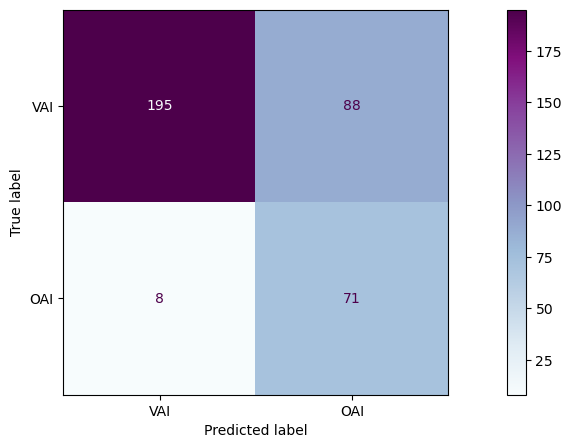

In [401]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)

### RFC

In [433]:
rfc = RandomForestClassifier(n_estimators=500,
                                bootstrap=True,
                                criterion='gini',
                                max_depth=15,
                                max_features = 10,
                                class_weight={0:1,1:1.5})
rfc.fit(X_res,y_res)
y_train_pred = rfc.predict(X_res)
y_test_pred = rfc.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9405480724570366
F1: 0.9403819282720075
Recall: 0.9377612633534603
Precision: 0.9430172816440916


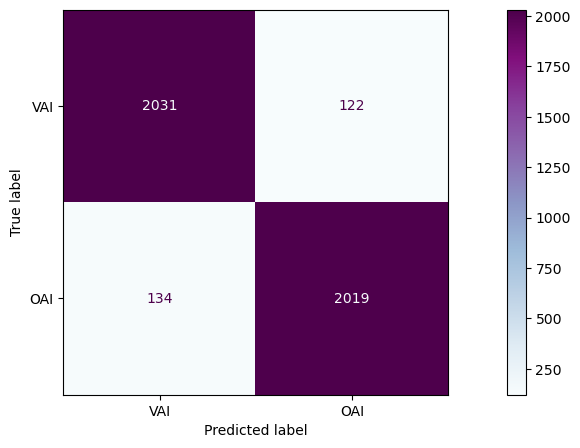

In [434]:
acc, f1, rec, prec = make_results(y_res,y_train_pred)

Accuracy: 0.8038674033149171
F1: 0.6395939086294417
Recall: 0.7974683544303798
Precision: 0.5338983050847458


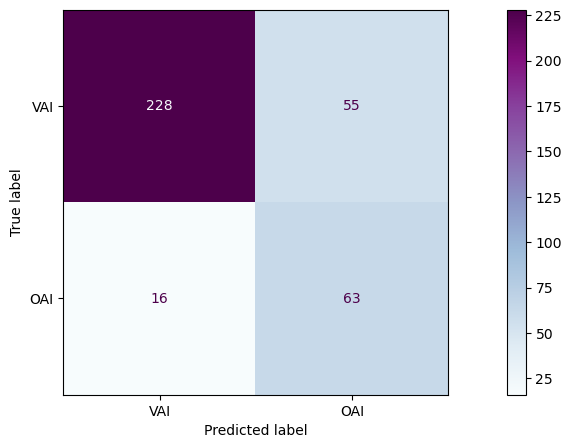

In [435]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)

21 CFR 211.100(a)  21 CFR 211.100(a)(0)  21 CFR 211.100(b)  \
InspectionID                                                               
1227777                0.000000                   0.0                0.0   
1244163                0.000000                   0.0                0.0   
1227779                0.000000                   0.0                0.0   
1247237                0.000000                   0.0                0.0   
1242121                0.000000                   0.0                0.0   
...                         ...                   ...                ...   
1237992                0.000000                   0.0                0.0   
1249263                0.000000                   0.0                0.0   
1251315                0.274557                   0.0                0.0   
1245176                0.000000                   0.0                0.0   
1239037                0.000000                   0.0                0.0   

              21 CFR 211.101(a)  21 CFR 211.101(a)(0)  21 CFR 211.101(b)  \
InspectionID                                                               
1227777                     0.0                   0.0                0.0   
1244163                     0.0                   0.0                0.0   
1227779                     0.0                   0.0                0.0   
1247237                     0.0                   0.0                0.0   
1242121                     0.0                   0.0                0.0   
...                         ...                   ...                ...   
1237992                     0.0                   0.0                0.0   
1249263                     0.0                   0.0                0.0   
1251315                     0.0                   0.0                0.0   
1245176                     0.0                   0.0                0.0   
1239037                     0.0                   0.0                0.0   

              21 CFR 211.101(b)(1)  21 CFR 211.101(b)(4)  21 CFR 211.101(c)  \
InspectionID                                                                  
1227777                        0.0                   0.0                0.0   
1244163                        0.0                   0.0                0.0   
1227779                        0.0                   0.0                0.0   
1247237                        0.0                   0.0                0.0   
1242121                        0.0                   0.0                0.0   
...                            ...                   ...                ...   
1237992                        0.0                   0.0                0.0   
1249263                        0.0                   0.0                0.0   
1251315                        0.0                   0.0                0.0   
1245176                        0.0                   0.0                0.0   
1239037                        0.0                   0.0                0.0   

              21 CFR 211.101(c)(1)  ...  FDCA 505-1(f)(3)(C)  \
InspectionID                        ...                        
1227777                        0.0  ...                  0.0   
1244163                        0.0  ...                  0.0   
1227779                        0.0  ...                  0.0   
1247237                        0.0  ...                  0.0   
1242121                        0.0  ...                  0.0   
...                            ...  ...                  ...   
1237992                        0.0  ...                  0.0   
1249263                        0.0  ...                  0.0   
1251315                        0.0  ...                  0.0   
1245176                        0.0  ...                  0.0   
1239037                        0.0  ...                  0.0   

              FDCA 505-1(f)(3)(D)  FDCA 505-1(f)(3)(F)  FDCA 505-1(f)(4)  \
InspectionID                                                               
1227777                

## Only ROS Dataset

In [1560]:
fda_insp_details_df[fda_insp_details_df['InspectionID'].isin(data_df['InspectionID'].unique())]['ProjectArea'].value_counts()

ProjectArea
Drug Quality Assurance                                    6408
Monitoring of Marketed Animal Drugs, Feed, and Devices     908
Bioresearch Monitoring                                     369
Blood and Blood Products                                   317
Colors and Cosmetics Technology                            310
Food Composition, Standards, Labeling and Econ             248
Compliance: Devices                                        236
Unapproved and Misbranded Drugs                            230
Foodborne Biological Hazards                               152
Human Cellular, Tissue, and Gene Therapies                 113
Pre-Approval Eval. of Animal Drugs and Food Additives       91
Vaccines and Allergenic Products                            63
Postmarket Assurance: Devices                               51
Postmarket Surv. and Epidemiology                           38
Over-the-Counter Drug Evaluation                            13
Pesticides and Chemical Contaminants       

In [1561]:
fda_insp_details_df[fda_insp_details_df['InspectionID'].isin(ros_id)]['ProjectArea'].value_counts()

ProjectArea
Drug Quality Assurance                                    584
Monitoring of Marketed Animal Drugs, Feed, and Devices     58
Bioresearch Monitoring                                     45
Food Composition, Standards, Labeling and Econ             16
Compliance: Devices                                        13
Unapproved and Misbranded Drugs                             9
Pre-Approval Eval. of Animal Drugs and Food Additives       6
Vaccines and Allergenic Products                            4
Foodborne Biological Hazards                                4
Colors and Cosmetics Technology                             4
Blood and Blood Products                                    2
Postmarket Surv. and Epidemiology                           2
Food and Color Additives Petition Review                    2
Pesticides and Chemical Contaminants                        2
Human Cellular, Tissue, and Gene Therapies                  1
Prescription Drug Advertising and Labelling               

In [1935]:
len(set(X_train.index).intersection(set(ros_id))),len(set(X_test.index).intersection(set(ros_id)))

(301, 29)

In [1936]:
ros_train_id = list(set(X_train.index).intersection(set(ros_id)))
ros_test_id = list(set(X_test.index).intersection(set(ros_id)))

X_ros_train, X_ros_test, y_ros_train, y_ros_test = X_train.loc[ros_train_id], X_test.loc[ros_test_id], y_train.loc[ros_train_id], y_test.loc[ros_test_id]

In [1937]:
len(y_ros_train[y_ros_train.Classification == 0])/len(y_ros_train[y_ros_train.Classification==1])

11.541666666666666

### XGB

In [1938]:
xgb = XGBClassifier(scale_pos_weight = 11.54)
xgb.fit(X_ros_train,y_ros_train)
y_train_pred = xgb.predict(X_ros_train)
y_test_pred = xgb.predict(X_ros_test)

Accuracy: 1.0
F1: 1.0
Recall: 1.0
Precision: 1.0


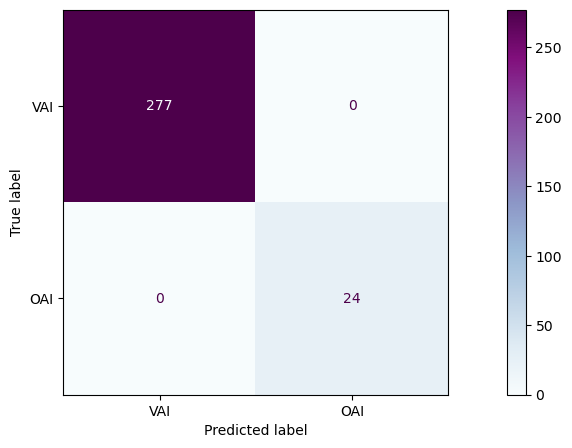

In [1939]:
acc, f1, rec, prec = make_results(y_ros_train,xgb.predict(X_ros_train))

Accuracy: 0.8275862068965517
F1: 0.0
Recall: 0.0
Precision: 0.0


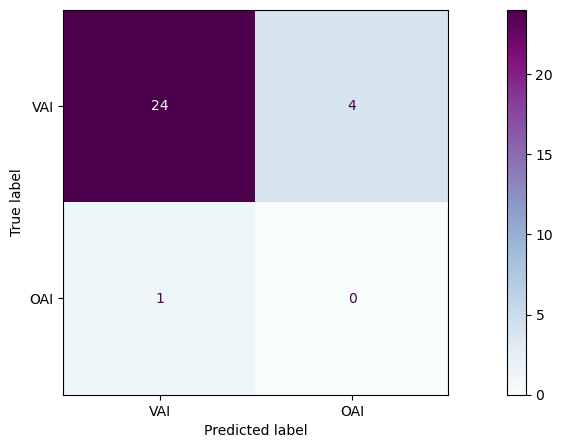

In [1940]:
acc, f1, rec, prec = make_results(y_ros_test,xgb.predict(X_ros_test))

In [1603]:
xgb.predict_proba(X_ros_test)

array([[9.9931741e-01, 6.8256957e-04],
       [4.5401168e-01, 5.4598832e-01],
       [9.9769783e-01, 2.3021433e-03],
       [9.9469078e-01, 5.3092376e-03],
       [9.9620640e-01, 3.7935709e-03],
       [9.9931741e-01, 6.8256957e-04],
       [9.9931741e-01, 6.8256957e-04],
       [9.9931741e-01, 6.8256957e-04],
       [9.9931741e-01, 6.8256957e-04],
       [9.3535125e-01, 6.4648718e-02],
       [9.8649144e-01, 1.3508572e-02],
       [6.5774238e-01, 3.4225762e-01],
       [3.0099612e-01, 6.9900388e-01],
       [9.9725097e-01, 2.7490363e-03],
       [9.9931741e-01, 6.8256957e-04],
       [9.9904090e-01, 9.5911254e-04],
       [7.2889638e-01, 2.7110365e-01],
       [8.8835025e-01, 1.1164972e-01],
       [9.9469078e-01, 5.3092376e-03],
       [9.9349684e-01, 6.5031755e-03],
       [9.9931741e-01, 6.8256957e-04],
       [9.9620640e-01, 3.7935709e-03],
       [9.9931741e-01, 6.8256957e-04],
       [9.9931741e-01, 6.8256957e-04],
       [8.3964300e-01, 1.6035703e-01],
       [5.4013371e-01, 4.

In [1458]:
y_ros_test

Classification
InspectionID                
1232512                    0
1228546                    1
1229060                    0
1229061                    0
1244548                    0
1248645                    0
1230475                    0
1241485                    0
1229588                    0
1243288                    0
1238809                    0
1250459                    0
1230374                    0
1240110                    0
1232947                    0
1243575                    0
1232189                    0
1230144                    0
1226951                    0
1249609                    0
1252181                    0
1234389                    0
1235038                    0
1232735                    0
1239007                    0
1230058                    0
1240940                    0
1240813                    0
1251315                    0

### Logistic Regression

In [1941]:
logreg = LogisticRegression()
logreg.fit(X_ros_train,y_ros_train)
y_train_pred = logreg.predict(X_ros_train)
y_test_pred = logreg.predict(X_ros_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9568106312292359
F1: 0.7450980392156863
Recall: 0.7916666666666666
Precision: 0.7037037037037037


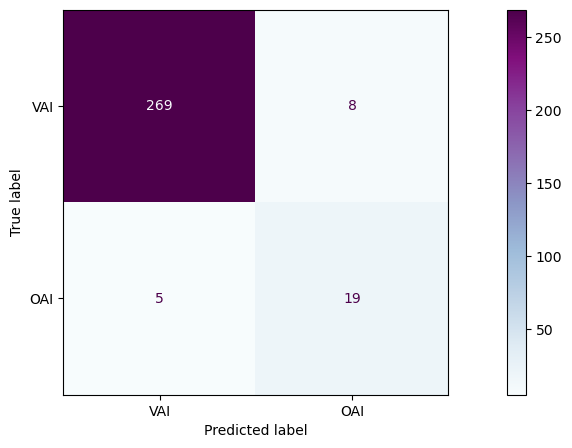

In [1944]:
acc, f1, rec, prec = make_results(y_ros_train,add_thresh(logreg.predict_proba(X_ros_train)[:,1],0.25))

Accuracy: 0.896551724137931
F1: 0.4
Recall: 1.0
Precision: 0.25


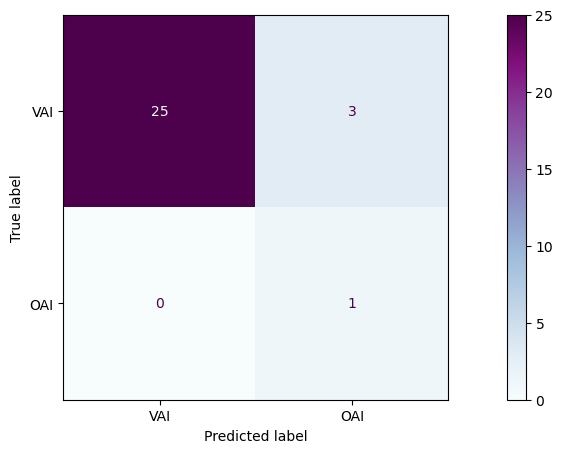

In [1945]:
acc, f1, rec, prec = make_results(y_ros_test,add_thresh(logreg.predict_proba(X_ros_test)[:,1],0.25))

In [1610]:
logreg.predict_proba(X_ros_test)

array([[0.98146498, 0.01853502],
       [0.20928638, 0.79071362],
       [0.97024562, 0.02975438],
       [0.98467932, 0.01532068],
       [0.94584789, 0.05415211],
       [0.9831445 , 0.0168555 ],
       [0.98084854, 0.01915146],
       [0.98822874, 0.01177126],
       [0.97276978, 0.02723022],
       [0.86340386, 0.13659614],
       [0.94485021, 0.05514979],
       [0.77181361, 0.22818639],
       [0.68729721, 0.31270279],
       [0.95048776, 0.04951224],
       [0.98142598, 0.01857402],
       [0.97667829, 0.02332171],
       [0.87156356, 0.12843644],
       [0.50413531, 0.49586469],
       [0.98467932, 0.01532068],
       [0.93149962, 0.06850038],
       [0.9831445 , 0.0168555 ],
       [0.95323628, 0.04676372],
       [0.9831445 , 0.0168555 ],
       [0.98146498, 0.01853502],
       [0.90457523, 0.09542477],
       [0.61113103, 0.38886897],
       [0.89917235, 0.10082765],
       [0.65179131, 0.34820869],
       [0.90495451, 0.09504549]])

In [1611]:
rfc = RandomForestClassifier(class_weight = {0:1,1:7.2})

In [1612]:
rfc.fit(X_ros_train,y_ros_train)
y_train_pred = rfc.predict(X_ros_train)
y_test_pred = rfc.predict(X_ros_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
F1: 1.0
Recall: 1.0
Precision: 1.0


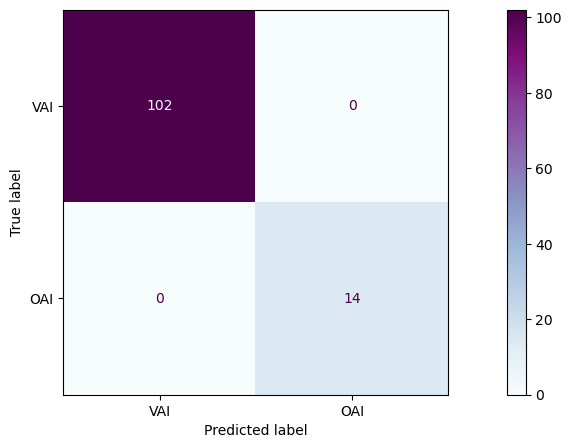

In [1613]:
acc, f1, rec, prec = make_results(y_ros_train,add_thresh(rfc.predict_proba(X_ros_train)[:,1],0.5))

Accuracy: 0.8620689655172413
F1: 0.3333333333333333
Recall: 1.0
Precision: 0.2


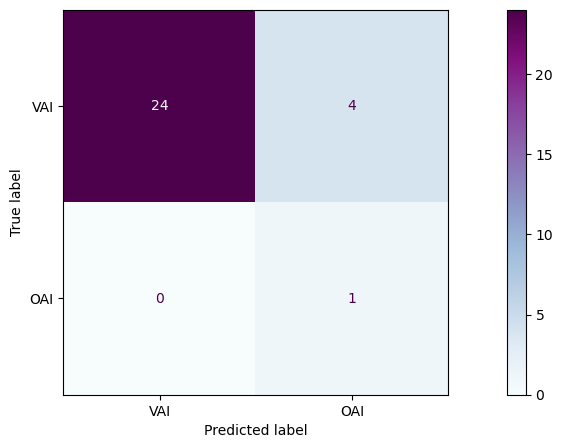

In [1617]:
acc, f1, rec, prec = make_results(y_ros_test,add_thresh(rfc.predict_proba(X_ros_test)[:,1],0.3))

# Dense

In [2457]:
oai_input_list = []
for id in list(data_df['InspectionID'].unique()):
    tmp = data_df[data_df.InspectionID == id]['NewCitation'].unique()
    oai_tmp_list = list(act_df.loc[tmp].sort_values(by='OAI_weighted',ascending=False)['OAI_weighted'].values)
    if len(oai_tmp_list)< 10:
        oai_tmp_list += (10-len(oai_tmp_list))*[np.nan]
    oai_input_list.append(oai_tmp_list[:10])
    

KeyError: "['FDCA 505-1(f)(3)(E)'] not in index"

In [2020]:
input_df = pd.DataFrame(data = oai_input_list,columns = ['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6','Obs7','Obs8','Obs9','Obs10'],index = list(data_df['InspectionID'].unique()))
input_df.index.name = 'InspectionID'

In [2021]:
data_trim_df = input_df.merge(data_df[['InspectionID','Classification']].drop_duplicates().groupby(['InspectionID'])['Classification'].sum().reset_index(),
                        how = 'left',
                        on = 'InspectionID')
data_trim_df = data_trim_df.drop_duplicates()

In [2022]:
data_trim_df = data_trim_df[data_trim_df['Classification'].isin(['OAI','VAI'])]

In [2023]:
data_trim_df = data_trim_df.merge(data_df[['InspectionID','InspectionEndDate']].drop_duplicates(),
                                  how ='left',
                                  on = 'InspectionID')

In [2024]:
data_trim_df['Month'] = data_trim_df['InspectionEndDate'].apply(lambda x: x.month)
data_trim_df['Year'] = data_trim_df['InspectionEndDate'].apply(lambda x: x.year)

<Axes: xlabel='Year,Classification'>

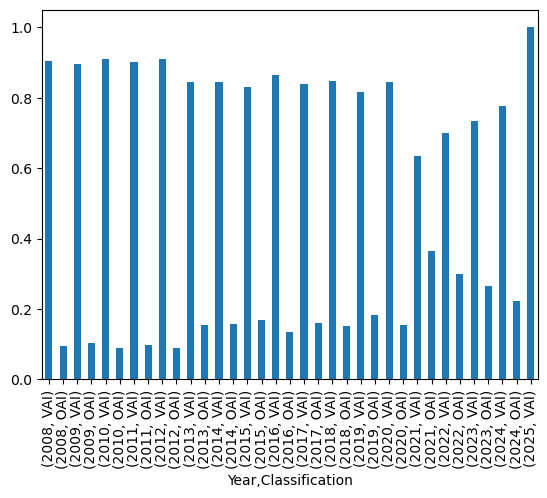

In [2025]:
data_trim_df.groupby('Year')['Classification'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Month,Classification'>

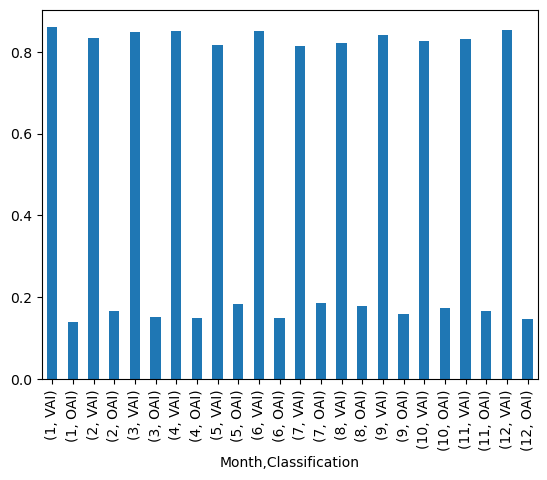

In [2026]:
data_trim_df.groupby('Month')['Classification'].value_counts(normalize=True).plot(kind='bar')

In [2027]:
data_trim_df = data_trim_df.drop(['InspectionEndDate','Month'],axis=1)
data_trim_df['Year'] = data_trim_df['Year'].apply(lambda x: 1 if x > 2020 else 0)

In [2028]:
data_trim_df = data_trim_df.merge(fda_insp_details_df[['InspectionID','CountryArea']].drop_duplicates(),
                    how = 'left',
                    on ='InspectionID')

In [2029]:
data_trim_df['CountryArea'] = data_trim_df['CountryArea'].apply(lambda x: encode_country(x))

In [2030]:
data_trim_df = data_trim_df.fillna(0)

In [2031]:
data_trim_df = data_trim_df.merge(data_df.groupby('InspectionID')['ActCFRNumber'].nunique().reset_index(),
                    how = 'left',
                    on = 'InspectionID')

In [2032]:
data_trim_df['ActCFRNumber'] = data_trim_df['ActCFRNumber']/15

In [2033]:
input_trim_df = data_trim_df.set_index('InspectionID').loc[id_train+id_test]

In [2034]:
input_trim_df['Classification'] = input_trim_df['Classification'].apply(lambda x: 1 if x == 'OAI' else 0)

In [2035]:
X_train, X_test, y_train, y_test = input_trim_df.drop('Classification',axis=1).loc[id_train],input_trim_df.drop('Classification',axis=1).loc[id_test], input_trim_df[['Classification']].loc[id_train], input_trim_df[['Classification']].loc[id_test]

## DS

In [2036]:
X_ds_train, y_ds_train = X_train.loc[oais_list+non_oais_list], y_train.loc[oais_list+non_oais_list]

### LOGREG

In [2037]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_ds_train,y_ds_train)
y_train_pred = logreg.predict(X_ds_train)
y_test_pred = logreg.predict(X_test)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7452667814113597
F1: 0.7457044673539519
Recall: 0.7469879518072289
Precision: 0.7444253859348199


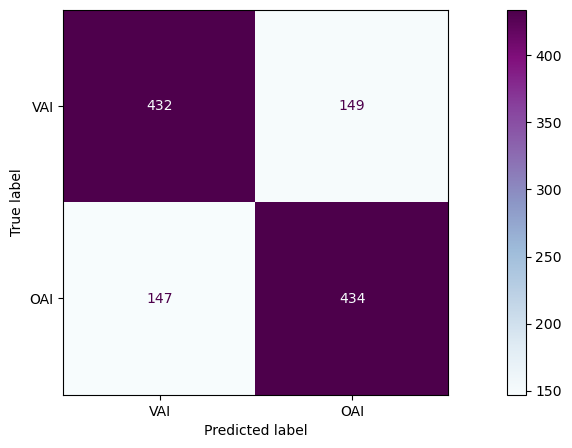

In [2038]:
acc, f1, rec, prec = make_results(y_ds_train,y_train_pred)

Accuracy: 0.7596685082872928
F1: 0.6233766233766234
Recall: 0.9113924050632911
Precision: 0.47368421052631576


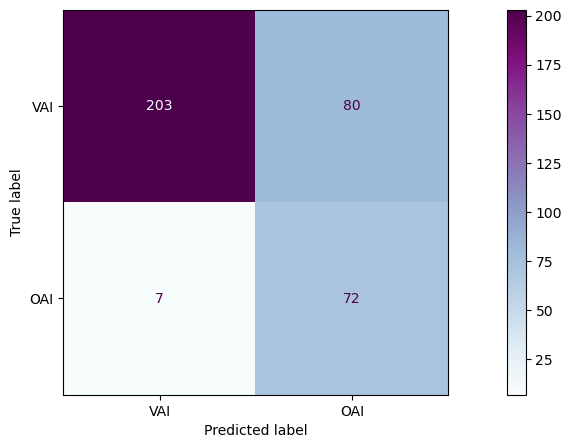

In [2039]:
acc, f1, rec, prec = make_results(y_test,y_test_pred)

In [2040]:
logreg_coefs_df = pd.DataFrame(data = logreg.coef_.T, columns = ['Value'], index = X_train.columns)

In [2041]:
logreg_coefs_df

Value
Obs1          2.089545
Obs2          0.175284
Obs3          2.070455
Obs4          2.082991
Obs5          1.545340
Obs6          1.833714
Obs7          0.345839
Obs8          0.683090
Obs9          0.185652
Obs10         0.057942
Year          0.886301
CountryArea   0.134495
ActCFRNumber  0.503722

In [2047]:
pred_df = y_ds_train
pred_df['Prediction'] = y_train_pred
pred_df

Classification  Prediction
InspectionID                            
1225549                    1           1
1225284                    1           1
1226130                    1           0
1226067                    1           0
1227210                    1           1
...                      ...         ...
1001545                    0           0
1181090                    0           1
1017373                    0           0
1171585                    0           0
1055639                    0           0

[1162 rows x 2 columns]

In [2048]:
id_fn = pred_df[pred_df.Classification > pred_df.Prediction].index

In [2057]:
input_trim_df['Total'] = input_trim_df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6','Obs7','Obs8','Obs9','Obs10']].T.sum()
input_trim_df['Mean'] = input_trim_df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6','Obs7','Obs8','Obs9','Obs10']].T.mean()

In [2059]:
input_trim_df[input_trim_df.Classification == 0]['Total'].mean(),input_trim_df[input_trim_df.Classification == 1]['Total'].mean()

(0.9157660045297196, 2.00938103958701)

In [2060]:
input_trim_df[input_trim_df.Classification == 0]['Mean'].mean(),input_trim_df[input_trim_df.Classification == 1]['Mean'].mean()

(0.09157660045297196, 0.20093810395870101)

In [2062]:
input_trim_df.loc[id_fn[0]]

Obs1              0.279703
Obs2              0.267974
Obs3              0.250000
Obs4              0.156571
Obs5              0.000000
Obs6              0.000000
Obs7              0.000000
Obs8              0.000000
Obs9              0.000000
Obs10             0.000000
Classification    1.000000
Year              1.000000
CountryArea       1.000000
ActCFRNumber      0.266667
Total             0.954248
Mean              0.095425
Name: 1226130, dtype: float64

In [2064]:
data_df[data_df.InspectionID == id_fn[0]]

InspectionID  FEINumber          LegalName InspectionEndDate  \
1619       1226130    2023614  Med-Pharmex, Inc.        2023-12-18   
1620       1226130    2023614  Med-Pharmex, Inc.        2023-12-18   
1621       1226130    2023614  Med-Pharmex, Inc.        2023-12-18   
1622       1226130    2023614  Med-Pharmex, Inc.        2023-12-18   

     ProgramArea       ActCFRNumber                       ShortDescription  \
1619       Drugs  21 CFR 211.100(a)          Absence of Written Procedures   
1620       Drugs  21 CFR 211.100(b)         SOPs not followed / documented   
1621       Drugs  21 CFR 211.101(b)  Measured components for manufacturing   
1622       Drugs  21 CFR 211.165(e)                           Test methods   

                                        LongDescription Classification  Year  
1619  Your firm failed to establish adequate written...            OAI  2023  
1620  Written production and process control procedu...            OAI  2023  
1621  Components for drug product manufacturing are ...            OAI  2023  
1622  The accuracy, sensitivity, specificity and rep...            OAI  2023

In [2099]:
data_df[data_df.InspectionID == id_fn[0]]['LongDescription'].values[0]

'Your firm failed to establish adequate written procedures for production and process controls designed to assure that the drug products have the identity, strength, purity, and quality that they are purported or represented to possess.'

In [2100]:
data_df[data_df.LongDescription == data_df[data_df.InspectionID == id_fn[0]]['LongDescription'].values[0]][['InspectionID','ShortDescription','LongDescription','Year','Classification']]['Classification'].value_counts()

Classification
OAI    58
VAI    53
NAI     2
Name: count, dtype: int64

In [2089]:
data_df[data_df.ShortDescription == data_df[data_df.InspectionID == id_fn[0]]['ShortDescription'].values[3]][['InspectionID','ShortDescription','LongDescription','Year','Classification']]['Classification'].value_counts()

Classification
VAI    255
OAI    113
NAI     36
Name: count, dtype: int64

In [2102]:
data_df[data_df.ActCFRNumber == data_df[data_df.InspectionID == id_fn[0]]['ActCFRNumber'].values[0]][['InspectionID','ShortDescription','LongDescription','Year','Classification']]['Classification'].value_counts()

Classification
VAI    1113
OAI     451
NAI     119
Name: count, dtype: int64

In [2101]:
data_df[data_df.ActCFRNumber == data_df[data_df.InspectionID == id_fn[0]]['ActCFRNumber'].values[0]][['InspectionID','ShortDescription','LongDescription','Year','Classification']]['LongDescription'].value_counts()

LongDescription
There are no written procedures for production and process controls designed to assure that the drug products have the identity, strength, quality, and purity they purport or are represented to possess.                                                                                 1107
Your firm failed to establish adequate written procedures for production and process controls designed to assure that the drug products have the identity, strength, purity, and quality that they are purported or represented to possess.                                                 113
Your firm failed to establish written procedures for production and process controls designed to assure that the drug products have the identity, strength, purity, and quality that they are purported or represented to possess.                                                           92
Written procedures are not reviewed and approved by the quality control unit.                                           

# Observations to Citations

In [69]:
from difflib import get_close_matches

## Glenmark Ex

In [ ]:
obs1 = 'Equipment and utensils are not cleaned at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the drug product.'
obs2 = 'Separate or defined areas to prevent contamination or mix-ups are deficient regarding the manufacturing and processing operations.'
obs3 = 'There is a failure to thoroughly review any unexplained discrepancy and the failure ofa batch or any of its components to meet any of its specifications whether or not the batch has been ah-eady distributed.'
obs4 = 'The accuracy, sensitivity, specificity and reproducibility oftest methods have not been established and documented.'
obs5 = 'The quality control unit lacks responsibility to approve all procedures or specifications impacting on the quality of drng products.'

In [579]:
for obs in [obs1,obs2,obs3,obs4,obs5]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique())
    cfr = data_df[data_df['LongDescription'].isin(matches)]['ActCFRNumber'].unique()
    print(obs)
    print(cfr)

Equipment and utensils are not cleaned at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the drng product.
['21 CFR 211.67(a)']
Separate or defined areas to prevent contamination or mix-ups are deficient regarding the manufacturing and processing operations.
['21 CFR 211.42(c)(9)' '21 CFR 211.42(c)(5)' '21 CFR 211.42(c)(6)']
There is a failure to thoroughly review any unexplained discrepancy and the failure ofa batch or any of its components to meet any of its specifications whether or not the batch has been ah-eady distributed.
['21 CFR 211.192']
The accuracy, sensitivity, specificity and reproducibility oftest methods have not been established and documented.
['21 CFR 211.165(e)']
The quality control unit lacks responsibility to approve all procedures or specifications impacting on the quality of drng products.
['21 CFR 211.22(c)']


In [580]:
matches = get_close_matches(obs2,data_df["LongDescription"].unique())
cfr = data_df[data_df['LongDescription'].isin(matches)][['LongDescription','ActCFRNumber']].drop_duplicates()

In [581]:
cfr['LongDescription'].unique()

array(['Separate or defined areas to prevent contamination or mix-ups are deficient regarding laboratory controls and operations.',
       'Separate or defined areas to prevent contamination or mix-ups are deficient regarding the manufacturing and processing operations.',
       'Separate or defined areas to prevent contamination or mix-ups are deficient regarding the packaging and labeling operations.'],
      dtype=object)

In [582]:
data_df[data_df['LongDescription'].isin(matches)]['ActCFRNumber'].unique()

array(['21 CFR 211.42(c)(9)', '21 CFR 211.42(c)(5)',
       '21 CFR 211.42(c)(6)'], dtype=object)

In [537]:
citations = ['21 CFR 211.67(a)','21 CFR 211.42(c)(5)','21 CFR 211.192','21 CFR 211.165(e)','21 CFR 211.22(c)']

In [538]:
act_df.loc[citations]

Classification         OAI     VAI   Total  OAI_weighted
NewCitation                                             
21 CFR 211.67(a)     209.0   498.0   707.0      0.295615
21 CFR 211.42(c)(5)   12.0    17.0    29.0      0.413793
21 CFR 211.192       484.0  1308.0  1792.0      0.270089
21 CFR 211.165(e)     93.0   220.0   313.0      0.297125
21 CFR 211.22(c)      35.0   104.0   139.0      0.251799

In [539]:
glenmark = pd.DataFrame(data = np.zeros(shape=(1,len(X_test.columns))),columns = X_test.columns)

In [540]:
glenmark[citations] = act_df.loc[citations]['OAI_weighted']

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_30600\3550908533.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  glenmark[citations] = act_df.loc[citations]['OAI_weighted']


In [543]:
glenmark[citations].sum().sum()

1.5284208267659138

In [591]:
glenmark['CountryArea'] = -1
glenmark['Year'] = 1

In [592]:
glenmark['CitationCount'] = ss.transform([[glenmark[citations].T.sum().values[0]]])[0][0]
#glenmark['ActCFRNumber'] = ss_act.transform([[5]])[0][0]

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [593]:
glenmark

21 CFR 211.100(a)  21 CFR 211.100(b)  21 CFR 211.101(a)  21 CFR 211.101(b)  \
0                0.0                0.0                0.0                0.0   

   21 CFR 211.101(b)(1)  21 CFR 211.101(b)(4)  21 CFR 211.101(c)  \
0                   0.0                   0.0                0.0   

   21 CFR 211.101(c)(1)  21 CFR 211.101(c)(3)  21 CFR 211.101(d)  ...  \
0                   0.0                   0.0                0.0  ...   

   FDCA 505-1(f)(3)(D)  FDCA 505-1(f)(3)(F)  FDCA 505-1(f)(4)  FDCA 760(b)(1)  \
0                  0.0                  0.0               0.0             0.0   

   FDCA 760(c)(1)  FDCA 760(c)(2)  FDCA 760(e)(2)(A)  CitationCount  \
0             0.0             0.0                0.0       0.179185   

   CountryArea  Year  
0           -1     1  

[1 rows x 354 columns]

### Citations

In [375]:
compare = input_df.copy()
compare['ActCFRNumber'] = ss_act.inverse_transform(compare[['ActCFRNumber']])

In [381]:
compare[compare.Classification == 1]

21 CFR 211.100(a)  21 CFR 211.100(b)  21 CFR 211.101(a)  \
InspectionID                                                            
545129                 0.280605                0.0                0.0   
545476                 0.000000                0.0                0.0   
546535                 0.000000                0.0                0.0   
550070                 0.000000                0.0                0.0   
551752                 0.000000                0.0                0.0   
...                         ...                ...                ...   
1252506                0.000000                0.0                0.0   
1252945                0.000000                0.0                0.0   
1253079                0.280605                0.0                0.0   
1253295                0.280605                0.0                0.0   
1253846                0.280605                0.0                0.0   

              21 CFR 211.101(b)  21 CFR 211.101(b)(1)  21 CFR 211.101(b)(4)  \
InspectionID                                                                  
545129                      0.0                   0.0                   0.0   
545476                      0.0                   0.0                   0.0   
546535                      0.0                   0.0                   0.0   
550070                      0.0                   0.0                   0.0   
551752                      0.0                   0.0                   0.0   
...                         ...                   ...                   ...   
1252506                     0.0                   0.0                   0.0   
1252945                     0.0                   0.0                   0.0   
1253079                     0.0                   0.0                   0.0   
1253295                     0.0                   0.0                   0.0   
1253846                     0.0                   0.0                   0.0   

              21 CFR 211.101(c)  21 CFR 211.101(c)(1)  21 CFR 211.101(c)(3)  \
InspectionID                                                                  
545129                      0.0                   0.0                   0.0   
545476                      0.0                   0.0                   0.0   
546535                      0.0                   0.0                   0.0   
550070                      0.0                   0.0                   0.0   
551752                      0.0                   0.0                   0.0   
...                         ...                   ...                   ...   
1252506                     0.0                   0.0                   0.0   
1252945                     0.0                   0.0                   0.0   
1253079                     0.0                   0.0                   0.0   
1253295                     0.0                   0.0                   0.0   
1253846                     0.0                   0.0                   0.0   

              21 CFR 211.101(d)  ...  FDCA 505-1(f)(4)  FDCA 760(b)(1)  \
InspectionID                     ...                                     
545129                      0.0  ...               0.0             0.0   
545476                      0.0  ...               0.0             0.0   
546535                      0.0  ...               0.0             0.0   
550070                      0.0  ...               0.0             0.0   
551752                      0.0  ...               0.0             0.0   
...                         ...  ...               ...             ...   
1252506                     0.0  ...               0.0             0.0   
1252945                     0.0  ...               0.0             0.0   
1253079                     0.0  ...               0.0             0.0   
1253295                     0.0  ...               0.0             0.0   
1253846                     0.0  ...               0.0             0.0   

              FDCA 760(c)(1)  FDCA 760(c)(2) 

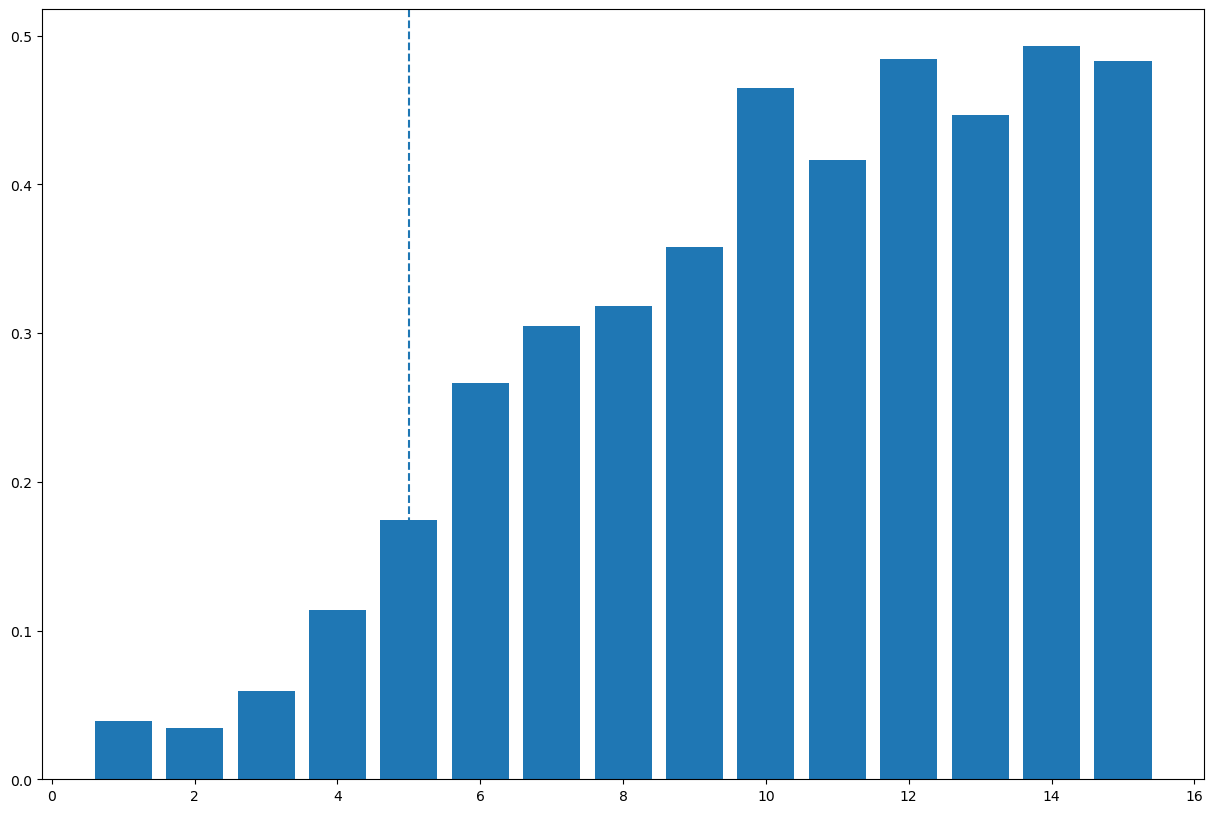

In [388]:
tmp = compare.groupby('ActCFRNumber')['Classification'].count().reset_index()
tmp = tmp.merge(compare[compare.Classification == 1].groupby('ActCFRNumber')['Classification'].count().reset_index(),
                how = 'left',
                on = 'ActCFRNumber')
tmp['OAIPerc'] = tmp['Classification_y']/tmp['Classification_x']
tmp = tmp.drop(['Classification_x','Classification_y'],axis=1)
tmp = tmp[tmp.ActCFRNumber<16]

plt.figure(figsize= (15,10))
plt.bar(tmp['ActCFRNumber'],tmp['OAIPerc'])
plt.axvline(5,linestyle='dashed')

In [398]:
compare['ActBins'] = pd.cut(compare['CitationCount'],bins = [-1e1000,-3.0,-2.0,-1.0,0,1,2,3,1e1000],labels=['<-3sigma','-3sigma','-2sigma','-1sigma','1sigma','2sigma','3sigma','>3sigma'])

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_31280\3264224659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = compare.groupby('ActBins')['Classification'].count().reset_index()
C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_31280\3264224659.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = tmp.merge(compare[compare.Classification == 1].groupby('ActBins')['Classification'].count().reset_index(),


<BarContainer object of 8 artists>

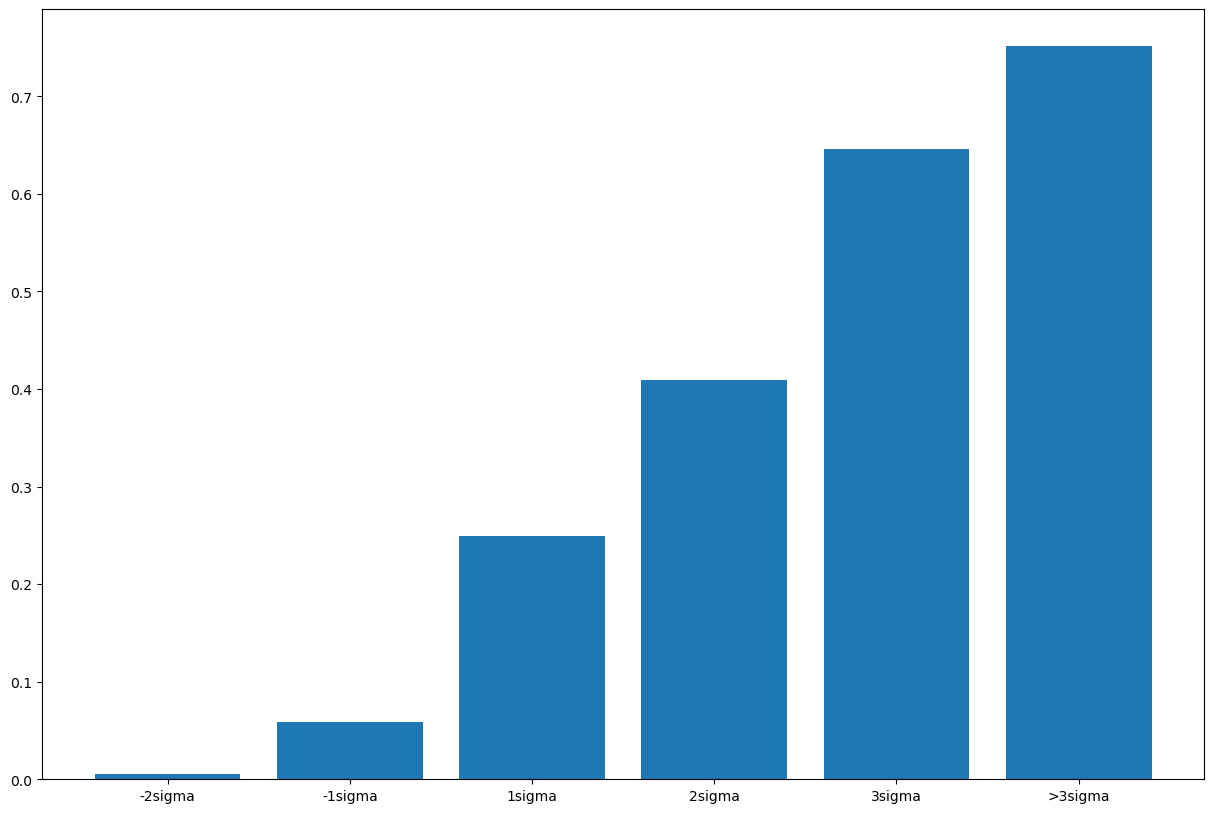

In [402]:
tmp = compare.groupby('ActBins')['Classification'].count().reset_index()
tmp = tmp.merge(compare[compare.Classification == 1].groupby('ActBins')['Classification'].count().reset_index(),
                how = 'left',
                on = 'ActBins')
tmp['OAIPerc'] = tmp['Classification_y']/tmp['Classification_x']
tmp = tmp.drop(['Classification_x','Classification_y'],axis=1)

plt.figure(figsize= (15,10))
plt.bar(tmp['ActBins'],tmp['OAIPerc'])


(array([183., 372., 303., 192.,  98.,  73.,  22.,   8.,   3.,   3.]),
 array([-1.03194872, -0.22006868,  0.59181137,  1.40369141,  2.21557146,
         3.0274515 ,  3.83933154,  4.65121159,  5.46309163,  6.27497168,
         7.08685172]),
 <BarContainer object of 10 artists>)

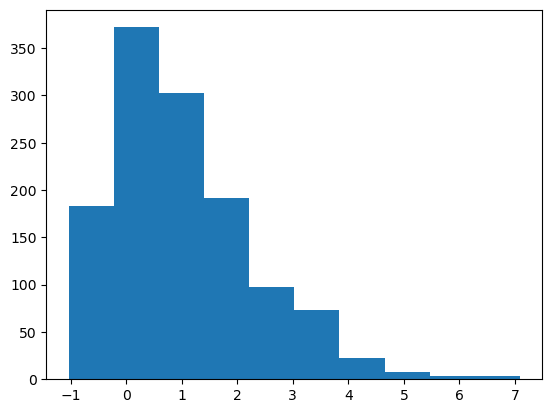

In [404]:
plt.hist(compare[compare.Classification == 1]['CitationCount'],bins = 10)

In [406]:
input_df['Classification'].value_counts(normalize=True)

Classification
0    0.834736
1    0.165264
Name: proportion, dtype: float64

In [411]:
citations

['21 CFR 211.67(a)',
 '21 CFR 211.42(c)(5)',
 '21 CFR 211.192',
 '21 CFR 211.165(e)',
 '21 CFR 211.22(c)']

In [413]:
glenmark[citations].values

array([[0.29575597, 0.4137931 , 0.2632486 , 0.30508475, 0.2384106 ]])

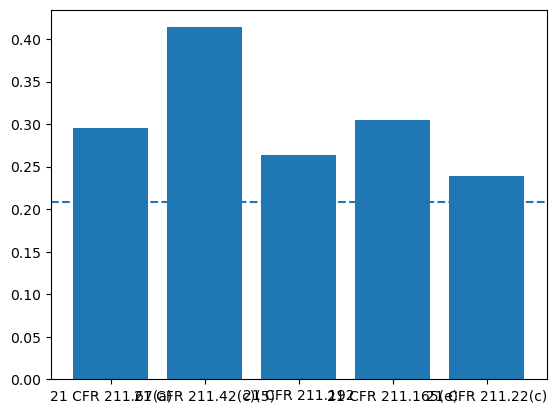

In [424]:
plt.bar(citations, glenmark[citations].values[0])
plt.axhline(0.2089, linestyle = 'dashed')

In [423]:
act_df.sort_values(by='OAI_weighted',ascending=False).iloc[175]

Classification
NAI               1.000000
OAI              61.000000
VAI             230.000000
Total           292.000000
OAI_weighted      0.208904
Name: 21 CFR 211.182, dtype: float64

In [432]:
tmp = compare[~compare[citations[1]].isin([0])][['Classification','ActCFRNumber']]
tmp[tmp.Classification == 0]['ActCFRNumber'].mean(),tmp[tmp.Classification == 1]['ActCFRNumber'].mean()

(6.647058823529412, 10.384615384615385)

In [545]:
data_df[data_df.ActCFRNumber == citations[1]]

InspectionID   FEINumber  \
740         1238749  3009883410   
1353        1225694  3010165256   
1542        1223081  1000125370   
2317        1208871  3004991673   
2892        1195342  3007450508   
3393        1181090  3009686761   
4755        1160527  3005000375   
5147        1155149  3014015976   
6000        1141073  3006900385   
6842        1114784  3001237145   
6974        1112956  3009415545   
7939        1099983     3021059   
8851        1086064  3014245821   
8928        1084910  3015252551   
10734       1058841  3014453293   
11515       1045211  3004713804   
12330       1034510  3004737602   
13843       1013117  3010959467   
14849       1001723  1000113165   
15085       1001351  3010490167   
15473        992993  3010164341   
15530        997027     1053383   
16174        983411  3006141618   
16239        988721     2027206   
16324        982348  3012124155   
24868        833727     2021236   
28806        769056     1641527   
28895        771045  3006286571   
31406        727470  1000125216   
35131        668619  3006039994   

                                               LegalName InspectionEndDate  \
740                    EUGIA Pharma Specialities Limited        2024-05-03   
1353                              Athea Laboratories Inc        2023-12-20   
1542        Universal Packaging Systems, Inc. dba PakLab        2023-11-17   
2317                        Bristol-Myers Squibb Company        2023-06-16   
2892                    Anicare Pharmaceuticals Pvt Ltd.        2023-01-20   
3393                Chartwell Pharmaceuticals Carmel LLC        2022-10-06   
4755                            Colorlab Cosmetics, Inc.        2022-01-06   
5147                            Verde Cosmetic Labs, LLC        2021-10-15   
6000                                    ALK-Abello, Inc.        2021-05-03   
6842                               OraLabs, Incorporated        2020-01-10   
6974                             Hada International S.A.        2019-12-12   
7939                              Tec Laboratories, Inc.        2019-08-09   
8851                            Nutrix International LLC        2019-04-11   
8928                           Invitrx Therapeutics Inc.        2019-04-03   
10734                                    PolarityTE, Inc        2018-07-13   
11515                    Coastal Contract Packaging, Inc        2018-03-22   
12330                          LEC Custom Products, Inc.        2017-12-08   
13843                          St. Gabriel Organics, LLC        2017-06-01   
14849                       Tropichem Research Labs, LLC        2017-02-14   
15085                                   Edge Pharma, LLC        2017-01-20   
15473                            Unit Dose Services, LLC        2016-11-08   
15530                              M&M Innovations, Inc.        2016-11-02   
16174  Town and Country Compounding and Consultation ...        2016-08-22   
16239                            Ari-Med Pharmaceuticals        2016-08-17   
16324  Creative Pharmacy Solutions Central LLC dba Ph...        2016-08-01   
24868                               B. Braun Medical Inc        2013-05-17   
28806                        Physicians Total Care, Inc.        2012-02-24   
28895                        Aidarex Pharmaceuticals LLC        2012-02-22   
31406  Titan Medical Enterprises, Inc. DBA U.S. Apoth...        2011-06-16   
35131                         Regenerative Sciences, LLC        2010-06-16   

      ProgramArea         ActCFRNumber                  ShortDescription  \
740         Drugs  21 CFR 211.42(c)(5)  Mfg / Processing Operations Area   
1353        Drugs  21 CFR 211.42(c)(5)  Mfg / Processing Operations Area   
1542        Drugs  21 CFR 211.42(c)(5)  Mfg / Processing Operations Area   
2317        Drugs  21 CFR 211.42(c)(5)  Mfg / Processing Operations Area   
2892        Drugs  21 CFR 211.42(c)(5)  Mfg / Processing Operations Area   
3393        Drugs  21 CFR 211.42(c)(5)  Mfg / 

In [611]:
vote.predict(glenmark)

array([1], dtype=int64)

In [612]:
logreg.predict_proba(glenmark)

array([[0.36513068, 0.63486932]])

In [613]:
rfc.predict_proba(glenmark)

array([[0.50414564, 0.49585436]])

## Adding to dataset

### Sun

In [89]:
fei = 3004561553
obs1 = 'There is a failure to thoroughly review any unexplained discrepancy and the failure ofa batch or any of its components to meet any of its specifications whether or not the batch has been ah eady distributed.'
obs2 = 'Equipment and utensils are not cleaned and maintained at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the dmg product.'
obs3 = 'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.'
obs4 = 'Procedures describing the handling of written and oral complaints related to diug products are deficiently written or followed.'
obs5 = 'An-Field Alert Report was not subinitted within three working days of receipt of information concerning significant chemical, physical, or other change or deterioration in a distributed drug product.'
obs6 = 'Reserve samples from representative sample lots or batches of drug products selected by acceptable statistical procedures are not examined visually at least once a year for evidence of deterioration.'

In [96]:
for obs in [obs1,obs2,obs3,obs4,obs5,obs6]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique())
    cfr = data_df[data_df['LongDescription'].isin(matches)]['NewCitation'].unique()
    print(obs)
    print(cfr)

There is a failure to thoroughly review any unexplained discrepancy and the failure ofa batch or any of its components to meet any of its specifications whether or not the batch has been ah eady distributed.
['21 CFR 211.192']
Equipment and utensils are not cleaned and maintained at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the dmg product.
['21 CFR 211.67(a)']
The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.
['21 CFR 211.22(d)']
Procedures describing the handling of written and oral complaints related to diug products are deficiently written or followed.
['21 CFR 211.198(a)']
An-Field Alert Report was not subinitted within three working days of receipt of information concerning significant chemical, physical, or other change or deterioration in a distributed drug product.
['21 CFR 314.81(b)(1)(ii)']
Reserve samples from representative sample lots 

In [475]:
citations = ['21 CFR 211.192','21 CFR 211.67(a)','21 CFR 211.22(d)','21 CFR 211.198(a)','21 CFR 314.81(b)(1)(ii)','21 CFR 211.170(b)']
act_df.loc[citations]

Classification             OAI     VAI   Total  OAI_weighted
NewCitation                                                 
21 CFR 211.192           484.0  1308.0  1792.0      0.270089
21 CFR 211.67(a)         209.0   498.0   707.0      0.295615
21 CFR 211.22(d)         386.0  1406.0  1792.0      0.215402
21 CFR 211.198(a)        167.0   537.0   704.0      0.237216
21 CFR 314.81(b)(1)(ii)   26.0   108.0   134.0      0.194030
21 CFR 211.170(b)         68.0   233.0   301.0      0.225914

In [476]:
sun =  pd.DataFrame(data = np.zeros(shape=(1,len(X_ros.columns))),columns = X_ros.columns, index = [1])

In [477]:
sun[citations] = act_df.loc[citations]['OAI_weighted']

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_30600\1557266423.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sun[citations] = act_df.loc[citations]['OAI_weighted']
C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_30600\1557266423.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sun[citations] = act_df.loc[citations]['OAI_weighted']


In [478]:
sun[citations].sum().sum()

1.4382657283415032

In [244]:
#sun['CountryArea'] = -1
sun['Year'] = 1
sun['CitationScore'] = [sun[citations].sum().sum()]
sun['ActCFRNumber'] = [len(citations)]
sun['CitationScore_mean'] = sun['CitationScore']/sun['ActCFRNumber']
sun['ActCFRNumber'] = ss_act.transform(sun[['ActCFRNumber']])
sun['CitationScore'] = ss.transform(sun[['CitationScore']])
sun['CitationScore_mean'] = ss_ccw.transform(sun[['CitationScore_mean']])

In [245]:
set(sun.columns) - set(X_ros.columns)

{'21 CFR 314.81(b)(1)(ii)'}

### Indico

In [99]:
fei = 3005124189
obs1 = 'Procedmes describing the handling of written and oral complaints related to drug products are deficiently written or followed.'
obs2 = 'Procedures designed to prevent microbiological contamination of drug products pmpo1ting to be sterile did not include adequate validation of the aseptic process.'
obs3 = 'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.'
obs4 = 'Procedures designed to prevent microbiological contamination of diug products pmpo1ting to be sterile are not established and followed.'
obs5 = 'Buildings used in the manufacturing, processing, packing and holding of a drng product are not maintained in a good state of repair.'
obs6 = 'Aseptic processing areas are deficient regarding the system for monitoring environmental conditions.'
obs7 = 'Determinations of conformance to appropriate written specifications for acceptance are deficient for inprocess materials.'

In [100]:
for obs in [obs1,obs2,obs3,obs4,obs5,obs6,obs7]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique())
    cfr = data_df[data_df['LongDescription'].isin(matches)]['NewCitation'].unique()
    print(obs)
    print(cfr)

Procedmes describing the handling of written and oral complaints related to drug products are deficiently written or followed.
['21 CFR 211.198(a)']
Procedures designed to prevent microbiological contamination of drug products pmpo1ting to be sterile did not include adequate validation of the aseptic process.
['21 CFR 211.113(b)']
The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.
['21 CFR 211.22(d)']
Procedures designed to prevent microbiological contamination of diug products pmpo1ting to be sterile are not established and followed.
['21 CFR 211.113(b)']
Buildings used in the manufacturing, processing, packing and holding of a drng product are not maintained in a good state of repair.
['21 CFR 211.58']
Aseptic processing areas are deficient regarding the system for monitoring environmental conditions.
['21 CFR 211.42(c)(10)(iv)' '21 CFR 211.42(c)(10)(v)']
Determinations of conformance to appropriate written specifications

In [106]:
data_df[data_df.NewCitation == '21 CFR 211.160(b)(2)']['LongDescription'].unique()

array(['Samples taken of in-process materials for determination of conformance to specifications are not representative.',
       'In-process samples are not representative.',
       'Determinations of conformance to appropriate written specifications for acceptance are not made for in-process materials.',
       'The specifications for in-process materials are deficient in that they do not include a description of the sampling plan for in-process materials.',
       'Determinations of conformance to appropriate written specifications for acceptance are deficient for in-process materials.',
       'Laboratory controls do not include a determination of conformance to written  specifications  for in-process materials.',
       'In-process samples are not properly identified.',
       'Samples taken of in-process materials for determination of conformance to specifications are not properly identified.',
       'In-process samples are not representative and properly identified .',
       '

In [479]:
citations = ['21 CFR 211.198(a)','21 CFR 211.113(b)','21 CFR 211.22(d)','21 CFR 211.113(b)','21 CFR 211.58','21 CFR 211.42(c)(10)(iv)','21 CFR 211.160(b)(2)']
act_df.loc[citations]

Classification              OAI     VAI   Total  OAI_weighted
NewCitation                                                  
21 CFR 211.198(a)         167.0   537.0   704.0      0.237216
21 CFR 211.113(b)         281.0   239.0   520.0      0.540385
21 CFR 211.22(d)          386.0  1406.0  1792.0      0.215402
21 CFR 211.113(b)         281.0   239.0   520.0      0.540385
21 CFR 211.58              59.0   185.0   244.0      0.241803
21 CFR 211.42(c)(10)(iv)  219.0   132.0   351.0      0.623932
21 CFR 211.160(b)(2)       16.0    37.0    53.0      0.301887

In [480]:
tmp =  pd.DataFrame(data = np.zeros(shape=(1,len(X_ros.columns))),columns = X_ros.columns, index = [2])
tmp[citations] = act_df.loc[citations]['OAI_weighted']
#tmp['CountryArea'] = -1
tmp['Year'] = 1
print(tmp[citations].sum().sum())
tmp['CitationScore'] = [tmp[citations].sum().sum()]
tmp['ActCFRNumber'] = [len(citations)]
tmp['CitationScore_mean'] = tmp['CitationScore']/tmp['ActCFRNumber']
tmp['ActCFRNumber'] = ss_act.transform(tmp[['ActCFRNumber']])
tmp['CitationScore'] = ss.transform(tmp[['CitationScore']])
tmp['CitationScore_mean'] = ss_ccw.transform(tmp[['CitationScore_mean']])

2.701008620647404


C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_30600\1033187991.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp[citations] = act_df.loc[citations]['OAI_weighted']


In [256]:
indico =tmp

### Granules

In [108]:
fei = 3004097901
obs1 = 'Equipment and utensils are not cleaned at appropriate intervals to prevent that would alter the safety, identity, strength, quality or purity ofthe drug product.'
obs2 = 'There is a failure to thoroughly review any unexplained discrepancy and the failure of a batch or any of its components to meet any ofits specifications whether or not the batch has been already distributed.'
obs3 = 'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.'
obs4 = 'The process of material from the commonly performed during routine manufacturing, including containing drug products for the US market, has not been adequately assessed to ensure that material obtained from this process is of suitable quality prior to further processing.'
obs5 = 'Written procedures are not followed that describe the in-process controls to be conducted on appropriate samples of in-process materials of each batch.'
obs6 = 'Building and facilities are not maintained to ensure that products manufactured meet the quality, purity, charactersitics, identity and strength which they purport.'

In [126]:
for obs in [obs1,obs2,obs3,obs4,obs5,obs6]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique(),n=2)
    cfr = data_df[data_df['LongDescription'].isin(matches)]['NewCitation'].unique()
    print(obs)
    print(cfr)

Equipment and utensils are not cleaned at appropriate intervals to prevent that would alter the safety, identity, strength, quality or purity ofthe drug product.
['21 CFR 211.67(a)']
There is a failure to thoroughly review any unexplained discrepancy and the failure of a batch or any of its components to meet any ofits specifications whether or not the batch has been already distributed.
['21 CFR 211.192']
The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.
['21 CFR 211.22(d)']
The process of material from the commonly performed during routine manufacturing, including containing drug products for the US market, has not been adequately assessed to ensure that material obtained from this process is of suitable quality prior to further processing.
[]
Written procedures are not followed that describe the in-process controls to be conducted on appropriate samples of in-process materials of each batch.
['21 CFR 211.110(a)']
Buildi

In [138]:
data_df[data_df.NewCitation =='21 CFR 211.22(d)']['LongDescription'].unique()

array(['The responsibilities and procedures applicable to the quality control unit are not fully followed.',
       'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed.',
       'The responsibilities and procedures applicable to the quality control unit are not in writing.',
       'The responsibilities and procedures applicable to the quality control unit are not in writing. Electronic records are used, but they do not meet requirements to ensure that they are trustworthy, reliable and generally equivalent to paper records.',
       'The responsibilities and procedures applicable to the quality control unit are not in writing and fully followed. Electronic records are used, but they do not meet requirements to ensure that they are trustworthy, reliable and generally equivalent to paper records.',
       'The responsibilities and procedures applicable to the quality control unit are not. Electronic records are used, but they

In [257]:
citations = ['21 CFR 211.67(a)','21 CFR 211.192','21 CFR 211.22(d)','21 CFR 211.68(a)','21 CFR 211.110(a)','21 CFR 211.58']
act_df.loc[citations]

Classification       OAI     VAI   Total  OAI_weighted
NewCitation                                           
21 CFR 211.67(a)   209.0   498.0   707.0      0.295615
21 CFR 211.192     484.0  1308.0  1792.0      0.270089
21 CFR 211.22(d)   386.0  1406.0  1792.0      0.215402
21 CFR 211.68(a)   118.0   417.0   535.0      0.220561
21 CFR 211.110(a)  189.0   547.0   736.0      0.256793
21 CFR 211.58       59.0   185.0   244.0      0.241803

In [258]:
tmp =  pd.DataFrame(data = np.zeros(shape=(1,len(X_ros.columns))),columns = X_ros.columns, index = [3])
tmp[citations] = act_df.loc[citations]['OAI_weighted']
#tmp['CountryArea'] = -1
tmp['Year'] = 1
tmp['CitationScore'] = [tmp[citations].sum().sum()]
tmp['ActCFRNumber'] = [len(citations)]
tmp['CitationScore_mean'] = tmp['CitationScore']/tmp['ActCFRNumber']
tmp['ActCFRNumber'] = ss_act.transform(tmp[['ActCFRNumber']])
tmp['CitationScore'] = ss.transform(tmp[['CitationScore']])
tmp['CitationScore_mean'] = ss_ccw.transform(tmp[['CitationScore_mean']])

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_30600\113579760.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp[citations] = act_df.loc[citations]['OAI_weighted']


In [259]:
granules = tmp

### Zhejiang Huahai

In [68]:
obs1 = 	'Equipment and utensils are not cleaned at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the drug product.'
obs2 = 'Procedures designed to prevent microbiological contamination of drug products purporting to be sterile do not include adequate validation of the sterilization process.'
obs3 = 'There are no written procedures for production and process controls designed to assure that the drug products have the identity, strength, quality, and purity they purport or are represented to possess.'
obs4 = 'There is a failure to thoroughly review any unexplained discrepancy or the failure of a batch or any of its components to meet any of its specifications whether or not the batch has been already distributed.'
obs5 = 'Aseptic processing areas are deficient regarding systems for maintaining any equipment used to control the aseptic conditions.'
obs6 = 'Laboratory controls do not include the establishment of scientifically sound and appropriate test procedures designed to assure that drug products conform to appropriate standards of identity, strength, quality and purity.'
obs7 = 'The quality control unit lacks authority to review production records to assure that no errors have occurred.'


In [70]:
for obs in [obs1,obs2,obs3,obs4,obs5,obs6,obs7]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique(),n=2)
    cfr = data_df[data_df['LongDescription'].isin(matches)]['NewCitation'].unique()
    print(obs)
    print(matches)
    print(cfr)

Equipment and utensils are not cleaned at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the drug product.
['Equipment and utensils are not cleaned at appropriate intervals to prevent contamination that would alter the safety, identity, strength, quality or purity of the drug product.', 'Equipment and utensils are not cleaned at appropriate intervals to  prevent contamination that would alter the safety, identity, strength, quality or purity of the drug product.']
['21 CFR 211.67(a)']
Procedures designed to prevent microbiological contamination of drug products purporting to be sterile do not include adequate validation of the sterilization process.
['Procedures designed to prevent microbiological contamination of drug products purporting to be sterile do not include adequate validation of the sterilization process.', 'Procedures designed to prevent microbiological contamination of drug products purporting to be ster

In [163]:
citations = ['21 CFR 211.67(a)','21 CFR 211.113(b)','21 CFR 211.100(a)','21 CFR 211.192','21 CFR 211.42(c)(10)(vi)','21 CFR 211.160(b)','21 CFR 211.22(a)']
act_df.loc[citations]

Classification              OAI     VAI   Total  OAI_weighted
ActCFRNumber                                                 
21 CFR 211.67(a)          209.0   498.0   707.0      0.295615
21 CFR 211.113(b)         401.0   399.0   800.0      0.501250
21 CFR 211.100(a)         351.0   960.0  1311.0      0.267735
21 CFR 211.192            563.0  1577.0  2140.0      0.263084
21 CFR 211.42(c)(10)(vi)   46.0    24.0    70.0      0.657143
21 CFR 211.160(b)         283.0   820.0  1103.0      0.256573
21 CFR 211.22(a)          191.0   445.0   636.0      0.300314

In [83]:
act_df['OAI'].sum()/act_df['Total'].sum(),act_df['OAI_weighted'].mean()

(0.26886128983989227, 0.23600012996354497)

In [164]:
act_wl_df.loc[citations]

ActionType                        Warning Letter   Total  WL_weighted
ActCFRNumber                                                         
21 CFR 211.67(a)           665.0            42.0   707.0     0.059406
21 CFR 211.113(b)          752.0            48.0   800.0     0.060000
21 CFR 211.100(a)         1251.0            60.0  1311.0     0.045767
21 CFR 211.192            2044.0            96.0  2140.0     0.044860
21 CFR 211.42(c)(10)(vi)    68.0             2.0    70.0     0.028571
21 CFR 211.160(b)         1047.0            56.0  1103.0     0.050771
21 CFR 211.22(a)           585.0            51.0   636.0     0.080189

In [76]:
tmp =  pd.DataFrame(data = np.zeros(shape=(1,len(X_ros.columns))),columns = X_ros.columns, index = [3])
tmp[citations] = act_df.loc[citations]['OAI_weighted']
#tmp['CountryArea'] = -1
tmp['Year'] = 1
tmp['CitationScore'] = [tmp[citations].sum().sum()]
tmp['ActCFRNumber'] = [len(citations)]
tmp['CitationScore_mean'] = tmp['CitationScore']/tmp['ActCFRNumber']
tmp['ActCFRNumber'] = ss_act.transform(tmp[['ActCFRNumber']])
tmp['CitationScore'] = ss.transform(tmp[['CitationScore']])
tmp['CitationScore_mean'] = ss_ccw.transform(tmp[['CitationScore_mean']])

C:\Users\christopher.johnson\AppData\Local\Temp\ipykernel_21572\113579760.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp[citations] = act_df.loc[citations]['OAI_weighted']


In [77]:
zhejiang = tmp

In [78]:
rfc.predict_proba(zhejiang)

array([[0.22635457, 0.77364543]])

In [79]:
logreg.predict_proba(zhejiang)

array([[0.04533205, 0.95466795]])

### Mayne

In [115]:
obs1 = 	'Laboratory controls do not include the establishment of scientifically sound and appropriate test procedures designed to assure that components and drug products conform to appropriate standards of identity, strength, quality and purity.'
obs2 = 'Your firm failed to establish adequate written procedures for production and process controls designed to assure that the drug products have the identity, strength, purity, and quality that they are purported or represented to possess.'

In [116]:
for obs in [obs1,obs2]:
    matches = get_close_matches(obs,data_df["LongDescription"].unique(),n=2)
    cfr = data_df[data_df['LongDescription'].isin(matches)]['NewCitation'].unique()
    print(obs)
    print(matches)
    print(cfr)

Laboratory controls do not include the establishment of scientifically sound and appropriate test procedures designed to assure that components and drug products conform to appropriate standards of identity, strength, quality and purity.
['Laboratory controls do not include the establishment of scientifically sound and appropriate test procedures designed to assure that components and drug products conform to appropriate standards of identity, strength, quality and purity.', 'Laboratory controls do not include the establishment of scientifically sound and appropriate test procedures designed to assure that components and drug product containers conform to appropriate standards of identity, strength, quality and purity.']
['21 CFR 211.160(b)']
Your firm failed to establish adequate written procedures for production and process controls designed to assure that the drug products have the identity, strength, purity, and quality that they are purported or represented to possess.
['Your firm

In [179]:
citations = ['21 CFR 211.160(b)','21 CFR 211.100(a)']
act_df.loc[citations]

Classification       OAI    VAI  Total  OAI_weighted
ActCFRNumber                                        
21 CFR 211.160(b)  168.0  324.0  492.0      0.341463
21 CFR 211.100(a)  202.0  308.0  510.0      0.396078

## ROS Test

In [338]:
X_ros ,y_ros =  input_df[top_200_features].loc[ros_test_id], input_df['Classification'].loc[ros_test_id]

In [339]:
new_df = pd.concat([sun,granules,indico]).drop('21 CFR 314.81(b)(1)(ii)',axis=1)
X_ros = pd.concat([X_ros,new_df])

In [340]:
y_new = pd.DataFrame(data = [1,1,1],columns = ['Classification'],index = [1,2,3])
y_ros = pd.concat([y_ros,y_new])

In [341]:
y_ros_all = y_ros.copy()

### RFC

In [342]:
y_ros_pred = rfc.predict(X_ros)

Accuracy: 0.8285714285714286
F1: 0.5714285714285714
Recall: 1.0
Precision: 0.4


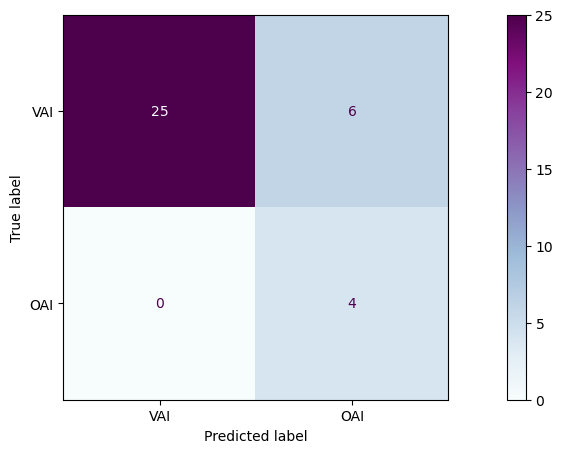

In [323]:
acc, f1, rec, prec = make_results(y_ros,y_ros_pred)

In [582]:
29/(25+6+4)

0.8285714285714286

In [343]:
y_ros_all['RFC'] = y_ros_pred

### LOGREG

In [344]:
y_ros_pred = logreg.predict(X_ros)

Accuracy: 0.8
F1: 0.5333333333333333
Recall: 1.0
Precision: 0.36363636363636365


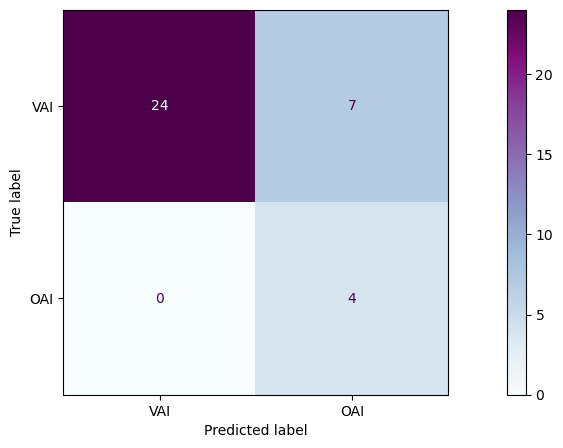

In [336]:
acc, f1, rec, prec = make_results(y_ros,y_ros_pred)

In [345]:
y_ros_all['LOG'] = y_ros_pred

### KNN

Accuracy: 0.8
F1: 0.5333333333333333
Recall: 1.0
Precision: 0.36363636363636365


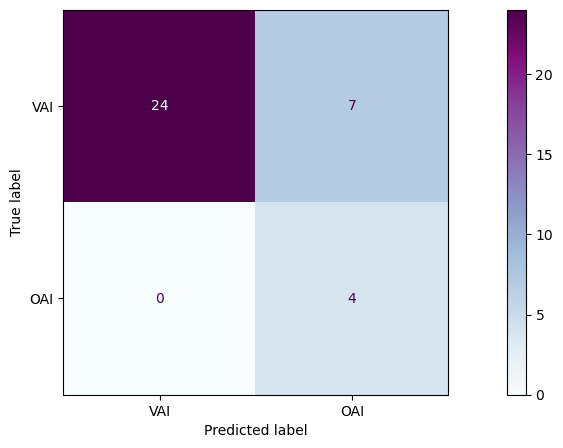

In [346]:
y_ros_pred = kn.predict(X_ros)
acc, f1, rec, prec = make_results(y_ros,y_ros_pred)

In [347]:
y_ros_all['KNN'] = y_ros_pred

### SVC

Accuracy: 0.8857142857142857
F1: 0.6
Recall: 0.75
Precision: 0.5


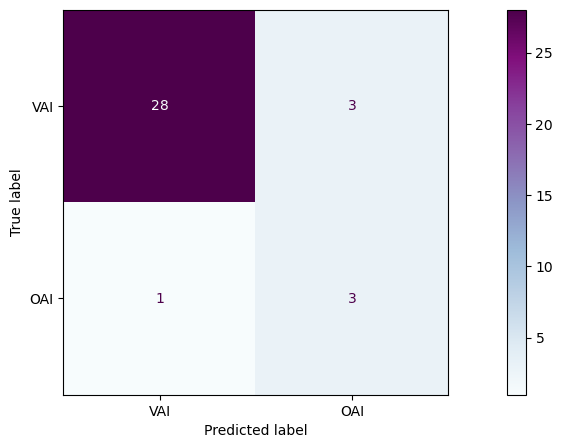

In [348]:
y_ros_pred = svc.predict(X_ros)
acc, f1, rec, prec = make_results(y_ros,y_ros_pred)

In [349]:
y_ros_all['SVC'] = y_ros_pred

### NN full sample

In [351]:
y_test_pred = []
y_test_prob = nn.predict(X_ros)
for i in range(len(y_test_prob)):
    if y_test_prob[i] > 0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

2/2 [==============================] - 0s 4ms/step


Accuracy: 0.8
F1: 0.5333333333333333
Recall: 1.0
Precision: 0.36363636363636365


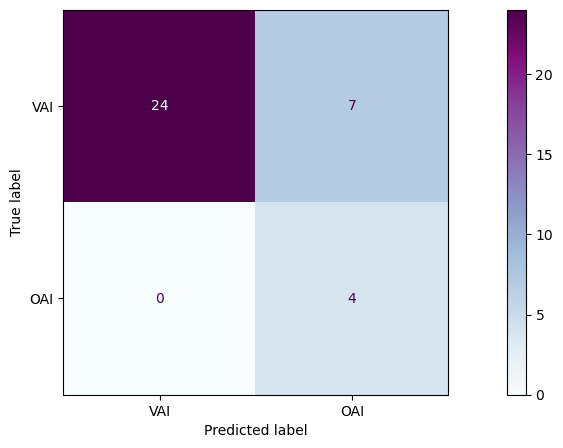

In [312]:
acc, f1, rec, prec = make_results(y_ros,y_test_pred)

In [352]:
y_ros_all['NN'] = y_test_pred

In [357]:
y_ros_all.merge(X_ros[['CitationScore','ActCFRNumber']],how='left',on=y_ros_all.index)

key_0  Classification  RFC  LOG  KNN  SVC  NN  CitationScore  \
0   1232512               0    0    0    0    0   0      -0.936217   
1   1228546               1    1    1    1    1   1       0.682176   
2   1229060               0    0    0    0    0   0      -0.896149   
3   1229061               0    0    0    0    0   0      -0.821578   
4   1244548               0    0    0    0    0   0      -0.584866   
5   1248645               0    0    0    0    0   0      -0.953176   
6   1230475               0    0    0    0    0   0      -0.933961   
7   1241485               0    0    0    0    0   0      -0.844632   
8   1229588               0    0    0    0    0   0      -0.869836   
9   1243288               0    1    1    1    0   1      -0.074957   
10  1252505               0    0    0    0    0   0      -0.220576   
11  1238809               0    0    0    0    0   0      -0.539569   
12  1250459               0    1    1    1    0   1       0.023973   
13  1230374               0    0    1    0    0   1      -0.187819   
14  1240110               0    0    0    0    0   0      -0.437425   
15  1232947               0    0    0    0    0   0      -0.654642   
16  1243575               0    0    0    0    0   0      -0.644046   
17  1232189               0    0    0    0    0   0      -0.455196   
18  1230144               0    1    1    1    1   1       1.137187   
19  1226951               0    0    0    0    0   0      -0.821578   
20  1249609               0    0    0    0    0   0      -0.182163   
21  1234389               0    0    0    0    0   0      -0.887862   
22  1252181               0    0    0    0    0   0      -0.979782   
23  1235038               0    0    0    0    0   0      -0.925324   
24  1232735               0    0    0    0    0   0      -1.008073   
25  1239007               0    0    0    1    0   0      -0.289080   
26  1230058               0    1    1    1    1   1       0.876468   
27  1240940               0    0    0    0    0   0      -0.213862   
28  1240813               0    1    1    1    1   1       0.805078   
29  1251950               0    0    0    0    0   0      -0.191822   
30  1251315               0    1    1    1    0   1       0.053653   
31  1239037               0    0    0    0    0   0      -0.946290   
32        1               1    1    1    1    0   1       0.122654   
33        2               1    1    1    1    1   1       0.173887   
34        3               1    1    1    1    1   1       1.166125   

    ActCFRNumber  
0      -0.722409  
1       0.574115  
2      -0.981714  
3      -0.981714  
4      -0.722409  
5      -0.981714  
6      -0.722409  
7      -0.981714  
8      -0.981714  
9       0.055505  
10     -0.203800  
11     -0.722409  
12      0.314810  
13     -0.203800  
14     -0.463105  
15     -0.722409  
16     -0.722409  
17     -0.203800  
18      0.833420  
19     -0.981714  
20      0.055505  
21     -0.981714  
22     -0.981714  
23     -0.981714  
24     -0.722409  
25     -0.203800  
26      0.833420  
27     -0.203800  
28      0.314810  
29     -0.203800  
30      0.055505  
31     -0.722409  
32      0.314810  
33      0.314810  
34      0.574115

# Overlap

In [2802]:
fei_ros_df

FEINumber          NDC SubmittingSupplier BusinessType  \
0      1000022237  62559015710                Ani          API   
1      1000022237  62559015730                Ani          API   
2      1000022237  68682020175      Bausch Health          API   
3      1000110912  66993019594             Prasco          API   
4      1000110912  66993019594             Prasco          FDF   
...           ...          ...                ...          ...   
21201  3027620173  00781802801             Sandoz          FDF   
21202         360  42806026695            Puracap          API   
21203         360  42806026793            Puracap          API   
21204         360  42806027095            Puracap          API   
21205         360  42806027193            Puracap          API   

                                                 Address  
0      355 Louisiana Highway 3142, Hahnville, Louisia...  
1      355 Louisiana Highway 3142, Hahnville, Louisia...  
2      355 Louisiana Highway 3142, Hahnville, Louisia...  
3      160 N Pharma Drive, Morrisville, North Carolin...  
4      160 N Pharma Drive, Morrisville, North Carolin...  
...                                                  ...  
21201  Plot No.8-A 1/1, TTC Industrial Area, Kalwe Bl...  
21202  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21203  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21204  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21205  Rue Grands Navoirs, Chauny,  F-02300, France (...  

[21206 rows x 5 columns]

In [2812]:
sum_df = pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH'])].groupby('SupplierFamilyName').agg({'VolumeByUnit': ['sum'], 'COGS': ['sum'], 'NDC':['nunique']})

In [2814]:
pseudo_df['NDC'] = pseudo_df['NDC'].apply(lambda x: ros.fix_ndc(str(x)))
fei_ros_df['NDC'] = fei_ros_df['NDC'].apply(lambda x: ros.fix_ndc(str(x)))

In [2815]:
fei_ros_df

FEINumber          NDC SubmittingSupplier BusinessType  \
0      1000022237  62559015710                Ani          API   
1      1000022237  62559015730                Ani          API   
2      1000022237  68682020175      Bausch Health          API   
3      1000110912  66993019594             Prasco          API   
4      1000110912  66993019594             Prasco          FDF   
...           ...          ...                ...          ...   
21201  3027620173  00781802801             Sandoz          FDF   
21202         360  42806026695            Puracap          API   
21203         360  42806026793            Puracap          API   
21204         360  42806027095            Puracap          API   
21205         360  42806027193            Puracap          API   

                                                 Address  
0      355 Louisiana Highway 3142, Hahnville, Louisia...  
1      355 Louisiana Highway 3142, Hahnville, Louisia...  
2      355 Louisiana Highway 3142, Hahnville, Louisia...  
3      160 N Pharma Drive, Morrisville, North Carolin...  
4      160 N Pharma Drive, Morrisville, North Carolin...  
...                                                  ...  
21201  Plot No.8-A 1/1, TTC Industrial Area, Kalwe Bl...  
21202  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21203  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21204  Rue Grands Navoirs, Chauny,  F-02300, France (...  
21205  Rue Grands Navoirs, Chauny,  F-02300, France (...  

[21206 rows x 5 columns]

In [2817]:
fdf_ndc_list = list(fei_ros_df[fei_ros_df.BusinessType == 'FDF']['NDC'].unique())
api_ndc_list = list(fei_ros_df[fei_ros_df.BusinessType == 'API']['NDC'].unique())

In [2819]:
fdf_df = pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (pseudo_df['NDC'].isin(fdf_ndc_list))].groupby('SupplierFamilyName').agg({'VolumeByUnit': ['sum'], 'COGS': ['sum'], 'NDC':['nunique']})
api_df = pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (pseudo_df['NDC'].isin(api_ndc_list))].groupby('SupplierFamilyName').agg({'VolumeByUnit': ['sum'], 'COGS': ['sum'], 'NDC':['nunique']})

In [2821]:
sum_df = sum_df.merge(fdf_df,
                how = 'left',
                on = 'SupplierFamilyName',
                suffixes=('','_FDF'))

sum_df = sum_df.merge(api_df,
                how = 'left',
                on = 'SupplierFamilyName',
                suffixes=('','_API'))

In [2822]:
sum_df

VolumeByUnit          COGS     NDC VolumeByUnit_FDF  \
                             sum           sum nunique              sum   
SupplierFamilyName                                                        
Acella              1.369501e+08  1.804086e+07      32     1.199147e+05   
Advagen Pharm       1.542541e+09  4.791861e+07      94     1.204429e+09   
Ajanta Pharma L     3.195723e+08  1.974876e+07      53     3.143136e+08   
Alembic             1.262106e+09  6.226530e+07     193     1.007554e+09   
Alvogen             3.273951e+08  4.848753e+07      29     3.273951e+08   
...                          ...           ...     ...              ...   
Xiromed             3.803669e+08  6.263449e+07      46     3.803669e+08   
Xttrium             1.519790e+09  9.424335e+06       3     1.163031e+09   
Yaral Pharma        7.231258e+06  1.423619e+07      13     7.231258e+06   
Zydus               4.118649e+09  4.293533e+08     264     4.104730e+09   
i3 Pharmaceuticals  6.713567e+05  9.516022e+05       3     6.713567e+05   

                        COGS_FDF NDC_FDF VolumeByUnit_API      COGS_API  \
                             sum nunique              sum           sum   
SupplierFamilyName                                                        
Acella              1.563099e+05     1.0     1.199147e+05  1.563099e+05   
Advagen Pharm       4.466611e+07    79.0     1.204429e+09  4.466611e+07   
Ajanta Pharma L     1.945326e+07    51.0     3.143136e+08  1.945326e+07   
Alembic             4.996492e+07   168.0     1.007554e+09  4.996492e+07   
Alvogen             4.848753e+07    29.0     3.273951e+08  4.848753e+07   
...                          ...     ...              ...           ...   
Xiromed             6.263449e+07    46.0     3.803669e+08  6.263449e+07   
Xttrium             3.911024e+06     1.0     1.163031e+09  3.911024e+06   
Yaral Pharma        1.423619e+07    13.0     7.231258e+06  1.423619e+07   
Zydus               4.257947e+08   261.0     4.104730e+09  4.257947e+08   
i3 Pharmaceuticals  9.516022e+05     3.0     6.713567e+05  9.516022e+05   

                   NDC_API  
                   nunique  
SupplierFamilyName          
Acella                 1.0  
Advagen Pharm         79.0  
Ajanta Pharma L       51.0  
Alembic              168.0  
Alvogen               29.0  
...                    ...  
Xiromed               46.0  
Xttrium                1.0  
Yaral Pharma          13.0  
Zydus                261.0  
i3 Pharmaceuticals     3.0  

[108 rows x 9 columns]

In [2825]:
sum_df.columns

MultiIndex([(    'VolumeByUnit',     'sum'),
            (            'COGS',     'sum'),
            (             'NDC', 'nunique'),
            ('VolumeByUnit_FDF',     'sum'),
            (        'COGS_FDF',     'sum'),
            (         'NDC_FDF', 'nunique'),
            ('VolumeByUnit_API',     'sum'),
            (        'COGS_API',     'sum'),
            (         'NDC_API', 'nunique')],
           )

In [2828]:
sum_df.sort_values(by=[('VolumeByUnit','sum')],ascending=False).head(50)[('VolumeByUnit','sum')].sum()/sum_df.sort_values(by=[('VolumeByUnit','sum')],ascending=False)[('VolumeByUnit','sum')].sum()

0.971501699332279

In [2829]:
sum_top50_df = sum_df.sort_values(by=[('VolumeByUnit','sum')],ascending=False).head(50)

In [2832]:
sum_top50_df.to_excel('tmp.xlsx')

In [2840]:
fdf_prod_list_df = pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (~pseudo_df['NDC'].isin(fdf_ndc_list))].groupby(['SupplierFamilyName','NDC','RedOakKey','GCN','ProductDesc','ProductFamily'])[['VolumeByUnit','COGS']].sum().reset_index()
api_prod_list_df = pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (~pseudo_df['NDC'].isin(api_ndc_list))].groupby(['SupplierFamilyName','NDC','RedOakKey','GCN','ProductDesc','ProductFamily'])[['VolumeByUnit','COGS']].sum().reset_index()

In [2841]:
import xlsxwriter

In [2842]:
writer = pd.ExcelWriter('tmp.xlsx', engine='xlsxwriter')
sum_top50_df.to_excel(writer, sheet_name = "Sum", index=True)
api_prod_list_df.to_excel(writer, sheet_name = "APIList", index=False)
fdf_prod_list_df.to_excel(writer, sheet_name = "FDFList", index=False)
writer.close()

In [2848]:
pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (pseudo_df['NDC'].isin(list(set(fdf_ndc_list).intersection(set(api_ndc_list)))))][['VolumeByUnit','COGS']].sum()

VolumeByUnit    7.951714e+10
COGS            5.734938e+09
dtype: float64

In [2849]:
pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (pseudo_df['NDC'].isin(list(set(fdf_ndc_list).intersection(set(api_ndc_list)))))][['NDC']].nunique()

NDC    6174
dtype: int64

In [ ]:
pseudo_df[pseudo_df['ROSContractType'].isin(['P','PS','PSA','WH']) & (~pseudo_df['NDC'].isin(list(set(fdf_ndc_list) - set(api_ndc_list))))][['VolumeByUnit','COGS']].sum()

VolumeByUnit   -2.467552e+09
COGS           -3.864028e+08
dtype: float64

# Inspection Timing

In [14]:
fda_drugs_details_df

FEINumber                         LegalName          City  \
149     3032055537            Kalyani Khandare, MBBS          Pune   
279        2242239             James Alexander Corp.    Blairstown   
312        1410004         Hobart Laboratories, Inc.       Bemidji   
316     1000122198           WuXi Advanced Therapies  Philadelphia   
319     3021904887                      OREAN BEAUTY        Hobart   
...            ...                               ...           ...   
308751  3004668525              McKesson Corporation       Livonia   
308755  3001576784  Morehouse School Of Medicine-IRB       Atlanta   
308757     2650031                          Olay LLC         Cayey   
308758     2515238                 Eurofins QC, Inc.   Southampton   
308759     2410924                     Pfizer,  Inc.      Brooklyn   

               State    Zip    CountryArea  FiscalYear  InspectionID  \
149                -      -          India        2025       1262093   
279       New Jersey  07825  United States        2025       1262031   
312        Minnesota  56601  United States        2025       1261592   
316     Pennsylvania  19112  United States        2025       1262215   
319          Indiana  46342  United States        2025       1262470   
...              ...    ...            ...         ...           ...   
308751      Michigan  48150  United States        2009        540709   
308755       Georgia  30310  United States        2009        542064   
308757   Puerto Rico  00736  United States        2009        542404   
308758  Pennsylvania  18966  United States        2009        542811   
308759      New York  11206  United States        2009        542816   

       PostedCitations InspectionEndDate Classification  \
149                 No        2025-02-14            NAI   
279                 No        2025-02-10            NAI   
312                 No        2025-02-07            NAI   
316                 No        2025-02-07            NAI   
319                 No        2025-02-07            NAI   
...                ...               ...            ...   
308751              No        2008-10-01            VAI   
308755              No        2008-10-01            NAI   
308757              No        2008-10-01            OAI   
308758              No        2008-10-01            VAI   
308759              No        2008-10-01            NAI   

                   ProjectArea ProductType  
149     Bioresearch Monitoring       Drugs  
279     Drug Quality Assurance       Drugs  
312     Drug Quality Assurance       Drugs  
316     Drug Quality Assurance       Drugs  
319     Drug Quality Assurance       Drugs  
...                        ...         ...  
308751  Drug Quality Assurance       Drugs  
308755  Bioresearch Monitoring       Drugs  
308757  Drug Quality Assurance       Drugs  
308758  Drug Quality Assurance       Drugs  
308759  Drug Quality Assurance       Drugs  

[36176 rows x 13 columns]

In [15]:
insp_cnts_df = fda_drugs_details_df.groupby('FEINumber')['InspectionEndDate'].nunique().reset_index()

<Axes: title={'center': 'Inspection Counts'}, xlabel='InspectionEndDate'>

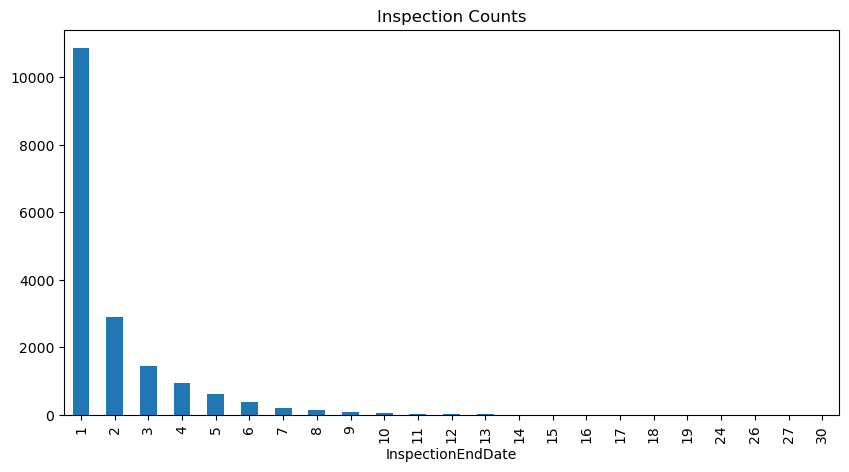

In [19]:
insp_cnts_df['InspectionEndDate'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title='Inspection Counts')

In [88]:
data_timing_df = fda_drugs_details_df[fda_drugs_details_df.ProjectArea == "Drug Quality Assurance"]
data_timing_df = data_timing_df.merge(insp_cnts_df,
                                      how='left',
                                      on = 'FEINumber',
                                      suffixes = ('','_cnts'))
data_timing_df = data_timing_df[data_timing_df.InspectionEndDate_cnts > 1]

In [89]:
timing_df = data_timing_df[['FEINumber','InspectionEndDate']].drop_duplicates().sort_values(by=['FEINumber','InspectionEndDate'],ascending=False)
timing_df

FEINumber InspectionEndDate
3477   3032299571        2020-03-17
5922   3032299571        2018-08-22
11166  3032299571        2015-08-28
12863  3032299571        2014-09-19
14841  3032299571        2013-09-06
...           ...               ...
6874          405        2018-02-06
12787         405        2014-10-14
4632          360        2019-06-27
11059         360        2015-09-18
17536         360        2012-03-22

[19497 rows x 2 columns]

In [90]:
timing_shift_df = timing_df.groupby('FEINumber')[['InspectionEndDate']].shift(-1).reset_index()

In [91]:
timing_df = timing_df.reset_index().merge(timing_shift_df,
                              how = 'left',
                              on = 'index')

In [92]:
timing_df['delta'] = timing_df['InspectionEndDate_x'] - timing_df['InspectionEndDate_y']

In [93]:
timing_df = timing_df.merge(insp_cnts_df,
                how = 'left',
                on = 'FEINumber')

In [94]:
timing_df.columns = ['index','FEINumber','InspectionEndDate','LastInspectionEndDate','delta','NumInspections']

In [95]:
timing_df['delta'] = timing_df['delta'].apply(lambda x: x.days)

<Axes: title={'center': 'Avg gap between inspections'}, xlabel='NumInspections'>

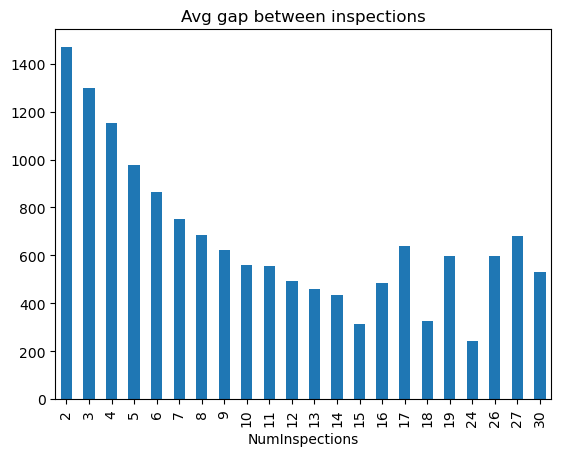

In [96]:
timing_df.groupby('NumInspections')['delta'].mean().sort_index().plot(kind = 'bar',title='Avg gap between inspections')

In [97]:
timing_df = timing_df.merge(fda_drugs_details_df[['FEINumber','CountryArea','Classification']].drop_duplicates(),
                how = 'left',
                on ='FEINumber')

<Axes: xlabel='CountryArea'>

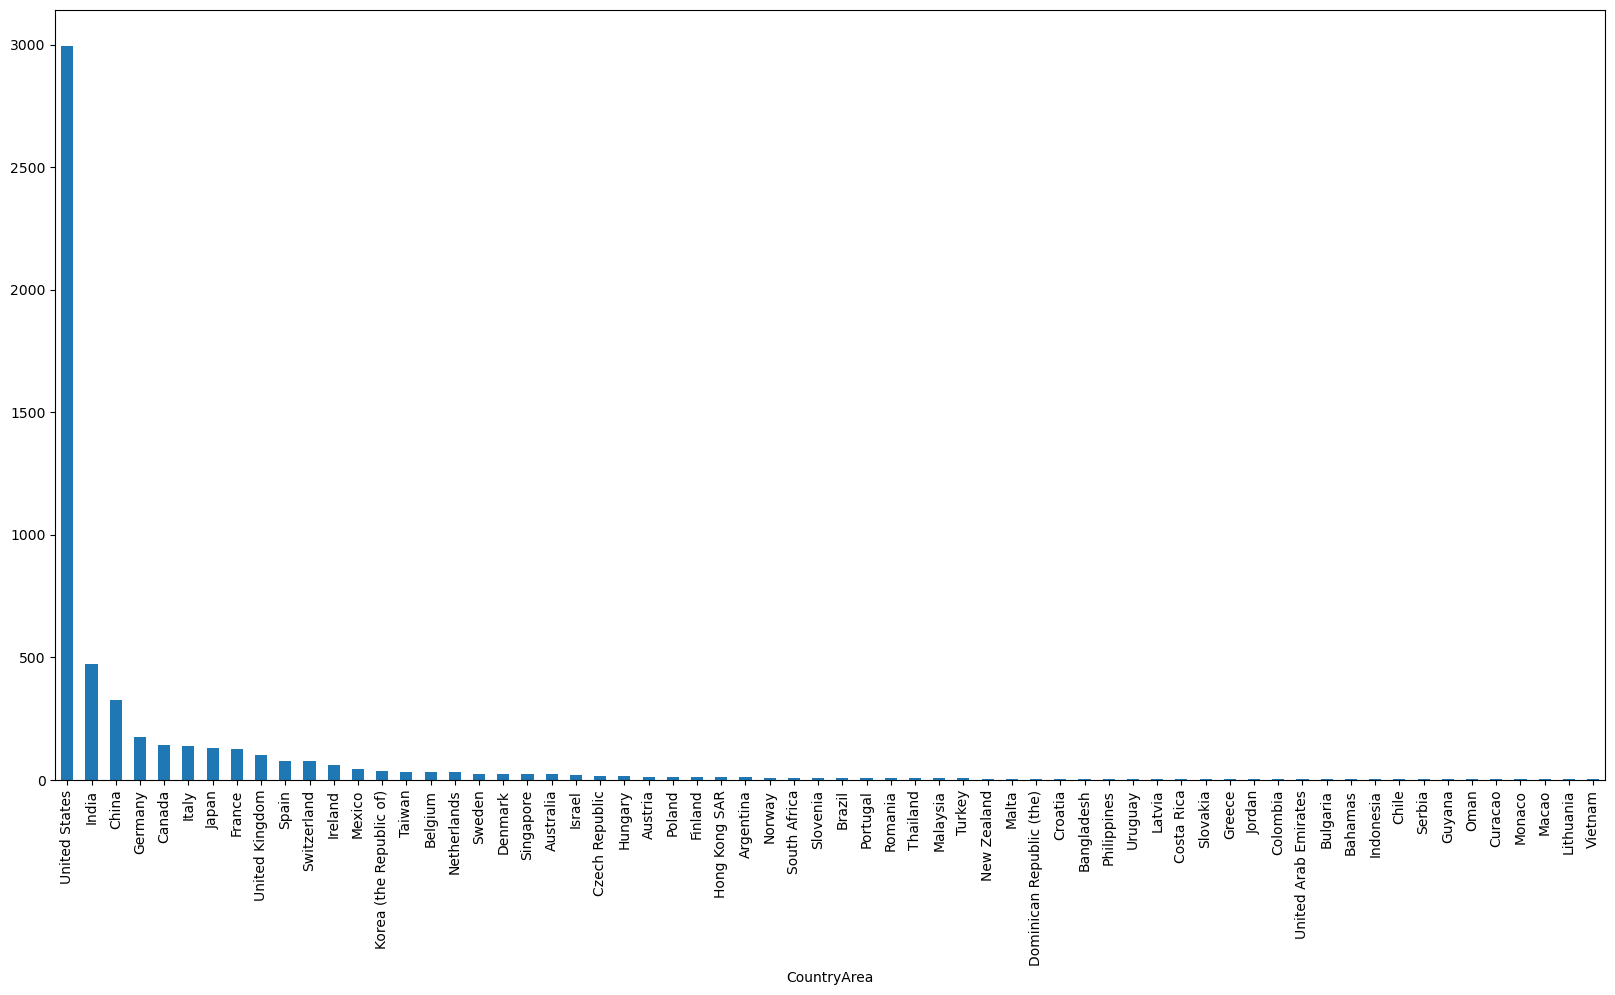

In [98]:
timing_df.groupby('CountryArea')['FEINumber'].nunique().sort_values(ascending=False).plot(kind = 'bar',figsize=(20,10))

In [99]:
timing_df['CountryArea_eff'] = timing_df['CountryArea'].apply(lambda x: x if x in ['United States','China','India'] else 'Other')

<Axes: xlabel='CountryArea_eff'>

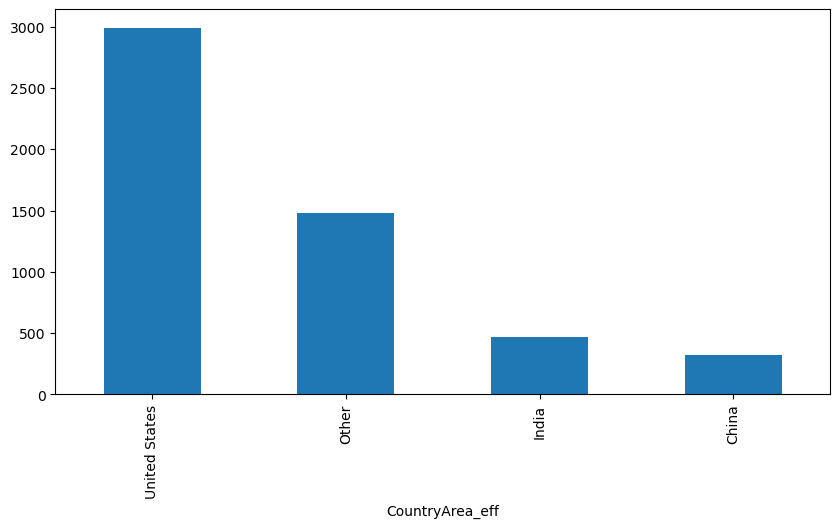

In [100]:
timing_df.groupby('CountryArea_eff')['FEINumber'].nunique().sort_values(ascending=False).plot(kind = 'bar',figsize=(10,5))

<Axes: xlabel='CountryArea_eff'>

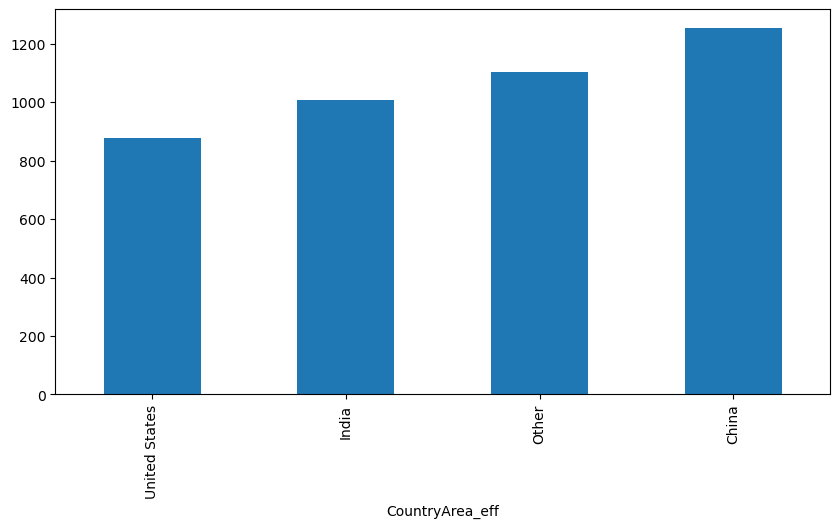

In [101]:
timing_df.groupby('CountryArea_eff')['delta'].mean().sort_values().plot(kind = 'bar',figsize=(10,5))

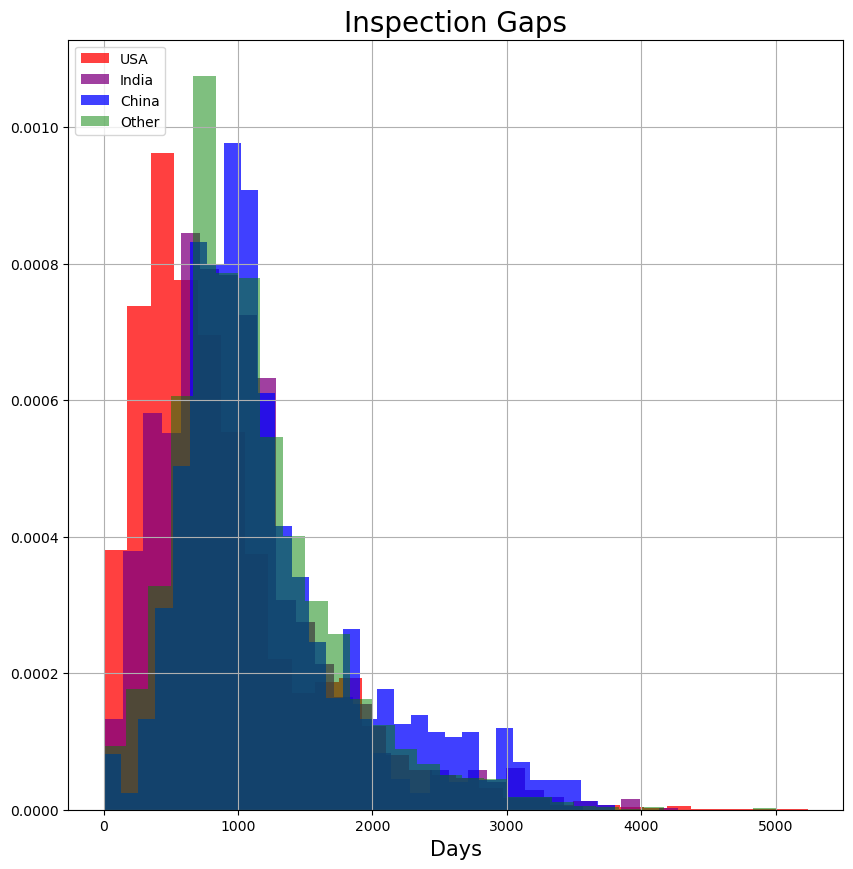

In [102]:
f, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Inspection Gaps',fontsize=20)
timing_df[(timing_df.CountryArea_eff == "United States") ]['delta'].hist(bins=30,color='red',stacked=True, density=True,alpha = 0.75,label = 'USA')
timing_df[(timing_df.CountryArea_eff == "India") ]['delta'].hist(bins=30,color='purple',stacked=True, density=True,alpha = 0.75,label = 'India')
timing_df[(timing_df.CountryArea_eff == "China") ]['delta'].hist(bins=30,color='blue',stacked=True, density=True,alpha = 0.75,label = 'China')
timing_df[(timing_df.CountryArea_eff == "Other") ]['delta'].hist(bins=30,color='green',stacked=True, density=True,alpha = 0.5,label = 'Other')


ax1.set_xlabel('Days',fontsize=15)
ax1.legend(loc = 'upper left')

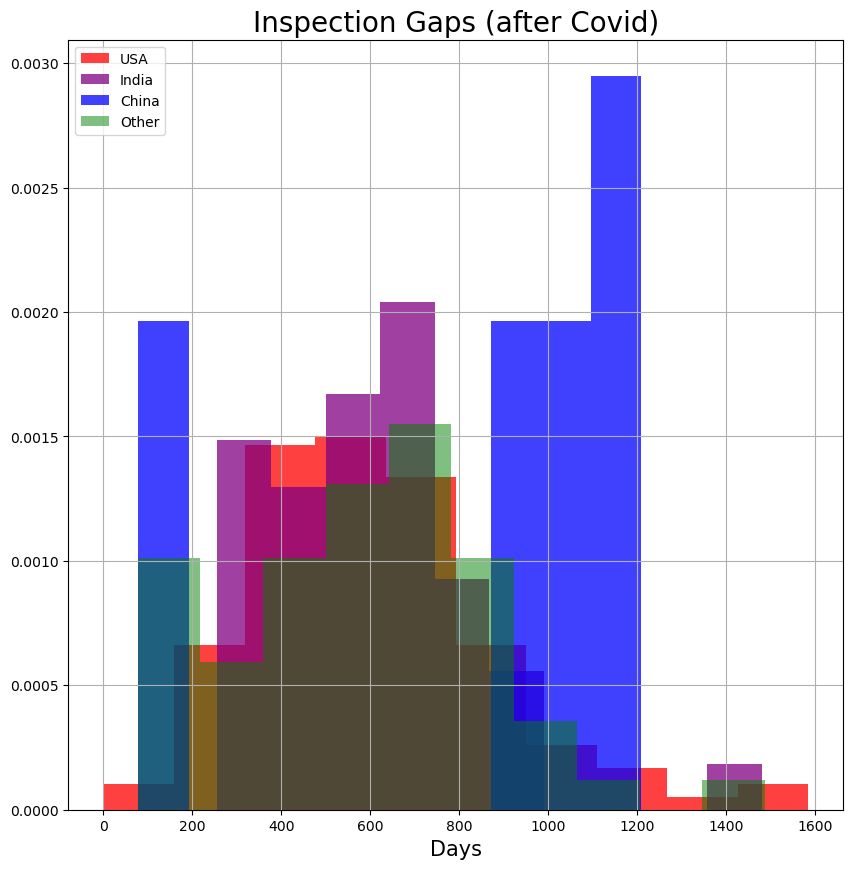

In [119]:
f, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Inspection Gaps (after Covid)',fontsize=20)
timing_df[(timing_df.CountryArea_eff == "United States") & (timing_df.LastInspectionEndDate >= pd.to_datetime('2020-03-15')) ]['delta'].hist(bins=10,color='red',stacked=True, density=True,alpha = 0.75,label = 'USA')
timing_df[(timing_df.CountryArea_eff == "India") & (timing_df.LastInspectionEndDate >= pd.to_datetime('2020-03-15'))]['delta'].hist(bins=10,color='purple',stacked=True, density=True,alpha = 0.75,label = 'India')
timing_df[(timing_df.CountryArea_eff == "China") & (timing_df.LastInspectionEndDate >= pd.to_datetime('2020-03-15'))]['delta'].hist(bins=10,color='blue',stacked=True, density=True,alpha = 0.75,label = 'China')
timing_df[(timing_df.CountryArea_eff == "Other") & (timing_df.LastInspectionEndDate >= pd.to_datetime('2020-03-15'))]['delta'].hist(bins=10,color='green',stacked=True, density=True,alpha = 0.5,label = 'Other')


ax1.set_xlabel('Days',fontsize=15)
ax1.legend(loc = 'upper left')

In [114]:
timing_df = timing_df.merge(fda_drugs_details_df[['FEINumber','InspectionEndDate','Classification']].drop_duplicates(),
                how = 'left',
                left_on = ['FEINumber','LastInspectionEndDate'],
                right_on = ['FEINumber','InspectionEndDate'],
                suffixes= ('','_last'))

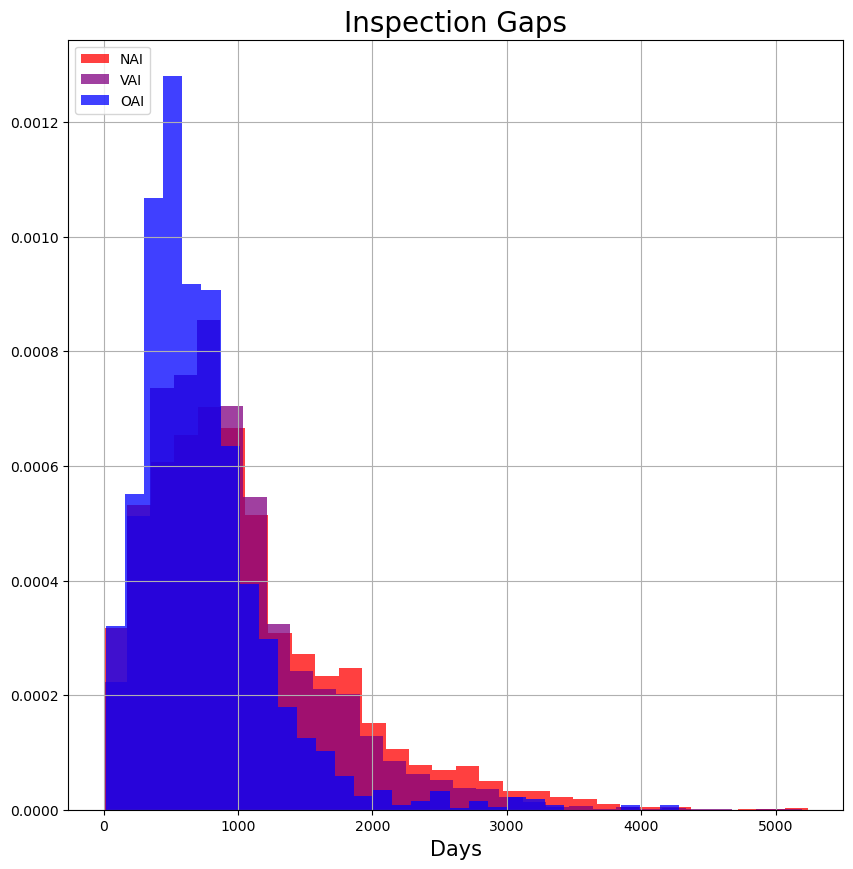

In [115]:
f, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Inspection Gaps',fontsize=20)
timing_df[(timing_df.Classification_last == "NAI") ]['delta'].hist(bins=30,color='red',stacked=True, density=True,alpha = 0.75,label = 'NAI')
timing_df[(timing_df.Classification_last == "VAI") ]['delta'].hist(bins=30,color='purple',stacked=True, density=True,alpha = 0.75,label = 'VAI')
timing_df[(timing_df.Classification_last == "OAI") ]['delta'].hist(bins=30,color='blue',stacked=True, density=True,alpha = 0.75,label = 'OAI')


ax1.set_xlabel('Days',fontsize=15)
ax1.legend(loc = 'upper left')

In [122]:
fda_drugs_details_df

FEINumber                         LegalName          City  \
149     3032055537            Kalyani Khandare, MBBS          Pune   
279        2242239             James Alexander Corp.    Blairstown   
312        1410004         Hobart Laboratories, Inc.       Bemidji   
316     1000122198           WuXi Advanced Therapies  Philadelphia   
319     3021904887                      OREAN BEAUTY        Hobart   
...            ...                               ...           ...   
308751  3004668525              McKesson Corporation       Livonia   
308755  3001576784  Morehouse School Of Medicine-IRB       Atlanta   
308757     2650031                          Olay LLC         Cayey   
308758     2515238                 Eurofins QC, Inc.   Southampton   
308759     2410924                     Pfizer,  Inc.      Brooklyn   

               State    Zip    CountryArea  FiscalYear  InspectionID  \
149                -      -          India        2025       1262093   
279       New Jersey  07825  United States        2025       1262031   
312        Minnesota  56601  United States        2025       1261592   
316     Pennsylvania  19112  United States        2025       1262215   
319          Indiana  46342  United States        2025       1262470   
...              ...    ...            ...         ...           ...   
308751      Michigan  48150  United States        2009        540709   
308755       Georgia  30310  United States        2009        542064   
308757   Puerto Rico  00736  United States        2009        542404   
308758  Pennsylvania  18966  United States        2009        542811   
308759      New York  11206  United States        2009        542816   

       PostedCitations InspectionEndDate Classification  \
149                 No        2025-02-14            NAI   
279                 No        2025-02-10            NAI   
312                 No        2025-02-07            NAI   
316                 No        2025-02-07            NAI   
319                 No        2025-02-07            NAI   
...                ...               ...            ...   
308751              No        2008-10-01            VAI   
308755              No        2008-10-01            NAI   
308757              No        2008-10-01            OAI   
308758              No        2008-10-01            VAI   
308759              No        2008-10-01            NAI   

                   ProjectArea ProductType  
149     Bioresearch Monitoring       Drugs  
279     Drug Quality Assurance       Drugs  
312     Drug Quality Assurance       Drugs  
316     Drug Quality Assurance       Drugs  
319     Drug Quality Assurance       Drugs  
...                        ...         ...  
308751  Drug Quality Assurance       Drugs  
308755  Bioresearch Monitoring       Drugs  
308757  Drug Quality Assurance       Drugs  
308758  Drug Quality Assurance       Drugs  
308759  Drug Quality Assurance       Drugs  

[36176 rows x 13 columns]

## Survival

In [123]:
fei_ros_list = fei_ros_df['FEINumber'].unique()

In [128]:
data_input_df = fei_ros_df[['FEINumber','BusinessType']].drop_duplicates().groupby('FEINumber')['BusinessType'].sum().reset_index()
data_input_df.head()

FEINumber BusinessType
0        360          API
1       1196          FDF
2       1379          API
3       1463          API
4       1545          API

In [130]:
data_input_df = data_input_df.merge(fda_drugs_details_df[fda_drugs_details_df.InspectionEndDate >= pd.to_datetime('2021-01-01')].groupby('FEINumber')['InspectionEndDate'].min().reset_index(),
                    how = 'left',
                    on = 'FEINumber')

In [131]:
data_input_df['InspectionEndDate'].isnull().sum()

393

In [135]:
data_input_df['FinalDate'] = len(data_input_df)*[pd.to_datetime('2025-03-11')]

In [157]:
data_input_df['Censored'] = data_input_df.apply(lambda x: False if pd.isna(x.InspectionEndDate) else True,axis=1)

In [162]:
data_input_df['delta'] = data_input_df['FinalDate'] - data_input_df['InspectionEndDate']
data_input_df['delta'] = data_input_df['delta'].apply(lambda x: x.days)

In [163]:
(pd.to_datetime('2025-03-11') - pd.to_datetime('2021-01-01')).days

1530

In [165]:
data_input_df['delta'] = data_input_df['delta'].fillna(1530)

In [170]:
data_input_df = data_input_df.merge(fda_drugs_details_df[['FEINumber','CountryArea']].drop_duplicates(),
                    how = 'left',
                    on = 'FEINumber')

In [191]:
tmp_cens = data_input_df[data_input_df.Censored == True]
tmp_cens = tmp_cens.merge(timing_df[['FEINumber','InspectionEndDate','Classification_last']].drop_duplicates(),
                how = 'left',
                on = ['FEINumber','InspectionEndDate'])
tmp_cens.columns = ['FEINumber', 'BusinessType', 'InspectionEndDate', 'FinalDate', 'Censored', 'delta',	'CountryArea', 'Classification']

In [192]:
tmp_uncens = data_input_df[data_input_df.Censored == False]
rec_class_df = timing_df.groupby('FEINumber')['InspectionEndDate'].max().reset_index()
rec_class_df = rec_class_df.merge(timing_df[['FEINumber','InspectionEndDate','Classification']].drop_duplicates(),
                                  how = 'inner',
                                  on = ['FEINumber','InspectionEndDate'])
tmp_uncens = tmp_uncens.merge(rec_class_df.groupby('FEINumber')['Classification'].sum(),
                              how = 'left',
                              on = ['FEINumber'])

In [194]:
data_input_df = pd.concat([tmp_cens,tmp_uncens])

In [195]:
data_input_df

FEINumber BusinessType InspectionEndDate  FinalDate  Censored   delta  \
0          1196          FDF        2023-06-28 2025-03-11      True   622.0   
1          1463          API        2022-02-11 2025-03-11      True  1124.0   
2       1010370          FDF        2022-06-23 2025-03-11      True   992.0   
3       1017687          FDF        2021-09-15 2025-03-11      True  1273.0   
4       1033964          FDF        2024-04-19 2025-03-11      True   326.0   
..          ...          ...               ...        ...       ...     ...   
388  3018369072          API               NaT 2025-03-11     False  1530.0   
389  3022275118          FDF               NaT 2025-03-11     False  1530.0   
390  3023338181          API               NaT 2025-03-11     False  1530.0   
391  3024366553          FDF               NaT 2025-03-11     False  1530.0   
392  3027620173          FDF               NaT 2025-03-11     False  1530.0   

       CountryArea Classification  
0            Italy            VAI  
1           France            VAI  
2    United States            NAI  
3    United States            NaN  
4    United States            NAI  
..             ...            ...  
388            NaN            NaN  
389            NaN            NaN  
390            NaN            NaN  
391            NaN            NaN  
392            NaN            NaN  

[967 rows x 8 columns]

In [203]:
stats_df = fda_drugs_details_df[(fda_drugs_details_df.ProjectArea == 'Drug Quality Assurance') &
                     (fda_drugs_details_df.InspectionEndDate < pd.to_datetime('2020-03-01') ) & 
                     (fda_drugs_details_df.InspectionEndDate >= pd.to_datetime('2015-01-01'))].groupby('FEINumber').agg({'InspectionID': 'nunique', 'Classification': 'sum'}).reset_index()

In [209]:
stats_df = stats_df.merge(timing_df[(timing_df.InspectionEndDate < pd.to_datetime('2020-03-01')) & (timing_df.InspectionEndDate >= pd.to_datetime('2015-01-01'))].groupby('FEINumber')['delta'].mean().reset_index(),
                          how = 'left',
                          on = 'FEINumber')

In [212]:
stats_df.columns = ['FEINumber','NumInspections','ClassificationSums','AvgInspectionGap']

In [214]:
data_input_df = data_input_df.merge(stats_df,
                    how = 'left',
                    on = 'FEINumber')

In [217]:
data_input_df

FEINumber BusinessType InspectionEndDate  FinalDate  Censored   delta  \
0          1196          FDF        2023-06-28 2025-03-11      True   622.0   
1          1463          API        2022-02-11 2025-03-11      True  1124.0   
2       1010370          FDF        2022-06-23 2025-03-11      True   992.0   
3       1017687          FDF        2021-09-15 2025-03-11      True  1273.0   
4       1033964          FDF        2024-04-19 2025-03-11      True   326.0   
..          ...          ...               ...        ...       ...     ...   
962  3018369072          API               NaT 2025-03-11     False  1530.0   
963  3022275118          FDF               NaT 2025-03-11     False  1530.0   
964  3023338181          API               NaT 2025-03-11     False  1530.0   
965  3024366553          FDF               NaT 2025-03-11     False  1530.0   
966  3027620173          FDF               NaT 2025-03-11     False  1530.0   

       CountryArea Classification  NumInspections  ClassificationSums  \
0            Italy            VAI             3.0           VAIVAIVAI   
1           France            VAI             3.0           VAINAIVAI   
2    United States            NAI             1.0                 NAI   
3    United States            NaN             6.0  NAIVAINAIVAIVAINAI   
4    United States            NAI             3.0           NAIVAINAI   
..             ...            ...             ...                 ...   
962            NaN            NaN             NaN                 NaN   
963            NaN            NaN             NaN                 NaN   
964            NaN            NaN             NaN                 NaN   
965            NaN            NaN             NaN                 NaN   
966            NaN            NaN             NaN                 NaN   

     AvgInspectionGap  
0          585.666667  
1          660.000000  
2         1037.000000  
3          585.142857  
4          576.333333  
..                ...  
962               NaN  
963               NaN  
964               NaN  
965               NaN  
966               NaN  

[967 rows x 11 columns]

### Preprocessing

In [218]:
data_pre_df = data_input_df.copy()

In [220]:
data_pre_df = data_pre_df.drop(['InspectionEndDate','FinalDate'],axis=1)

In [219]:
data_pre_df['FDF'] = data_pre_df['BusinessType'].apply(lambda x: 1 if x == 'FDF' else 0) 
data_pre_df['API'] = data_pre_df['BusinessType'].apply(lambda x: 1 if x == 'API' else 0) 
data_pre_df = data_pre_df.drop('BusinessType',axis=1)

In [221]:
data_pre_df['US'] = data_pre_df['CountryArea'].apply(lambda x: 1 if x == 'United States' else 0)
data_pre_df['India'] = data_pre_df['CountryArea'].apply(lambda x: 1 if x == 'India' else 0)
data_pre_df['Other'] = data_pre_df['CountryArea'].apply(lambda x: 1 if x != 'United States' and x!= "India" else 0)
data_pre_df = data_pre_df.drop('CountryArea',axis=1)

In [226]:
data_pre_df['LastClassNAI'] = data_pre_df['Classification'].apply(lambda x: 1 if str(x).count('NAI') > 0 else 0 )
data_pre_df['LastClassVAI'] = data_pre_df['Classification'].apply(lambda x: 1 if str(x).count('VAI') > 0 else 0 )
data_pre_df['LastClassOAI'] = data_pre_df['Classification'].apply(lambda x: 1 if str(x).count('OAI') > 0 else 0 )
data_pre_df = data_pre_df.drop("Classification",axis=1)

In [228]:
data_pre_df['NAICount'] = data_pre_df['ClassificationSums'].apply(lambda x: str(x).count('NAI'))
data_pre_df['VAICount'] = data_pre_df['ClassificationSums'].apply(lambda x: str(x).count('VAI'))
data_pre_df['OAICount'] = data_pre_df['ClassificationSums'].apply(lambda x: str(x).count('OAI'))
data_pre_df = data_pre_df.drop('ClassificationSums',axis=1)

In [230]:
data_pre_df['NAICount_weighted'] = data_pre_df['NAICount']/data_pre_df['NumInspections']
data_pre_df['VAICount_weighted'] = data_pre_df['VAICount']/data_pre_df['NumInspections']
data_pre_df['OAICount_weighted'] = data_pre_df['OAICount']/data_pre_df['NumInspections']

In [231]:
data_pre_df

FEINumber  Censored   delta  NumInspections  AvgInspectionGap  FDF  API  \
0          1196      True   622.0             3.0        585.666667    1    0   
1          1463      True  1124.0             3.0        660.000000    0    1   
2       1010370      True   992.0             1.0       1037.000000    1    0   
3       1017687      True  1273.0             6.0        585.142857    1    0   
4       1033964      True   326.0             3.0        576.333333    1    0   
..          ...       ...     ...             ...               ...  ...  ...   
962  3018369072     False  1530.0             NaN               NaN    0    1   
963  3022275118     False  1530.0             NaN               NaN    1    0   
964  3023338181     False  1530.0             NaN               NaN    0    1   
965  3024366553     False  1530.0             NaN               NaN    1    0   
966  3027620173     False  1530.0             NaN               NaN    1    0   

     US  India  Other  LastClassNAI  LastClassVAI  LastClassOAI  NAICount  \
0     0      0      1             0             1             0         0   
1     0      0      1             0             1             0         1   
2     1      0      0             1             0             0         1   
3     1      0      0             0             0             0         3   
4     1      0      0             1             0             0         2   
..   ..    ...    ...           ...           ...           ...       ...   
962   0      0      1             0             0             0         0   
963   0      0      1             0             0             0         0   
964   0      0      1             0             0             0         0   
965   0      0      1             0             0             0         0   
966   0      0      1             0             0             0         0   

     VAICount  OAICount  NAICount_weighted  VAICount_weighted  \
0           3         0           0.000000           1.000000   
1           2         0           0.333333           0.666667   
2           0         0           1.000000           0.000000   
3           3         0           0.500000           0.500000   
4           1         0           0.666667           0.333333   
..        ...       ...                ...                ...   
962         0         0                NaN                NaN   
963         0         0                NaN                NaN   
964         0         0                NaN                NaN   
965         0         0                NaN                NaN   
966         0         0                NaN                NaN   

     OAICount_weighted  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
..                 ...  
962                NaN  
963                NaN  
964                NaN  
965                NaN  
966                NaN  

[967 rows x 19 columns]

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [235]:
minmax_columns = ['NumInspections','NAICount','VAICount','OAICount','AvgInspectionGap']
minmax = MinMaxScaler()
data_pre_df[minmax_columns] = minmax.fit_transform(data_pre_df[minmax_columns])

In [237]:
data_pre_df = data_pre_df.fillna(0)

In [238]:
data_pre_df

FEINumber  Censored   delta  NumInspections  AvgInspectionGap  FDF  API  \
0          1196      True   622.0        0.222222          0.135702    1    0   
1          1463      True  1124.0        0.222222          0.161932    0    1   
2       1010370      True   992.0        0.000000          0.294965    1    0   
3       1017687      True  1273.0        0.555556          0.135517    1    0   
4       1033964      True   326.0        0.222222          0.132409    1    0   
..          ...       ...     ...             ...               ...  ...  ...   
962  3018369072     False  1530.0        0.000000          0.000000    0    1   
963  3022275118     False  1530.0        0.000000          0.000000    1    0   
964  3023338181     False  1530.0        0.000000          0.000000    0    1   
965  3024366553     False  1530.0        0.000000          0.000000    1    0   
966  3027620173     False  1530.0        0.000000          0.000000    1    0   

     US  India  Other  LastClassNAI  LastClassVAI  LastClassOAI  NAICount  \
0     0      0      1             0             1             0  0.000000   
1     0      0      1             0             1             0  0.111111   
2     1      0      0             1             0             0  0.111111   
3     1      0      0             0             0             0  0.333333   
4     1      0      0             1             0             0  0.222222   
..   ..    ...    ...           ...           ...           ...       ...   
962   0      0      1             0             0             0  0.000000   
963   0      0      1             0             0             0  0.000000   
964   0      0      1             0             0             0  0.000000   
965   0      0      1             0             0             0  0.000000   
966   0      0      1             0             0             0  0.000000   

     VAICount  OAICount  NAICount_weighted  VAICount_weighted  \
0         0.6       0.0           0.000000           1.000000   
1         0.4       0.0           0.333333           0.666667   
2         0.0       0.0           1.000000           0.000000   
3         0.6       0.0           0.500000           0.500000   
4         0.2       0.0           0.666667           0.333333   
..        ...       ...                ...                ...   
962       0.0       0.0           0.000000           0.000000   
963       0.0       0.0           0.000000           0.000000   
964       0.0       0.0           0.000000           0.000000   
965       0.0       0.0           0.000000           0.000000   
966       0.0       0.0           0.000000           0.000000   

     OAICount_weighted  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
..                 ...  
962                0.0  
963                0.0  
964                0.0  
965                0.0  
966                0.0  

[967 rows x 19 columns]

In [242]:
y_df = data_pre_df[['Censored','delta','FEINumber']].set_index('FEINumber')
X_df = data_pre_df.drop(['Censored','delta'],axis=1).set_index('FEINumber')

In [252]:
y_rec = y_df.to_records(index=False)

In [319]:
from sksurv.nonparametric import kaplan_meier_estimator

In [321]:
X_df["US"] == 1

FEINumber
1196          False
1463          False
1010370        True
1017687        True
1033964        True
              ...  
3018369072    False
3022275118    False
3023338181    False
3024366553    False
3027620173    False
Name: US, Length: 967, dtype: bool

(0.0, 1.0)

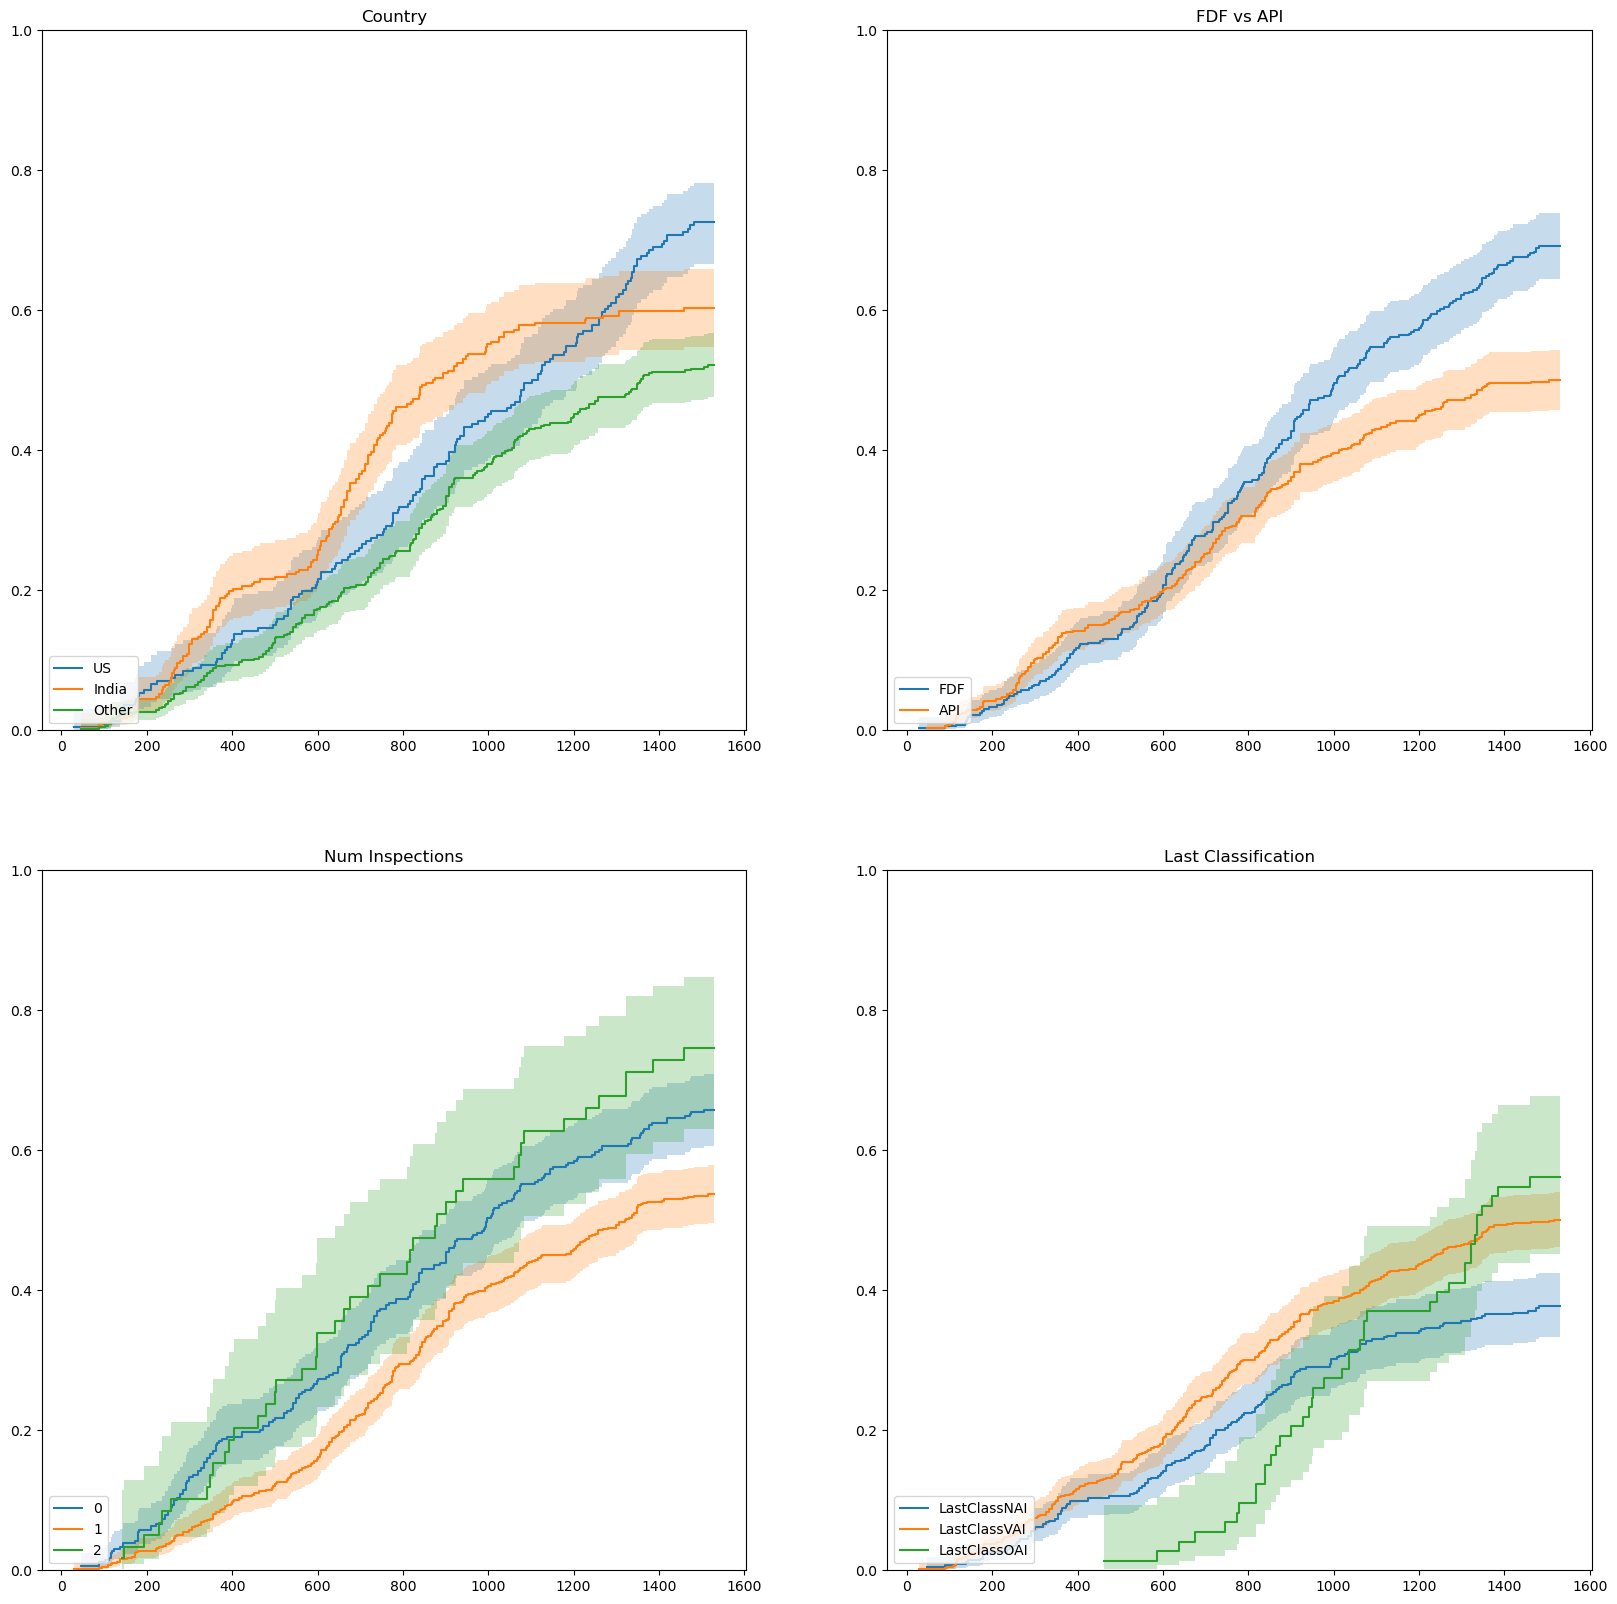

In [368]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

for country in ['US','India','Other']:

    mask_country = X_df[country] == 1
    time_country, survival_prob_country, conf_int = kaplan_meier_estimator(y_rec['Censored'][mask_country],
                                                                            y_rec['delta'][mask_country],
                                                                            conf_type="log-log")
    ax[0,0].step(time_country, 1-survival_prob_country, where="post", label = country)
    ax[0,0].fill_between(time_country, 1-conf_int[0], 1-conf_int[1], alpha = 0.25, step = 'post')
    ax[0,0].legend(loc= 'lower left')

ax[0,0].set_title('Country')
ax[0,0].set_ylim([0,1])

for country in ['FDF','API']:

    mask_country = X_df[country] == 1
    time_country, survival_prob_country, conf_int = kaplan_meier_estimator(y_rec['Censored'][mask_country],
                                                                            y_rec['delta'][mask_country],
                                                                            conf_type="log-log")
    ax[0,1].step(time_country, 1-survival_prob_country, where="post", label = country)
    ax[0,1].fill_between(time_country, 1-conf_int[0], 1-conf_int[1], alpha = 0.25, step = 'post')
    ax[0,1].legend(loc= 'lower left')

ax[0,1].set_title('FDF vs API')
ax[0,1].set_ylim([0,1])

for country in ['LastClassNAI','LastClassVAI','LastClassOAI']:

    mask_country = X_df[country] == 1
    time_country, survival_prob_country, conf_int = kaplan_meier_estimator(y_rec['Censored'][mask_country],
                                                                            y_rec['delta'][mask_country],
                                                                            conf_type="log-log")
    ax[1,1].step(time_country, 1-survival_prob_country, where="post", label = country)
    ax[1,1].fill_between(time_country,1- conf_int[0], 1-conf_int[1], alpha = 0.25, step = 'post')
    ax[1,1].legend(loc= 'lower left')

ax[1,1].set_title('Last Classification')
ax[1,1].set_ylim([0,1])


windows = [0,0.1,0.3,0.5,1]
for i in range(3):

    mask_country1 = (X_df["NumInspections"] >= windows[i]) 
    mask_country2 = ( X_df["NumInspections"][mask_country1] < windows[i+1])
    time_country, survival_prob_country, conf_int = kaplan_meier_estimator(y_rec['Censored'][mask_country1][mask_country2],
                                                                            y_rec['delta'][mask_country1][mask_country2],
                                                                            conf_type="log-log")
    ax[1,0].step(time_country, 1-survival_prob_country, where="post", label = i)
    ax[1,0].fill_between(time_country, 1-conf_int[0], 1-conf_int[1], alpha = 0.25, step = 'post')
    ax[1,0].legend(loc= 'lower left')

ax[1,0].set_title('Num Inspections')
ax[1,0].set_ylim([0,1])

In [257]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_rec,test_size=0.2)

In [263]:
csa = CoxPHSurvivalAnalysis()
csa.fit(X_train,y_train)

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=8.25677e-18): result may not be accurate.
  delta = solve(
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=3.75543e-18): result may not be accurate.
  delta = solve(
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=2.28085e-17): result may not be accurate.
  delta = solve(
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=7.57985e-18): result may not be accurate.
  delta = solve(
c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\sksurv\linear_model\coxph.py:449: LinAlgWarning: Ill-conditioned matrix (rcond=3.41703e-17): result may not 

CoxPHSurvivalAnalysis()

In [264]:
from sksurv.metrics import concordance_index_censored

In [268]:
train_pred = csa.predict(X_train)
result = concordance_index_censored(y_train['Censored'],y_train['delta'],train_pred)
print(result)

(0.6779981808143437, 170583, 80957, 221, 0)


In [271]:
train_pred.mean(), train_pred.std()

(50.37021898223125, 0.7447240988416426)

In [272]:
from sksurv.ensemble import RandomSurvivalForest

In [314]:
rsf = RandomSurvivalForest(min_samples_split=2, min_samples_leaf=2,n_estimators=2000)
rsf.fit(X_train,y_train)

RandomSurvivalForest(min_samples_leaf=2, min_samples_split=2, n_estimators=2000)

In [315]:
train_pred = rsf.predict(X_train)
result = concordance_index_censored(y_train['Censored'],y_train['delta'],train_pred)
print(result)

(0.863725914657155, 217342, 34198, 221, 0)


In [316]:
test_pred = rsf.predict(X_test)
result = concordance_index_censored(y_test['Censored'],y_test['delta'],test_pred)
print(result)

(0.7702003226673837, 11440, 3401, 35, 0)


In [317]:
surv = rsf.predict_survival_function(X_test, return_array=True)

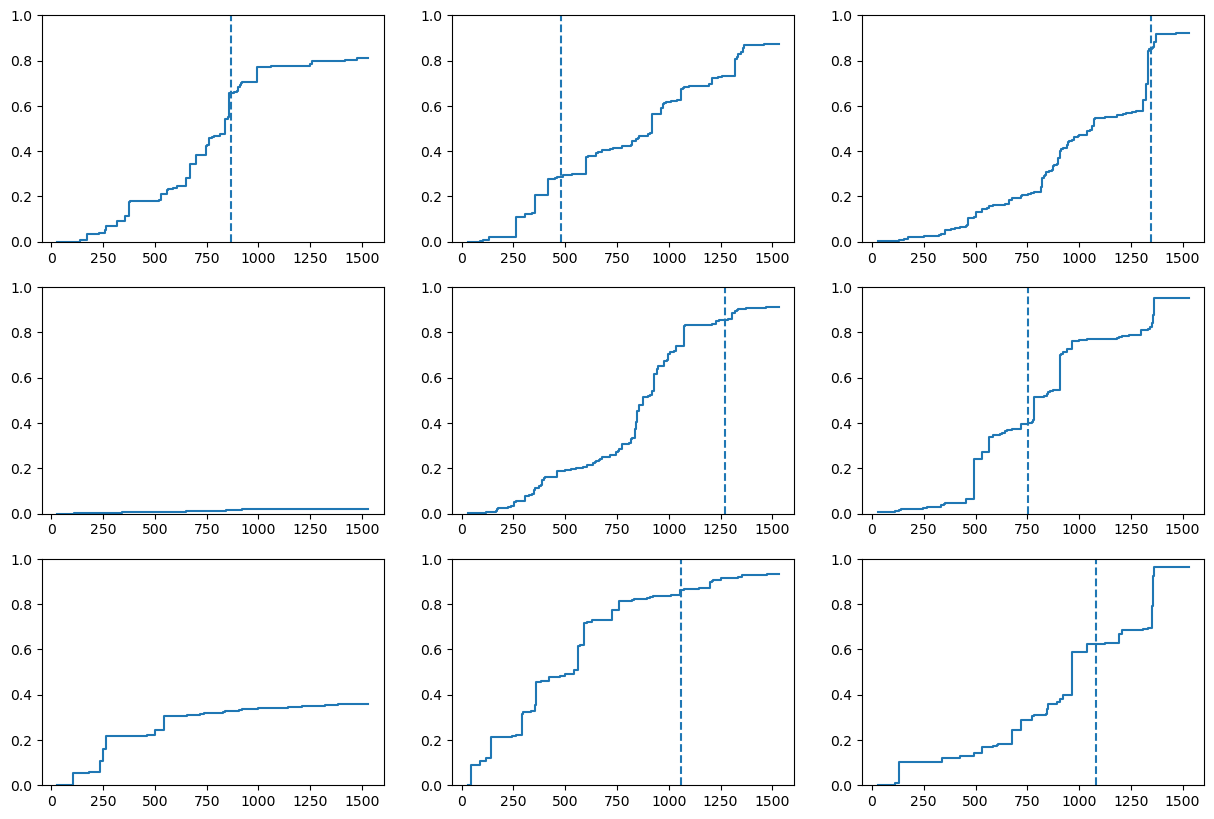

In [366]:
fig, ax = plt.subplots(3,3,figsize=(15,10))

for i, s in enumerate(surv[:9]):
    row = i %3
    col = int(np.floor(i/3))
    
    ax[row,col].step(rsf.unique_times_, 1-s, where="post", label=str(i))
    if y_test[i][1]!= 1530:
        ax[row,col].axvline(y_test[i][1],linestyle='dashed')
    ax[row,col].set_ylim([0,1])

#plt.legend(loc='lower left')
    

# Solco Zhejiang Inspection 

In [7]:
solco_df = pd.read_excel("2025.5.06 - Zhejiang Huahai Pharmaceutical FDA Inspection (By Facility).xlsx",sheet_name = 'Portfolio')

c:\Users\christopher.johnson\Anaconda3\envs\Py310\lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
solco_df.columns = solco_df.iloc[1]
solco_df = solco_df.iloc[2:]

In [12]:
solco_z_df = solco_df[solco_df.Site == 'Xunqiao']

In [20]:
solco_z_df.groupby('Supplier').agg({"NDC":['nunique'], "ROS Packs":['sum'], "ROS COGS":['sum'], "Total 1% Change AWP":['sum'], "Total 5% Change AWP":['sum'], 'Switch to Highest DNPP':['sum'] })

1                    NDC       ROS Packs         ROS COGS Total 1% Change AWP  \
                 nunique             sum              sum                 sum   
Supplier                                                                        
Ani                    1      851.666667    236577.387328         6019.665167   
Breckenridge           3  1844826.259259   6886745.676357     12339924.826922   
Dr.Reddys              7        165213.6    908721.611493        597780.38082   
Lannett                3   241066.277778   1184886.271589         419902.9569   
Solco Healthcare      61  5032858.219083  14286071.336923     31479184.400242   
Upsher Smith           2    69216.791425    507791.910761       234790.405517   
Wilshire               1     7097.222222    254790.277778           43447.775   

1                Total 5% Change AWP Switch to Highest DNPP  
                                 sum                    sum  
Supplier                                                     
Ani                     30098.325833            4214.329339  
Breckenridge         61699624.134611           11893.011927  
Dr.Reddys               2988901.9041          211510.595254  
Lannett                 2099514.7845          199311.248678  
Solco Healthcare    157395922.001209         3534895.153701  
Upsher Smith          1173952.027583           23380.061223  
Wilshire                  217238.875           89515.844444

In [15]:
solco_z_df.columns

Index([             'Operation',                   'Site',
                     'Supplier',         'Product Family',
                          'NDC',                    'GCN',
                     'Strength',              'Pack Size',
                    'CVS Packs',               'CVS COGS',
                    'CAH Packs',               'CAH COGS',
                    'ROS Packs',               'ROS COGS',
                 'Family Packs',            'Family COGs',
              'Current Players',         'Market Players',
              'Mature Pipeline',         'Inactive ANDAs',
         'NDC Formulary Awards',                        1,
                            'A',                      'D',
                            'B',                      'C',
                          'CVS',                    'CAH',
                          'ROS',     'NDC Share of ROKey',
                    'Vertical?',    'Total 1% Change AWP',
          'Total 5% Change AWP', 'Switch to Highest DNPP